# Lets start our Project by importing the data files and corresponding Libraries,as data is already scrapped using webscrapping ie selenium tool is used and data is stored in file D'data1' and 'data2'

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
import warnings
warnings.filterwarnings('ignore')

In [3]:
imdb1=pd.read_csv('data1.csv')
imdb1

Unnamed: 0   SNo.                                          MovieName  \
0              0      1                                    The Dark Knight   
1              1      2      The Lord of the Rings: The Return of the King   
2              2      3                                          Inception   
3              3      4  The Lord of the Rings: The Fellowship of the Ring   
4              4      5              The Lord of the Rings: The Two Towers   
...          ...    ...                                                ...   
1739        1739  1,740                                              Radhe   
1740        1740  1,741                                             Race 3   
1741        1741  1,742                                  Angels Apocalypse   
1742        1742  1,743                              The Cost of Deception   
1743        1743  1,744                                            Sadak 2   

      Duration  Year  Rating Metascore           Director1        Director2  \
0          152  2008     9.0        84  Christopher Nolan               NaN   
1          201  2003     9.0        94      Peter Jackson               NaN   
2          148  2010     8.8        74  Christopher Nolan               NaN   
3          178  2001     8.8        92      Peter Jackson               NaN   
4          179  2002     8.8        87      Peter Jackson               NaN   
...        ...   ...     ...       ...                 ...              ...   
1739       109  2021     1.9       Nan        Prabhu Deva               NaN   
1740       160  2018     1.9       Nan       Remo D'Souza               NaN   
1741        85  2015     1.7       Nan           Sean Cain   Enzo Zelocchi    
1742       125  2021     1.5       Nan      Keith English               NaN   
1743       133  2020     1.2       Nan       Mahesh Bhatt               NaN   

     Director3  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
1739       NaN  
1740       NaN  
1741       NaN  
1742       NaN  
1743       NaN  

[1744 rows x 10 columns]

As per above table we have 1744 rows and 10 columns.

In [4]:
imdb2=pd.read_csv('data2.csv')
imdb2

Unnamed: 0                                          MovieName  \
0              0                                    The Dark Knight   
1              1      The Lord of the Rings: The Return of the King   
2              2                                          Inception   
3              3  The Lord of the Rings: The Fellowship of the Ring   
4              4              The Lord of the Rings: The Two Towers   
...          ...                                                ...   
1739        1739                                              Radhe   
1740        1740                                             Race 3   
1741        1741                                  Angels Apocalypse   
1742        1742                              The Cost of Deception   
1743        1743                                            Sadak 2   

                   Star1                  Star2               Star3  \
0         Christian Bale           Heath Ledger       Aaron Eckhart   
1            Elijah Wood        Viggo Mortensen        Ian McKellen   
2      Leonardo DiCaprio   Joseph Gordon-Levitt         Elliot Page   
3            Elijah Wood           Ian McKellen       Orlando Bloom   
4            Elijah Wood           Ian McKellen     Viggo Mortensen   
...                  ...                    ...                 ...   
1739         Salman Khan           Disha Patani       Randeep Hooda   
1740         Anil Kapoor            Salman Khan          Bobby Deol   
1741       Enzo Zelocchi          Jana Rochelle   Ryan C.F. Buckley   
1742   Vivianne Bánovits           András Mózes         Barna Bokor   
1743          Alia Bhatt            Sanjay Dutt       Priyanka Bose   

                      Star4  Genre1      Genre2     Genre3 GrossCollection  \
0             Michael Caine  Action       Crime      Drama          534.86   
1             Orlando Bloom  Action   Adventure      Drama          377.85   
2              Ken Watanabe  Action   Adventure     Sci-Fi          292.58   
3                 Sean Bean  Action   Adventure      Drama          315.54   
4             Orlando Bloom  Action   Adventure      Drama          342.55   
...                     ...     ...         ...        ...             ...   
1739          Jackie Shroff  Action       Crime   Thriller             Nan   
1740   Jacqueline Fernandez  Action       Crime   Thriller            1.69   
1741        William Kirkham  Action     Fantasy     Sci-Fi             Nan   
1742        Gabriella Gubás  Action       Crime      Drama             Nan   
1743      Aditya Roy Kapoor  Action       Drama        Nan             Nan   

     Certification      votes  
0           PG-13   2,715,547  
1           PG-13   1,885,494  
2           PG-13   2,410,581  
3           PG-13   1,914,240  
4           PG-13   1,701,924  
...            ...        ...  
1739        TV-MA     178,717  
1740    Not Rated      47,507  
1741           Nan     42,911  
1742           Nan     39,408  
1743        TV-MA      96,244  

[1744 rows x 12 columns]

As per above columns we have 1744 rows and 12 columns

Now as per the given task we need to merge the data files and a single file is to be generated

In [5]:
IMDB=pd.merge(imdb1,imdb2,how='left')
IMDB

Unnamed: 0   SNo.                                          MovieName  \
0              0      1                                    The Dark Knight   
1              1      2      The Lord of the Rings: The Return of the King   
2              2      3                                          Inception   
3              3      4  The Lord of the Rings: The Fellowship of the Ring   
4              4      5              The Lord of the Rings: The Two Towers   
...          ...    ...                                                ...   
1739        1739  1,740                                              Radhe   
1740        1740  1,741                                             Race 3   
1741        1741  1,742                                  Angels Apocalypse   
1742        1742  1,743                              The Cost of Deception   
1743        1743  1,744                                            Sadak 2   

      Duration  Year  Rating Metascore           Director1        Director2  \
0          152  2008     9.0        84  Christopher Nolan               NaN   
1          201  2003     9.0        94      Peter Jackson               NaN   
2          148  2010     8.8        74  Christopher Nolan               NaN   
3          178  2001     8.8        92      Peter Jackson               NaN   
4          179  2002     8.8        87      Peter Jackson               NaN   
...        ...   ...     ...       ...                 ...              ...   
1739       109  2021     1.9       Nan        Prabhu Deva               NaN   
1740       160  2018     1.9       Nan       Remo D'Souza               NaN   
1741        85  2015     1.7       Nan           Sean Cain   Enzo Zelocchi    
1742       125  2021     1.5       Nan      Keith English               NaN   
1743       133  2020     1.2       Nan       Mahesh Bhatt               NaN   

     Director3               Star1                  Star2               Star3  \
0          NaN      Christian Bale           Heath Ledger       Aaron Eckhart   
1          NaN         Elijah Wood        Viggo Mortensen        Ian McKellen   
2          NaN   Leonardo DiCaprio   Joseph Gordon-Levitt         Elliot Page   
3          NaN         Elijah Wood           Ian McKellen       Orlando Bloom   
4          NaN         Elijah Wood           Ian McKellen     Viggo Mortensen   
...        ...                 ...                    ...                 ...   
1739       NaN         Salman Khan           Disha Patani       Randeep Hooda   
1740       NaN         Anil Kapoor            Salman Khan          Bobby Deol   
1741       NaN       Enzo Zelocchi          Jana Rochelle   Ryan C.F. Buckley   
1742       NaN   Vivianne Bánovits           András Mózes         Barna Bokor   
1743       NaN          Alia Bhatt            Sanjay Dutt       Priyanka Bose   

                      Star4  Genre1      Genre2     Genre3 GrossCollection  \
0             Michael Caine  Action       Crime      Drama          534.86   
1             Orlando Bloom  Action   Adventure      Drama          377.85   
2              Ken Watanabe  Action   Adventure     Sci-Fi          292.58   
3                 Sean Bean  Action   Adventure      Drama          315.54   
4             Orlando Bloom  Action   Adventure      Drama          342.55   
...                     ...     ...         ...        ...             ...   
1739          Jackie Shroff  Action       Crime   Thriller             Nan   
1740   Jacqueline Fernandez  Action       Crime   Thriller            1.69   
1741        William Kirkham  Action     Fantasy     Sci-Fi             Nan   
1742        Gabriella Gubás  Action       Crime      Drama             Nan   
1743      Aditya Roy Kapoor  Action       Drama        Nan             Nan   

     Certification      votes  
0           PG-13   2,715,547  
1           PG-13   1,885,494  
2           PG-13   2,410,581  
3           PG-13   1,914,240  
4           PG-13   1,701,924  
...            ...

In [6]:
IMDB.shape

(1744, 20)

In [7]:
IMDB.columns

Index(['Unnamed: 0', 'SNo.', 'MovieName', 'Duration', 'Year', 'Rating',
       'Metascore', 'Director1', 'Director2', 'Director3', 'Star1', 'Star2',
       'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3', 'GrossCollection',
       'Certification', 'votes'],
      dtype='object')

In [8]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 0 to 1743
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1744 non-null   int64  
 1   SNo.             1744 non-null   object 
 2   MovieName        1744 non-null   object 
 3   Duration         1744 non-null   int64  
 4   Year             1744 non-null   int64  
 5   Rating           1744 non-null   float64
 6   Metascore        1744 non-null   object 
 7   Director1        1744 non-null   object 
 8   Director2        113 non-null    object 
 9   Director3        12 non-null     object 
 10  Star1            1744 non-null   object 
 11  Star2            1744 non-null   object 
 12  Star3            1744 non-null   object 
 13  Star4            1744 non-null   object 
 14  Genre1           1744 non-null   object 
 15  Genre2           1744 non-null   object 
 16  Genre3           1744 non-null   object 
 17  GrossCollectio

We can see that maximum Datatype is in object type ie 16 , we need to convert it into float or int type

All the above 20 columns have Null and non null values and out of 20 attributes or input columns we have only 2 columns as output ie Gross Collection and Votes and and rest all are 18 columns are int 03,object-16 and Float=1. and object has to be changed using Ordinal encoder

Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset ..

In [9]:
IMDB.isnull().sum()

Unnamed: 0            0
SNo.                  0
MovieName             0
Duration              0
Year                  0
Rating                0
Metascore             0
Director1             0
Director2          1631
Director3          1732
Star1                 0
Star2                 0
Star3                 0
Star4                 0
Genre1                0
Genre2                0
Genre3                0
GrossCollection       0
Certification         0
votes                 0
dtype: int64

As we can see maximum values in Director1 and Director 2 are null we will drop the said columns,as well we will drop Unnanmed column 

In [10]:
IMDB.drop(['Unnamed: 0','Director2','Director3'],axis=1,inplace=True)

In [11]:
IMDB

SNo.                                          MovieName  Duration  \
0         1                                    The Dark Knight       152   
1         2      The Lord of the Rings: The Return of the King       201   
2         3                                          Inception       148   
3         4  The Lord of the Rings: The Fellowship of the Ring       178   
4         5              The Lord of the Rings: The Two Towers       179   
...     ...                                                ...       ...   
1739  1,740                                              Radhe       109   
1740  1,741                                             Race 3       160   
1741  1,742                                  Angels Apocalypse        85   
1742  1,743                              The Cost of Deception       125   
1743  1,744                                            Sadak 2       133   

      Year  Rating Metascore           Director1               Star1  \
0     2008     9.0        84  Christopher Nolan       Christian Bale   
1     2003     9.0        94      Peter Jackson          Elijah Wood   
2     2010     8.8        74  Christopher Nolan    Leonardo DiCaprio   
3     2001     8.8        92      Peter Jackson          Elijah Wood   
4     2002     8.8        87      Peter Jackson          Elijah Wood   
...    ...     ...       ...                 ...                 ...   
1739  2021     1.9       Nan        Prabhu Deva          Salman Khan   
1740  2018     1.9       Nan       Remo D'Souza          Anil Kapoor   
1741  2015     1.7       Nan           Sean Cain       Enzo Zelocchi   
1742  2021     1.5       Nan      Keith English    Vivianne Bánovits   
1743  2020     1.2       Nan       Mahesh Bhatt           Alia Bhatt   

                      Star2               Star3                  Star4  \
0              Heath Ledger       Aaron Eckhart          Michael Caine   
1           Viggo Mortensen        Ian McKellen          Orlando Bloom   
2      Joseph Gordon-Levitt         Elliot Page           Ken Watanabe   
3              Ian McKellen       Orlando Bloom              Sean Bean   
4              Ian McKellen     Viggo Mortensen          Orlando Bloom   
...                     ...                 ...                    ...   
1739           Disha Patani       Randeep Hooda          Jackie Shroff   
1740            Salman Khan          Bobby Deol   Jacqueline Fernandez   
1741          Jana Rochelle   Ryan C.F. Buckley        William Kirkham   
1742           András Mózes         Barna Bokor        Gabriella Gubás   
1743            Sanjay Dutt       Priyanka Bose      Aditya Roy Kapoor   

      Genre1      Genre2     Genre3 GrossCollection Certification      votes  
0     Action       Crime      Drama          534.86        PG-13   2,715,547  
1     Action   Adventure      Drama          377.85        PG-13   1,885,494  
2     Action   Adventure     Sci-Fi          292.58        PG-13   2,410,581  
3     Action   Adventure      Drama          315.54        PG-13   1,914,240  
4     Action   Adventure      Drama          342.55        PG-13   1,701,924  
...      ...         ...        ...             ...           ...        ...  
1739  Action       Crime   Thriller             Nan        TV-MA     178,717  
1740  Action       Crime   Thriller            1.69    Not Rated      47,507  
1741  Action     Fantasy     Sci-Fi             Nan           Nan     42,911  
1742  Action       Crime      Drama             Nan           Nan     39,408  
1743  Action       Drama        Nan             Nan        TV-MA      96,244  

[1744 rows x 17 columns]

In [12]:
IMDB.isnull().sum()

SNo.               0
MovieName          0
Duration           0
Year               0
Rating             0
Metascore          0
Director1          0
Star1              0
Star2              0
Star3              0
Star4              0
Genre1             0
Genre2             0
Genre3             0
GrossCollection    0
Certification      0
votes              0
dtype: int64

<Axes: >

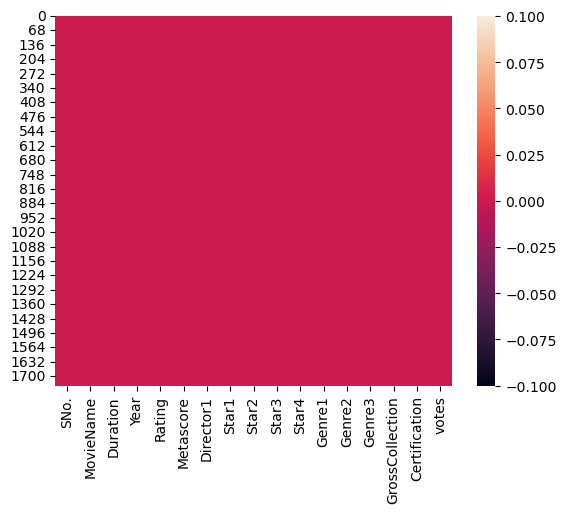

In [13]:
sns.heatmap(IMDB.isnull())

Hence all the null values are removed from the dataset

In [14]:
IMDB.nunique()

SNo.               1744
MovieName          1703
Duration            119
Year                 74
Rating               67
Metascore            87
Director1           944
Star1               720
Star2              1158
Star3              1323
Star4              1440
Genre1                2
Genre2               16
Genre3               19
GrossCollection    1358
Certification        17
votes              1737
dtype: int64

In [15]:
IMDB.duplicated().sum()# No Duplicate Values

0

In [16]:
#dropping duplicate rows and resetting index
IMDB=IMDB.drop_duplicates()
print('Number of rows after removing duplicates=', len(IMDB))

Number of rows after removing duplicates= 1744


In [17]:
# Value counts for each feature data
for i in IMDB.columns:
    print(IMDB[i].value_counts())
    print("no of unique values",IMDB[i].nunique())
    print('*****************')

1        1
1,160    1
1,171    1
1,170    1
1,169    1
        ..
578      1
577      1
576      1
575      1
1,744    1
Name: SNo., Length: 1744, dtype: int64
no of unique values 1744
*****************
Mr                               3
G                                3
Ghost in the Shell               2
The Italian Job                  2
Wanted                           2
                                ..
Robin Hood: Prince of Thieves    1
28 Weeks Later                   1
Atlantis: The Lost Empire        1
The Guardian                     1
Sadak 2                          1
Name: MovieName, Length: 1703, dtype: int64
no of unique values 1703
*****************
107    48
109    42
100    42
110    41
102    40
       ..
186     1
207     1
192     1
213     1
78      1
Name: Duration, Length: 119, dtype: int64
no of unique values 119
*****************
2016    78
2014    76
2018    70
2011    68
2019    67
        ..
1938     1
1932     1
1948     1
1960     1
1965     1
Name: Year

In [18]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 0 to 1743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo.             1744 non-null   object 
 1   MovieName        1744 non-null   object 
 2   Duration         1744 non-null   int64  
 3   Year             1744 non-null   int64  
 4   Rating           1744 non-null   float64
 5   Metascore        1744 non-null   object 
 6   Director1        1744 non-null   object 
 7   Star1            1744 non-null   object 
 8   Star2            1744 non-null   object 
 9   Star3            1744 non-null   object 
 10  Star4            1744 non-null   object 
 11  Genre1           1744 non-null   object 
 12  Genre2           1744 non-null   object 
 13  Genre3           1744 non-null   object 
 14  GrossCollection  1744 non-null   object 
 15  Certification    1744 non-null   object 
 16  votes            1744 non-null   object 
dtypes: float64(1),

As we see Metascore,Certification nd Genre consistsov Nan we need to replace with mean or mode

In [19]:
IMDB.replace("Nan", np.nan, inplace=True)

In [20]:
IMDB['Metascore']=IMDB['Metascore'].fillna(IMDB['Metascore'].mode()[0])
IMDB['Certification'] = IMDB['Certification'].fillna(IMDB['Certification'].mode()[0])
IMDB['Genre3'] =IMDB['Genre3'].fillna(IMDB['Genre3'].mode()[0])

In [21]:
IMDB['GrossCollection'] = IMDB['GrossCollection'].astype(float)
IMDB['GrossCollection'] = IMDB['GrossCollection'].fillna(IMDB['GrossCollection'].mean())

In [22]:
IMDB.isnull().sum().sum()

6

In [23]:
IMDB.isnull().sum().sum()

6

<Axes: >

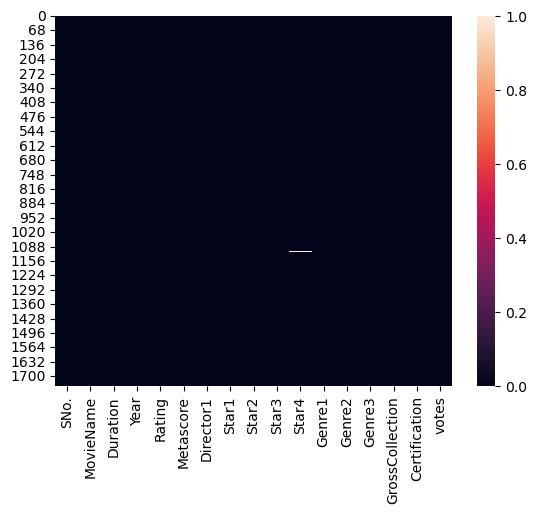

In [24]:
sns.heatmap(IMDB.isnull())

In [25]:
IMDB.dropna(inplace=True)

In [26]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 0 to 1743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo.             1740 non-null   object 
 1   MovieName        1740 non-null   object 
 2   Duration         1740 non-null   int64  
 3   Year             1740 non-null   int64  
 4   Rating           1740 non-null   float64
 5   Metascore        1740 non-null   object 
 6   Director1        1740 non-null   object 
 7   Star1            1740 non-null   object 
 8   Star2            1740 non-null   object 
 9   Star3            1740 non-null   object 
 10  Star4            1740 non-null   object 
 11  Genre1           1740 non-null   object 
 12  Genre2           1740 non-null   object 
 13  Genre3           1740 non-null   object 
 14  GrossCollection  1740 non-null   float64
 15  Certification    1740 non-null   object 
 16  votes            1740 non-null   object 
dtypes: float64(2),

In [27]:
IMDB['Metascore'] = IMDB['Metascore'].astype(int)


In [28]:
IMDB['votes'] = IMDB['votes'].str.replace(',', '').astype(int)


In [29]:
IMDB["votes"]=IMDB["votes"].replace(" ",np.nan)

In [30]:
IMDB["votes"]=IMDB["votes"].astype(int)

In [31]:
IMDB['SNo.'] = IMDB['SNo.'].str.replace(',', '').astype(int)

In [32]:
IMDB["SNo."]=IMDB["SNo."].replace(" ",np.nan)

In [33]:
IMDB["SNo."] =IMDB["SNo."].astype(int)

In [34]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 0 to 1743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo.             1740 non-null   int32  
 1   MovieName        1740 non-null   object 
 2   Duration         1740 non-null   int64  
 3   Year             1740 non-null   int64  
 4   Rating           1740 non-null   float64
 5   Metascore        1740 non-null   int32  
 6   Director1        1740 non-null   object 
 7   Star1            1740 non-null   object 
 8   Star2            1740 non-null   object 
 9   Star3            1740 non-null   object 
 10  Star4            1740 non-null   object 
 11  Genre1           1740 non-null   object 
 12  Genre2           1740 non-null   object 
 13  Genre3           1740 non-null   object 
 14  GrossCollection  1740 non-null   float64
 15  Certification    1740 non-null   object 
 16  votes            1740 non-null   int32  
dtypes: float64(2),

<Axes: >

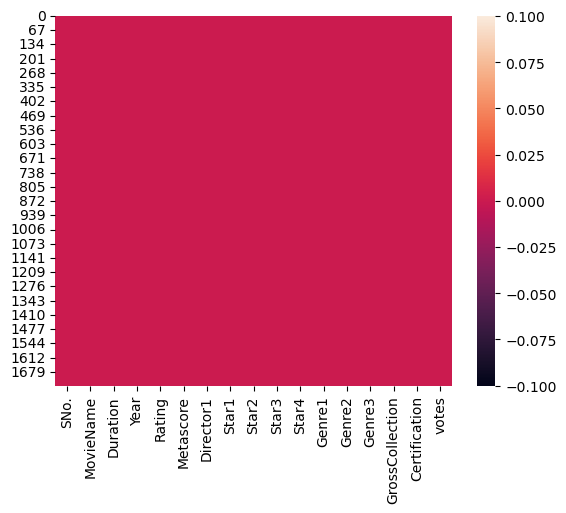

In [35]:
sns.heatmap(IMDB.isnull())

In [36]:
for i in IMDB.columns:
    print(IMDB[i].value_counts())
    print("no of unique values",IMDB[i].nunique())
    print('*****************')

1       1
1160    1
1171    1
1170    1
1169    1
       ..
577     1
576     1
575     1
574     1
1744    1
Name: SNo., Length: 1740, dtype: int64
no of unique values 1740
*****************
Mr                           3
G                            3
The Karate Kid               2
Heist                        2
Robin Hood                   2
                            ..
28 Weeks Later               1
Atlantis: The Lost Empire    1
The Guardian                 1
Romancing the Stone          1
Sadak 2                      1
Name: MovieName, Length: 1699, dtype: int64
no of unique values 1699
*****************
107    48
109    42
100    42
110    41
102    40
       ..
186     1
207     1
192     1
213     1
78      1
Name: Duration, Length: 119, dtype: int64
no of unique values 119
*****************
2016    78
2014    76
2018    70
2011    68
2019    67
        ..
1938     1
1932     1
1948     1
1960     1
1965     1
Name: Year, Length: 74, dtype: int64
no of unique values 74
*****

As Sno,Metascore,GrossCollection,votes are numerical values in the table and in info ie datatypes it shows object we need to convert them into int or float type

In [37]:
IMDB

SNo.                                          MovieName  Duration  Year  \
0        1                                    The Dark Knight       152  2008   
1        2      The Lord of the Rings: The Return of the King       201  2003   
2        3                                          Inception       148  2010   
3        4  The Lord of the Rings: The Fellowship of the Ring       178  2001   
4        5              The Lord of the Rings: The Two Towers       179  2002   
...    ...                                                ...       ...   ...   
1739  1740                                              Radhe       109  2021   
1740  1741                                             Race 3       160  2018   
1741  1742                                  Angels Apocalypse        85  2015   
1742  1743                              The Cost of Deception       125  2021   
1743  1744                                            Sadak 2       133  2020   

      Rating  Metascore           Director1               Star1  \
0        9.0         84  Christopher Nolan       Christian Bale   
1        9.0         94      Peter Jackson          Elijah Wood   
2        8.8         74  Christopher Nolan    Leonardo DiCaprio   
3        8.8         92      Peter Jackson          Elijah Wood   
4        8.8         87      Peter Jackson          Elijah Wood   
...      ...        ...                 ...                 ...   
1739     1.9         48        Prabhu Deva          Salman Khan   
1740     1.9         48       Remo D'Souza          Anil Kapoor   
1741     1.7         48           Sean Cain       Enzo Zelocchi   
1742     1.5         48      Keith English    Vivianne Bánovits   
1743     1.2         48       Mahesh Bhatt           Alia Bhatt   

                      Star2               Star3                  Star4  \
0              Heath Ledger       Aaron Eckhart          Michael Caine   
1           Viggo Mortensen        Ian McKellen          Orlando Bloom   
2      Joseph Gordon-Levitt         Elliot Page           Ken Watanabe   
3              Ian McKellen       Orlando Bloom              Sean Bean   
4              Ian McKellen     Viggo Mortensen          Orlando Bloom   
...                     ...                 ...                    ...   
1739           Disha Patani       Randeep Hooda          Jackie Shroff   
1740            Salman Khan          Bobby Deol   Jacqueline Fernandez   
1741          Jana Rochelle   Ryan C.F. Buckley        William Kirkham   
1742           András Mózes         Barna Bokor        Gabriella Gubás   
1743            Sanjay Dutt       Priyanka Bose      Aditya Roy Kapoor   

      Genre1      Genre2     Genre3  GrossCollection Certification    votes  
0     Action       Crime      Drama       534.860000        PG-13   2715547  
1     Action   Adventure      Drama       377.850000        PG-13   1885494  
2     Action   Adventure     Sci-Fi       292.580000        PG-13   2410581  
3     Action   Adventure      Drama       315.540000        PG-13   1914240  
4     Action   Adventure      Drama       342.550000        PG-13   1701924  
...      ...         ...        ...              ...           ...      ...  
1739  Action       Crime   Thriller        77.293399        TV-MA    178717  
1740  Action       Crime   Thriller         1.690000    Not Rated     47507  
1741  Action     Fantasy     Sci-Fi        77.293399            R     42911  
1742  Action       Crime      Drama        77.293399            R     39408  
1743  Action       Drama      Drama        77.293399        TV-MA     96244  

[1740 rows x 17 columns]

In [38]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740 entries, 0 to 1743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo.             1740 non-null   int32  
 1   MovieName        1740 non-null   object 
 2   Duration         1740 non-null   int64  
 3   Year             1740 non-null   int64  
 4   Rating           1740 non-null   float64
 5   Metascore        1740 non-null   int32  
 6   Director1        1740 non-null   object 
 7   Star1            1740 non-null   object 
 8   Star2            1740 non-null   object 
 9   Star3            1740 non-null   object 
 10  Star4            1740 non-null   object 
 11  Genre1           1740 non-null   object 
 12  Genre2           1740 non-null   object 
 13  Genre3           1740 non-null   object 
 14  GrossCollection  1740 non-null   float64
 15  Certification    1740 non-null   object 
 16  votes            1740 non-null   int32  
dtypes: float64(2),

# EDA

In [39]:
IMDB['GrossCollection'].value_counts()

77.293399     276
0.030000        8
0.010000        7
0.040000        5
0.100000        4
             ... 
93.430000       1
144.530000      1
1.360000        1
23.530000       1
1.690000        1
Name: GrossCollection, Length: 1357, dtype: int64

In [40]:
#IMDB['Metascore'] = IMDB['Metascore'].astype('int64')

In [41]:
IMDB['votes'].value_counts()

33891     2
28224     2
25542     2
39408     2
32152     2
         ..
283398    1
126059    1
95292     1
98495     1
96244     1
Name: votes, Length: 1733, dtype: int64

<Axes: xlabel='GrossCollection', ylabel='count'>

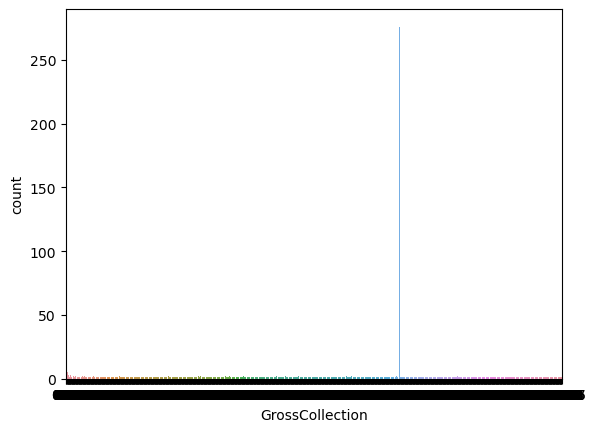

In [42]:
sns.countplot(data=IMDB,x='GrossCollection')

<Axes: xlabel='votes', ylabel='count'>

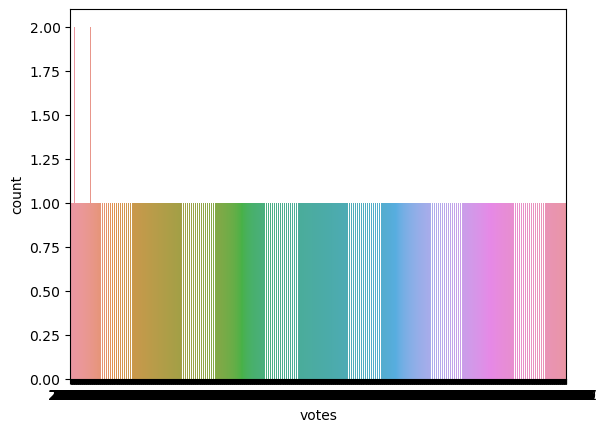

In [43]:
sns.countplot(data=IMDB,x='votes')

Dataset have int64,object and float64 as data type..Target variable GrossCollection is float64 and votes is int which make it a Regression problem

Visualization using Count and Bar Plot for Input and output Variables

Count and Bar Plot for GrossCollection and votes

<Axes: xlabel='Duration', ylabel='Density'>

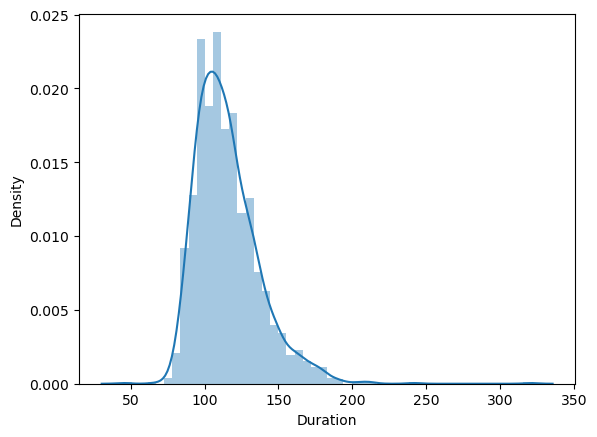

In [44]:
sns.distplot(IMDB['Duration'])

In [45]:
IMDB.dtypes

SNo.                 int32
MovieName           object
Duration             int64
Year                 int64
Rating             float64
Metascore            int32
Director1           object
Star1               object
Star2               object
Star3               object
Star4               object
Genre1              object
Genre2              object
Genre3              object
GrossCollection    float64
Certification       object
votes                int32
dtype: object

<Axes: xlabel='Year', ylabel='Density'>

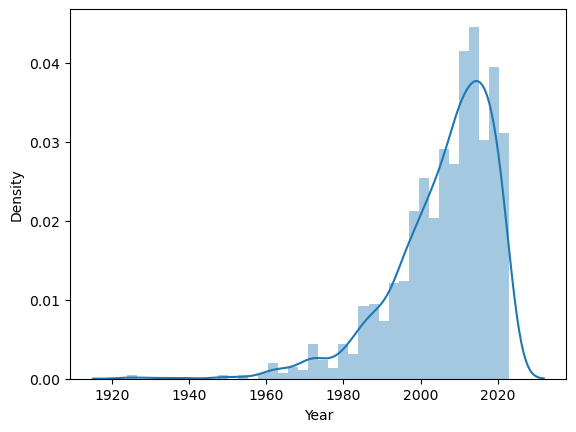

In [46]:
sns.distplot(IMDB['Year'])

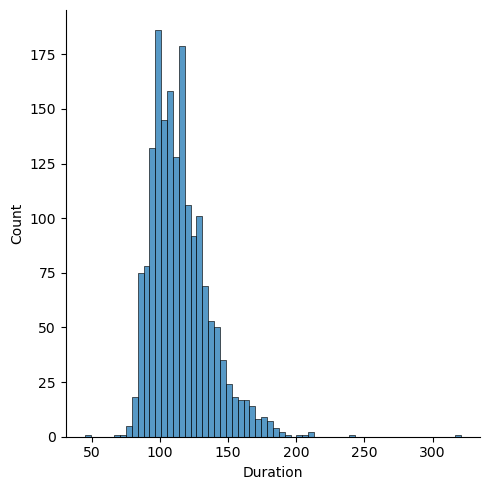

In [47]:
sns.displot(data=IMDB, x="Duration",)


In [48]:
IMDB

SNo.                                          MovieName  Duration  Year  \
0        1                                    The Dark Knight       152  2008   
1        2      The Lord of the Rings: The Return of the King       201  2003   
2        3                                          Inception       148  2010   
3        4  The Lord of the Rings: The Fellowship of the Ring       178  2001   
4        5              The Lord of the Rings: The Two Towers       179  2002   
...    ...                                                ...       ...   ...   
1739  1740                                              Radhe       109  2021   
1740  1741                                             Race 3       160  2018   
1741  1742                                  Angels Apocalypse        85  2015   
1742  1743                              The Cost of Deception       125  2021   
1743  1744                                            Sadak 2       133  2020   

      Rating  Metascore           Director1               Star1  \
0        9.0         84  Christopher Nolan       Christian Bale   
1        9.0         94      Peter Jackson          Elijah Wood   
2        8.8         74  Christopher Nolan    Leonardo DiCaprio   
3        8.8         92      Peter Jackson          Elijah Wood   
4        8.8         87      Peter Jackson          Elijah Wood   
...      ...        ...                 ...                 ...   
1739     1.9         48        Prabhu Deva          Salman Khan   
1740     1.9         48       Remo D'Souza          Anil Kapoor   
1741     1.7         48           Sean Cain       Enzo Zelocchi   
1742     1.5         48      Keith English    Vivianne Bánovits   
1743     1.2         48       Mahesh Bhatt           Alia Bhatt   

                      Star2               Star3                  Star4  \
0              Heath Ledger       Aaron Eckhart          Michael Caine   
1           Viggo Mortensen        Ian McKellen          Orlando Bloom   
2      Joseph Gordon-Levitt         Elliot Page           Ken Watanabe   
3              Ian McKellen       Orlando Bloom              Sean Bean   
4              Ian McKellen     Viggo Mortensen          Orlando Bloom   
...                     ...                 ...                    ...   
1739           Disha Patani       Randeep Hooda          Jackie Shroff   
1740            Salman Khan          Bobby Deol   Jacqueline Fernandez   
1741          Jana Rochelle   Ryan C.F. Buckley        William Kirkham   
1742           András Mózes         Barna Bokor        Gabriella Gubás   
1743            Sanjay Dutt       Priyanka Bose      Aditya Roy Kapoor   

      Genre1      Genre2     Genre3  GrossCollection Certification    votes  
0     Action       Crime      Drama       534.860000        PG-13   2715547  
1     Action   Adventure      Drama       377.850000        PG-13   1885494  
2     Action   Adventure     Sci-Fi       292.580000        PG-13   2410581  
3     Action   Adventure      Drama       315.540000        PG-13   1914240  
4     Action   Adventure      Drama       342.550000        PG-13   1701924  
...      ...         ...        ...              ...           ...      ...  
1739  Action       Crime   Thriller        77.293399        TV-MA    178717  
1740  Action       Crime   Thriller         1.690000    Not Rated     47507  
1741  Action     Fantasy     Sci-Fi        77.293399            R     42911  
1742  Action       Crime      Drama        77.293399            R     39408  
1743  Action       Drama      Drama        77.293399        TV-MA     96244  

[1740 rows x 17 columns]

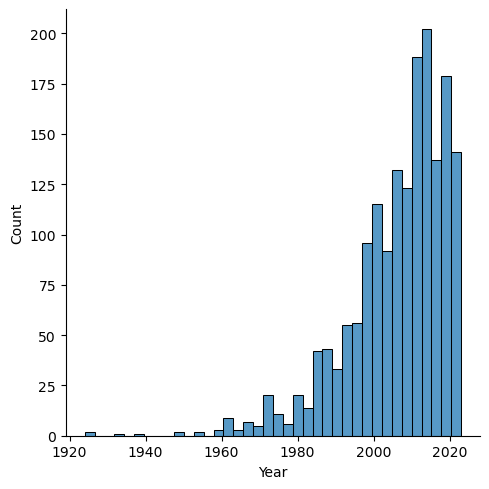

In [49]:
sns.displot(data=IMDB, x="Year",)


<Axes: xlabel='Rating', ylabel='Density'>

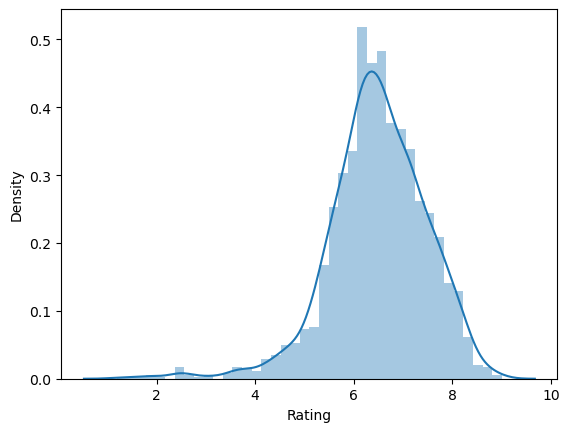

In [50]:
sns.distplot(IMDB['Rating'])

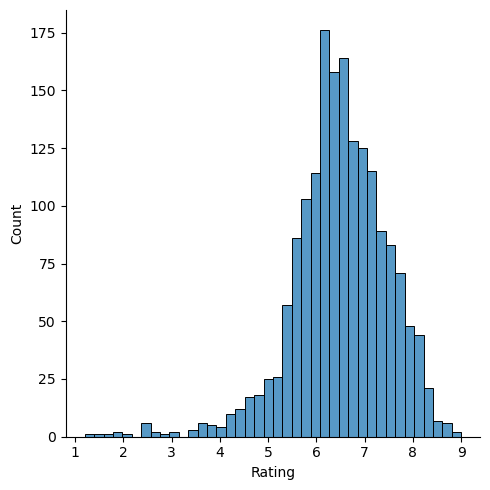

In [51]:
sns.displot(data=IMDB, x="Rating",)

<Axes: xlabel='Metascore', ylabel='Density'>

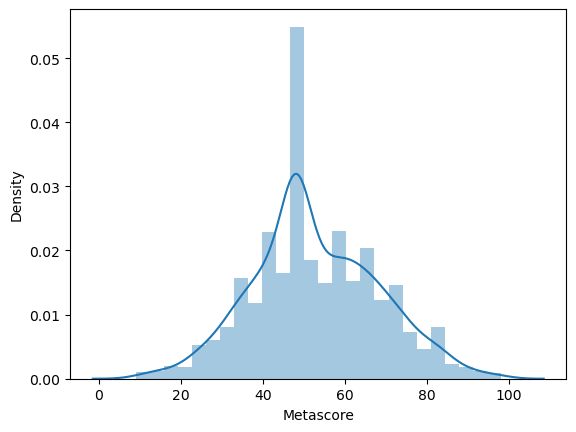

In [52]:
sns.distplot(IMDB['Metascore'])

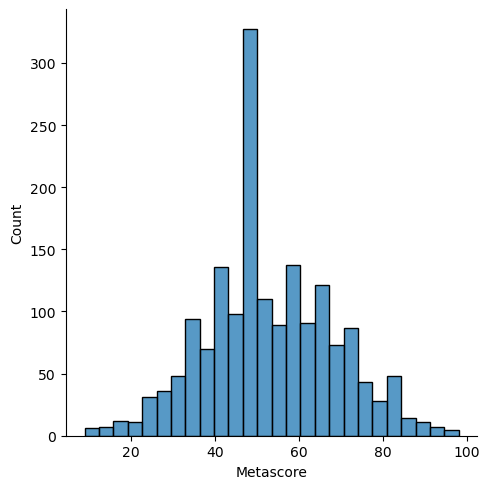

In [53]:
sns.displot(data=IMDB, x="Metascore",)

<Axes: xlabel='GrossCollection', ylabel='Density'>

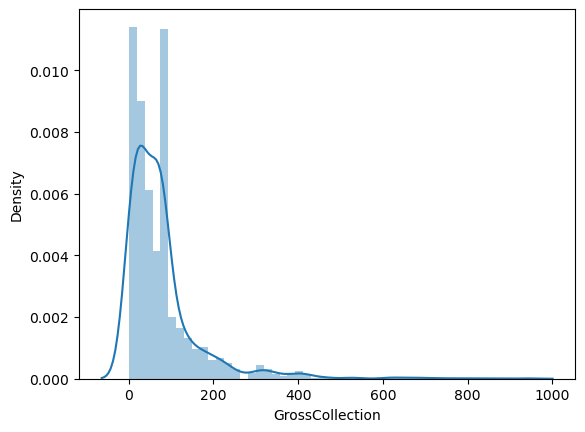

In [54]:
sns.distplot(IMDB['GrossCollection'])      

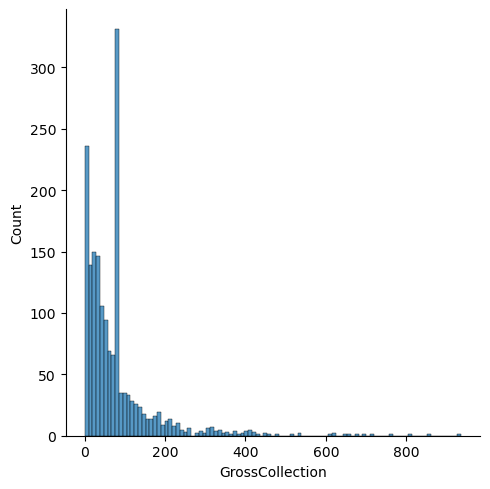

In [55]:
sns.displot(data=IMDB, x="GrossCollection",)

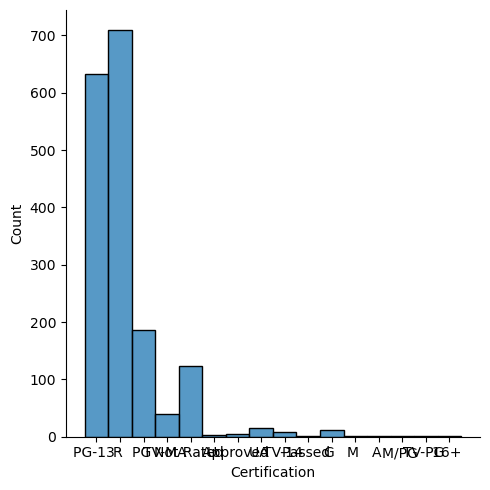

In [56]:
sns.displot(data=IMDB, x="Certification")

<Axes: xlabel='votes', ylabel='Density'>

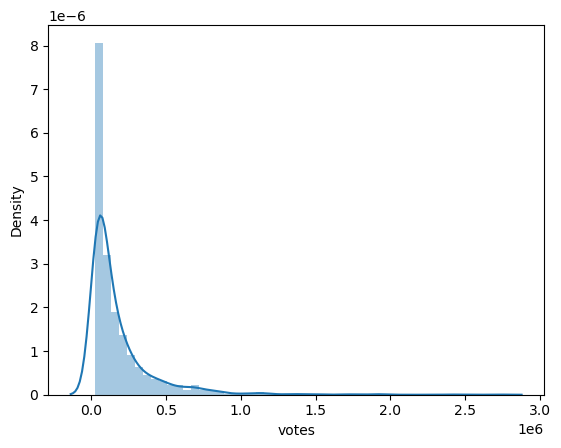

In [57]:
sns.distplot(IMDB['votes'])

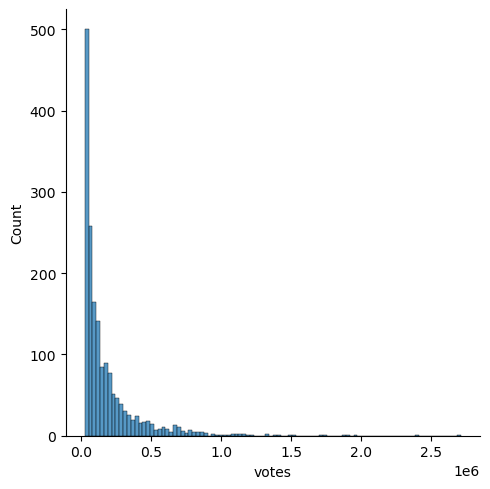

In [58]:
sns.displot(data=IMDB, x="votes",)

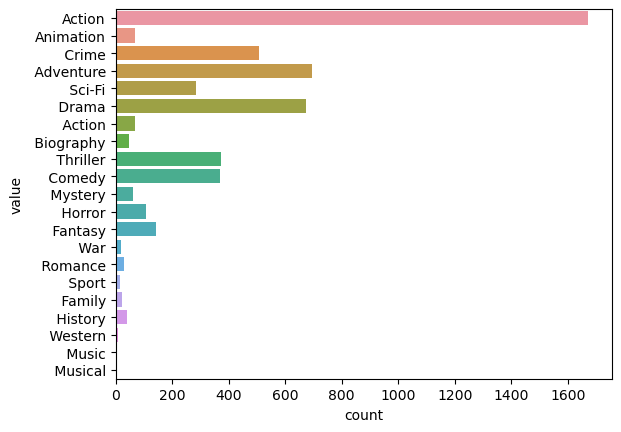

In [59]:
sns.countplot(data=pd.melt(IMDB, value_vars=["Genre1", "Genre2", "Genre3"]), y="value")
plt.show()

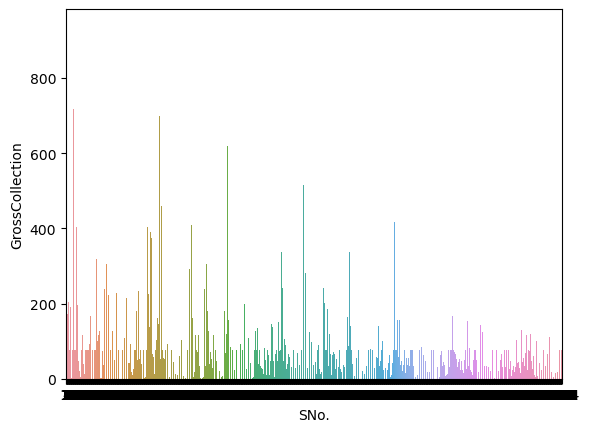

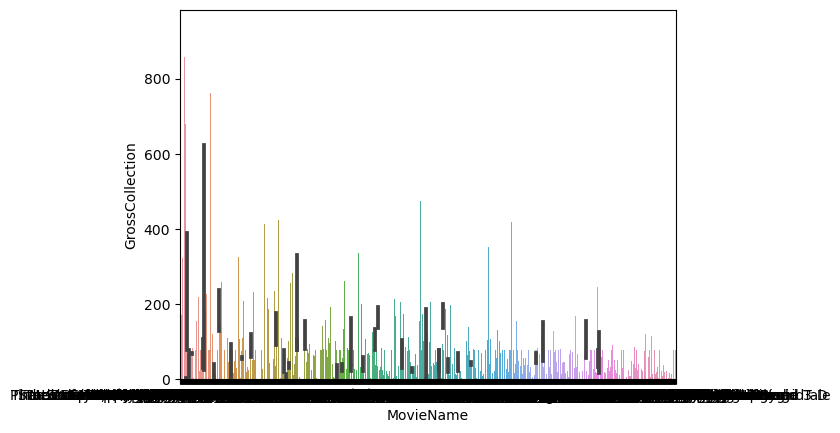

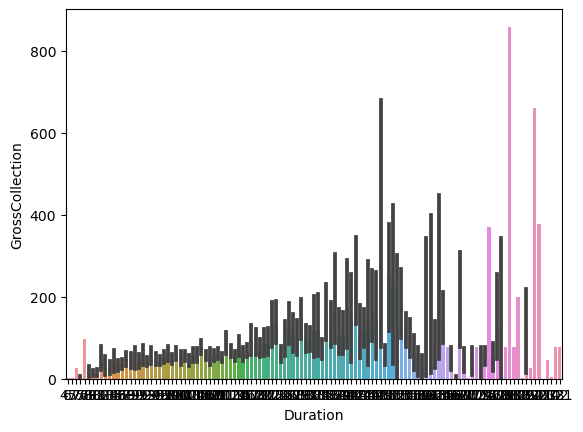

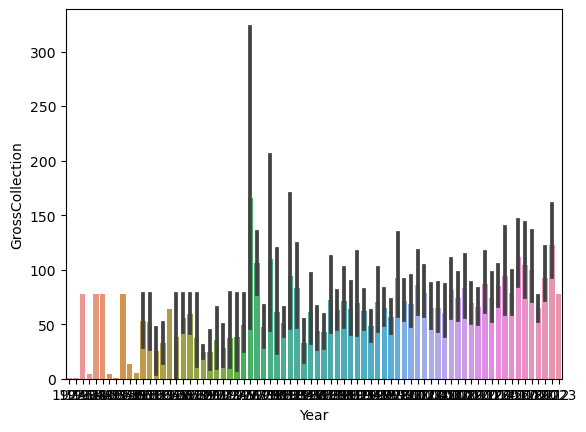

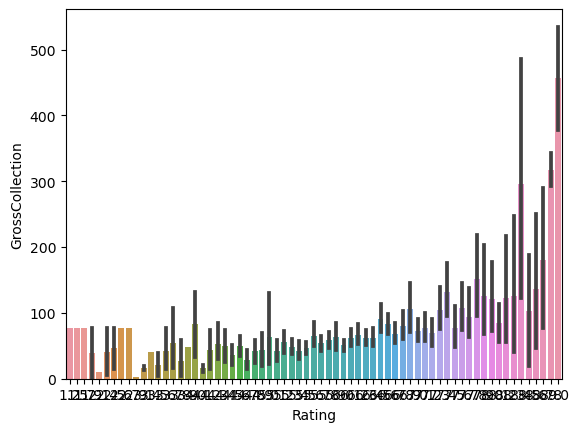

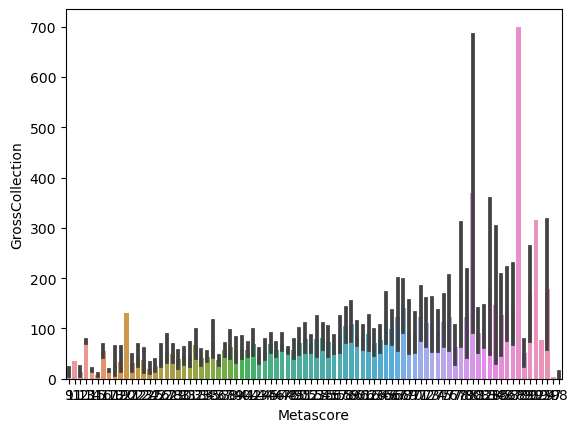

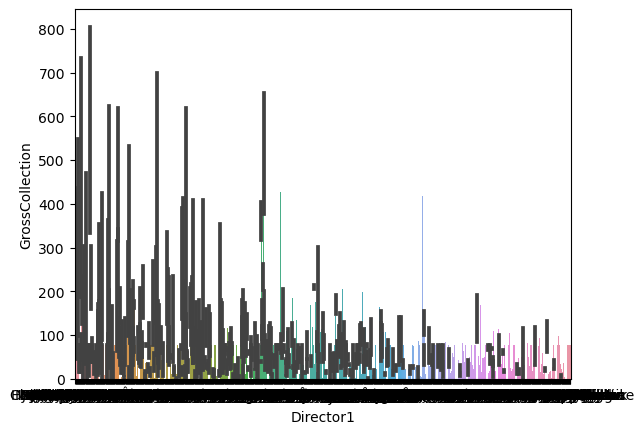

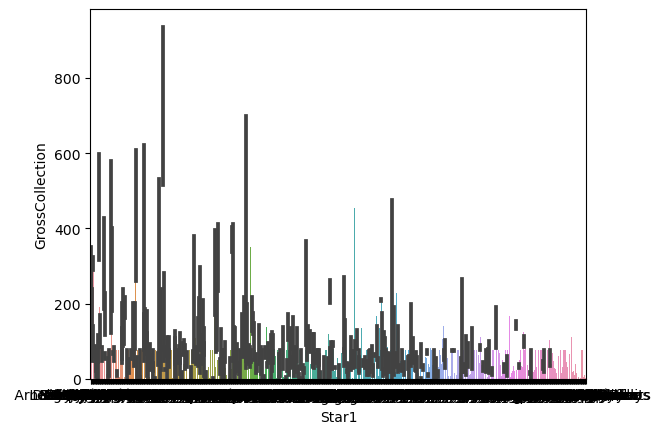

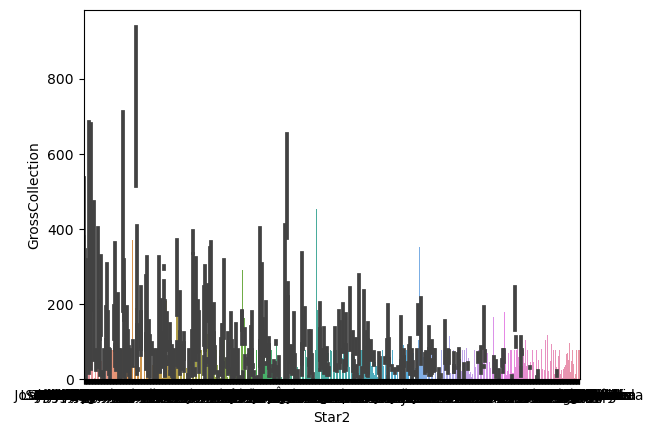

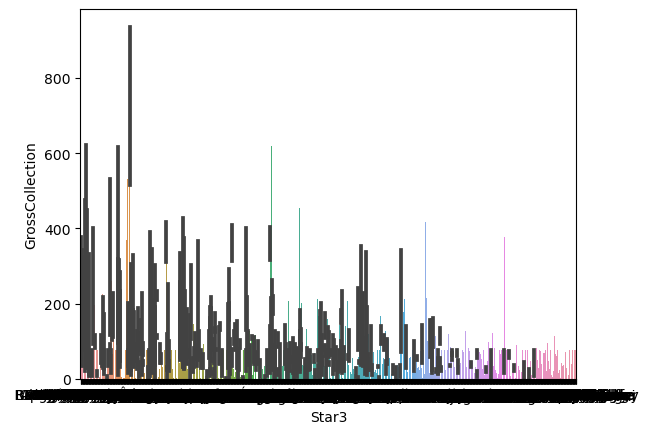

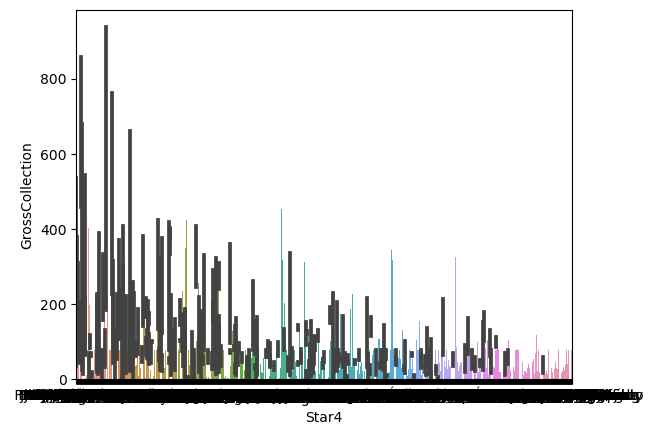

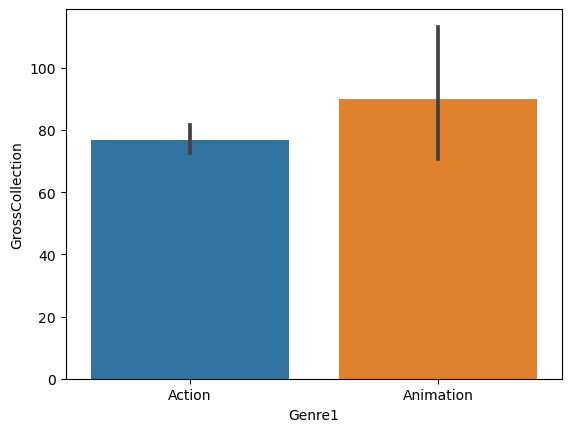

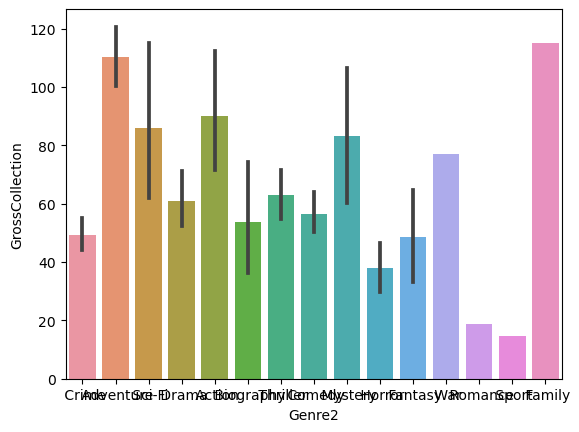

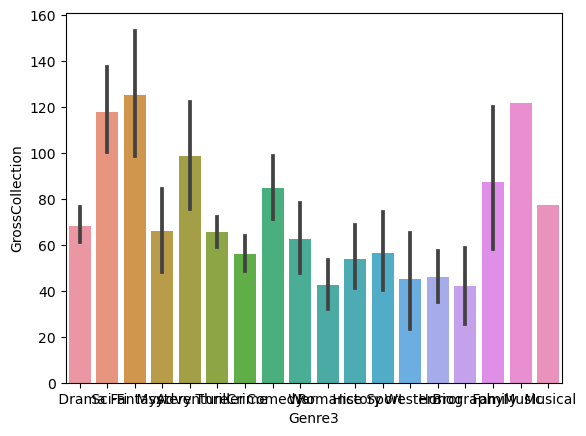

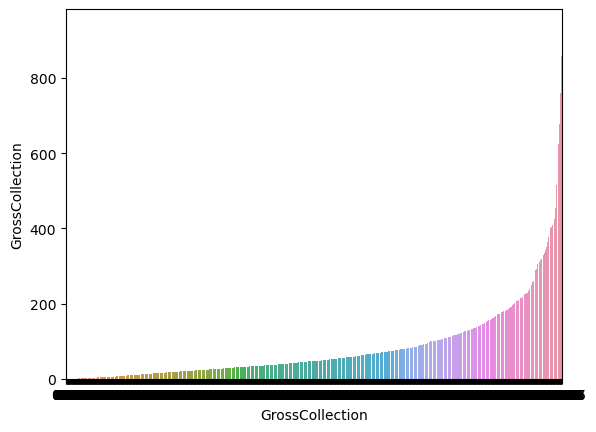

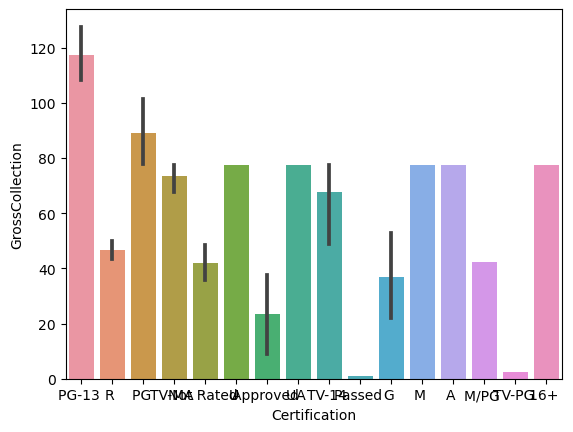

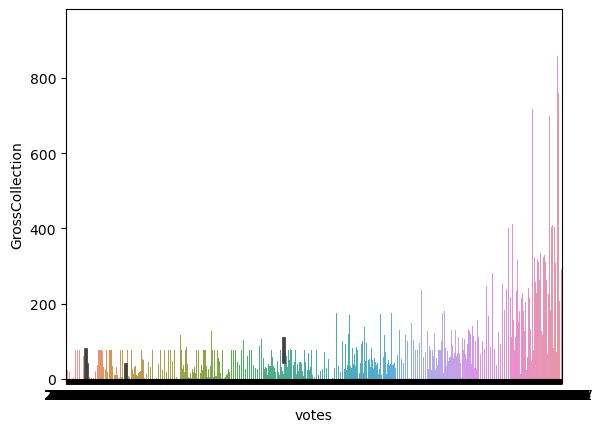

In [60]:
for column in IMDB.columns:
    sns.barplot(x=column,y='GrossCollection',data=IMDB)
    plt.xlabel(column)
    plt.show()

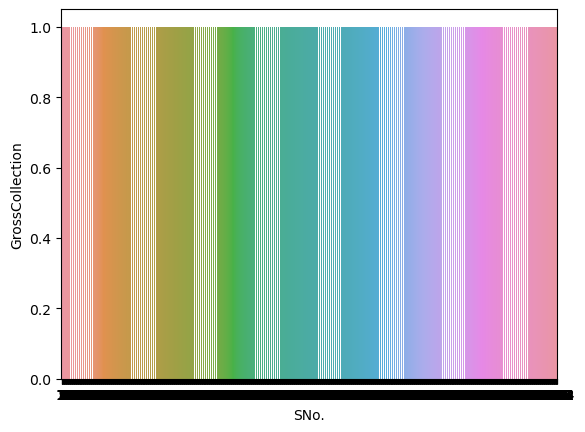

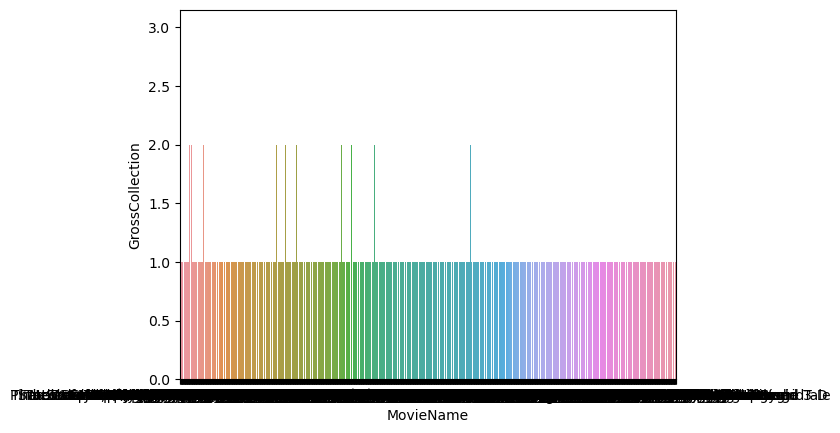

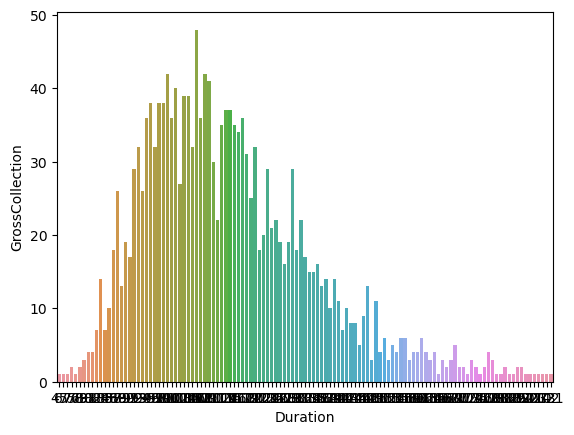

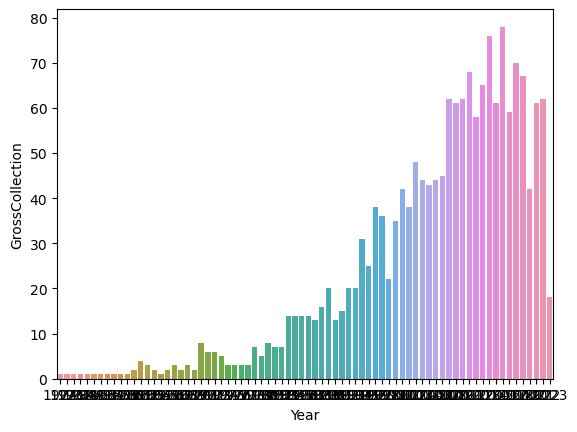

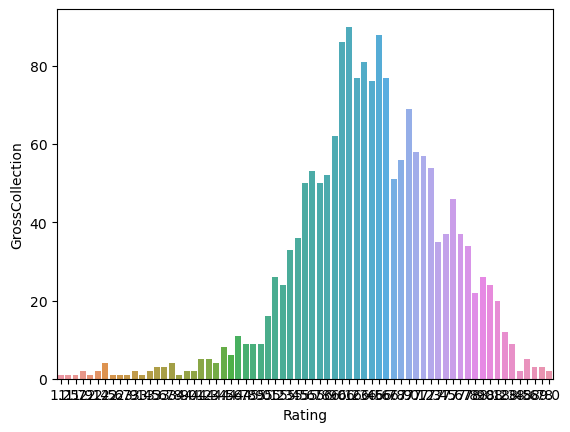

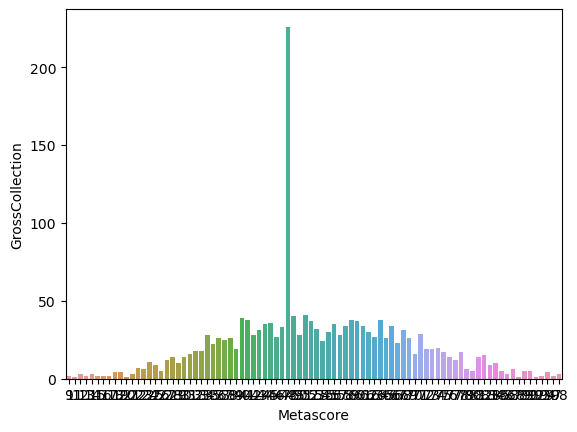

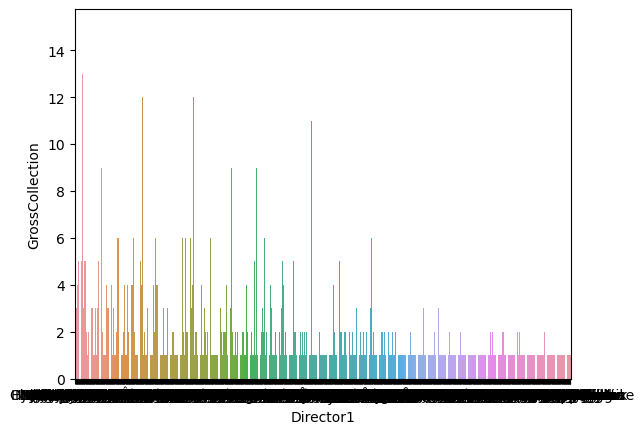

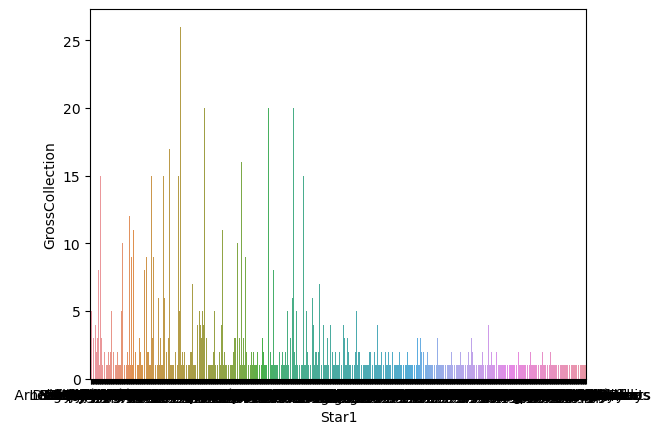

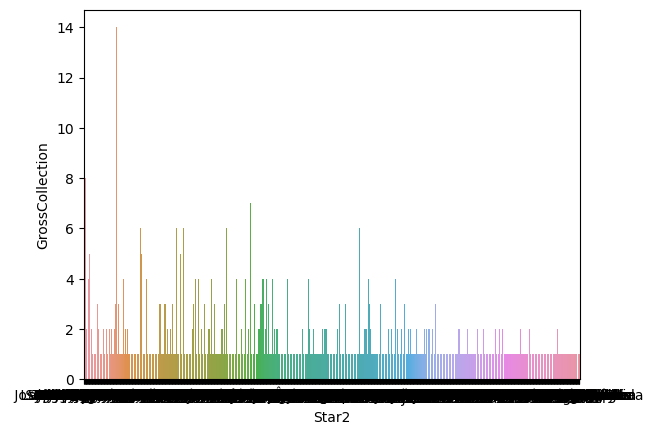

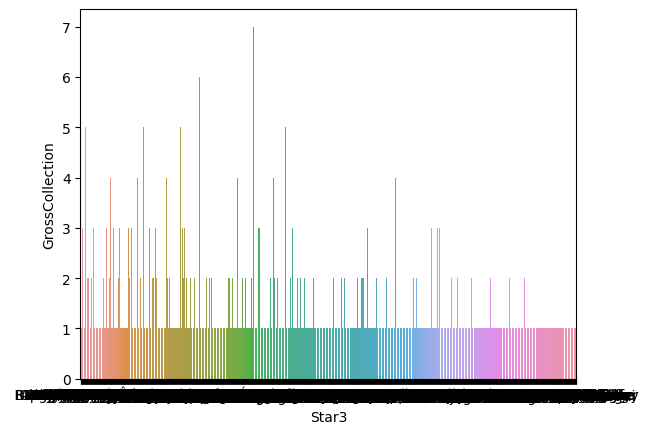

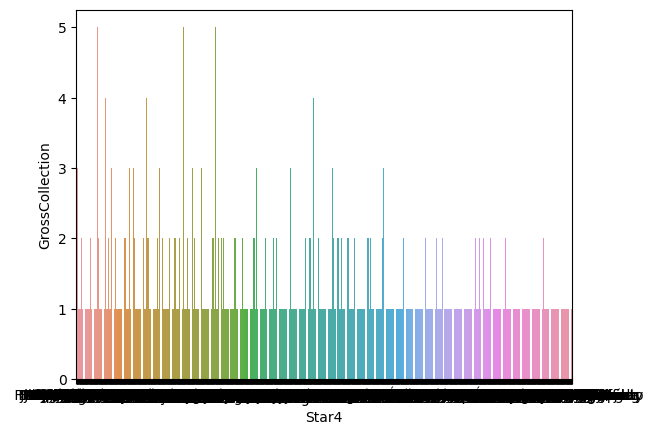

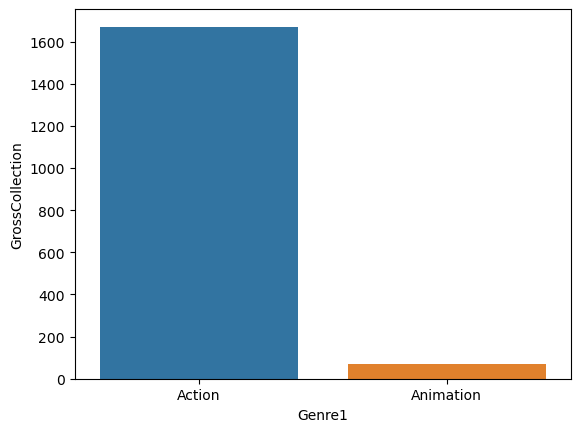

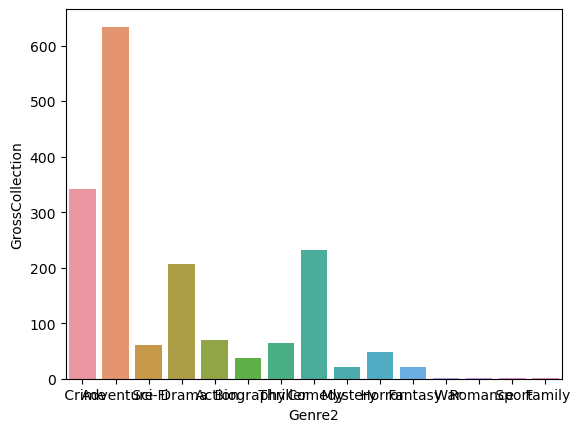

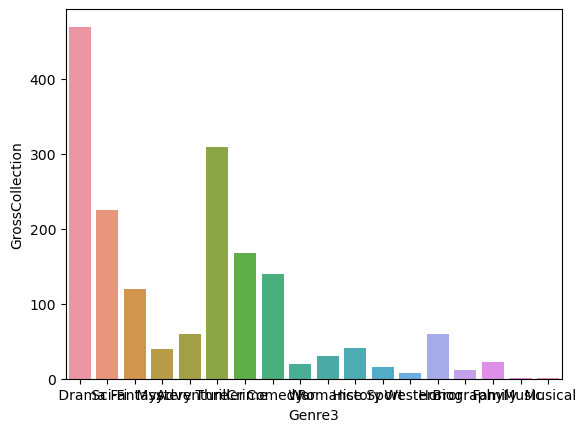

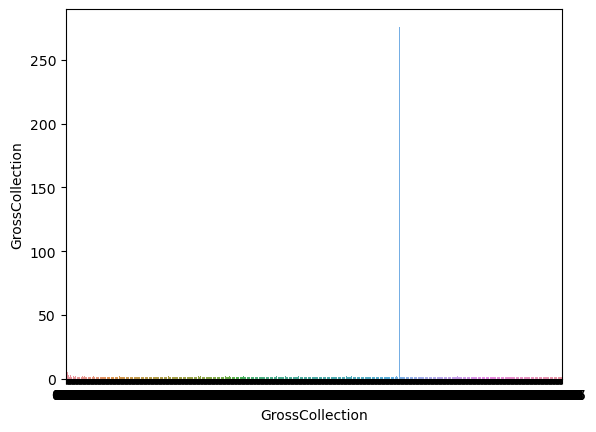

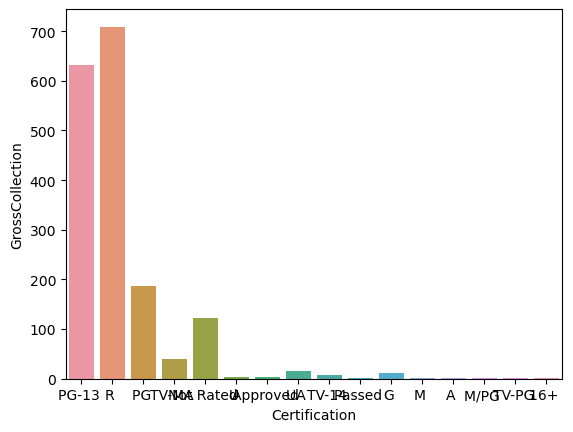

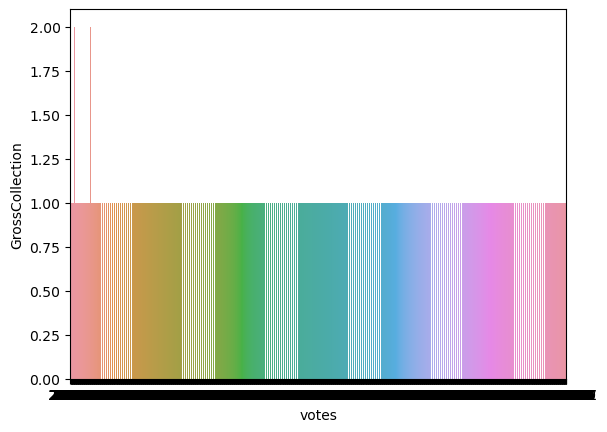

In [61]:
for column in IMDB.columns:
    sns.countplot(x=column,data=IMDB)
    plt.xlabel(column)
    plt.ylabel('GrossCollection')
    plt.show()

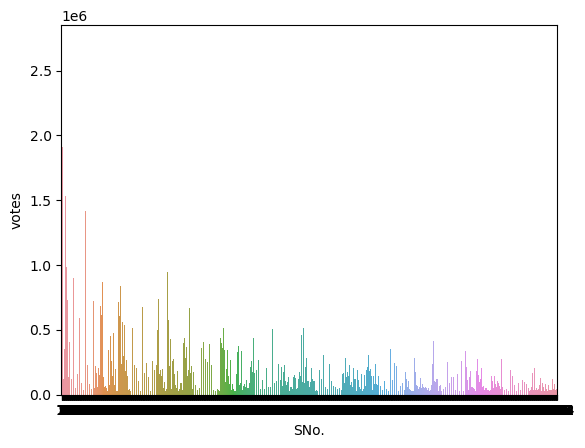

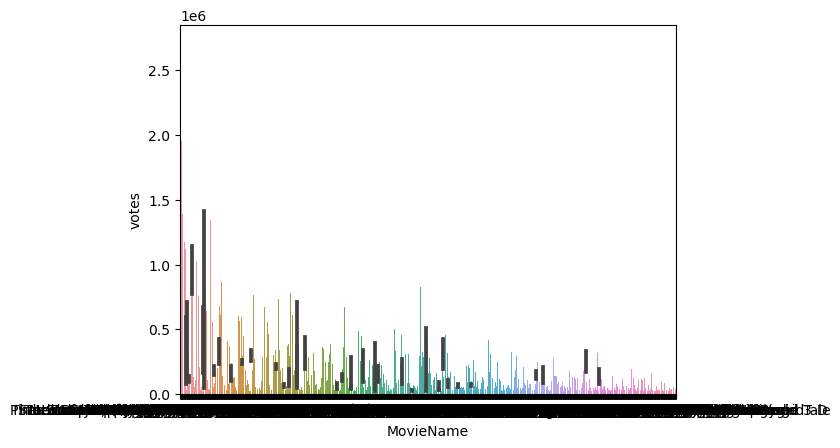

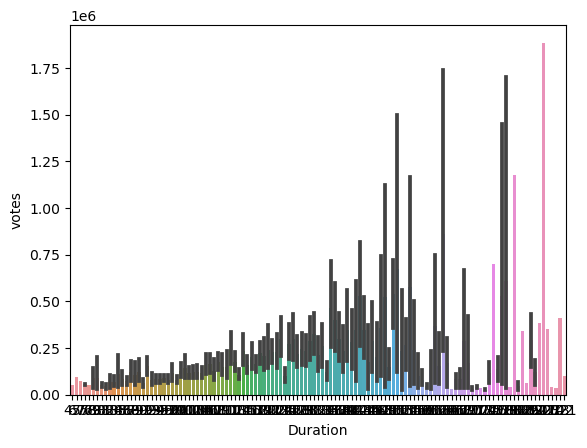

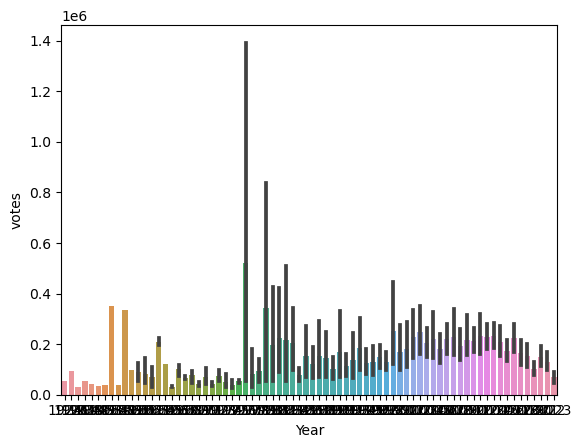

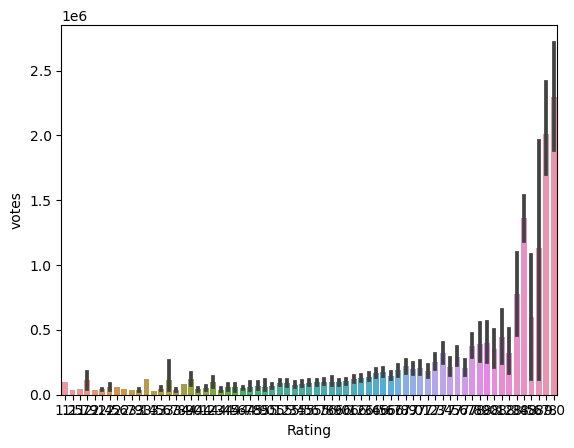

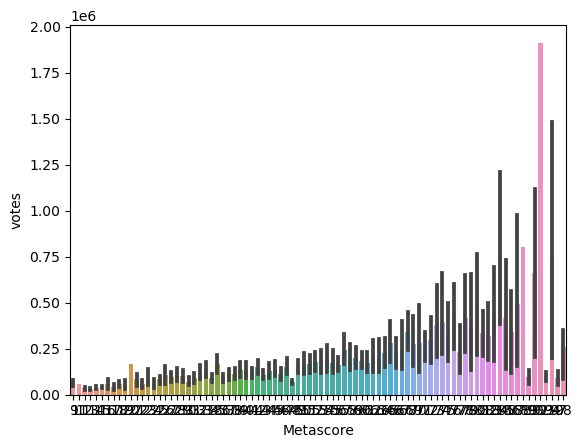

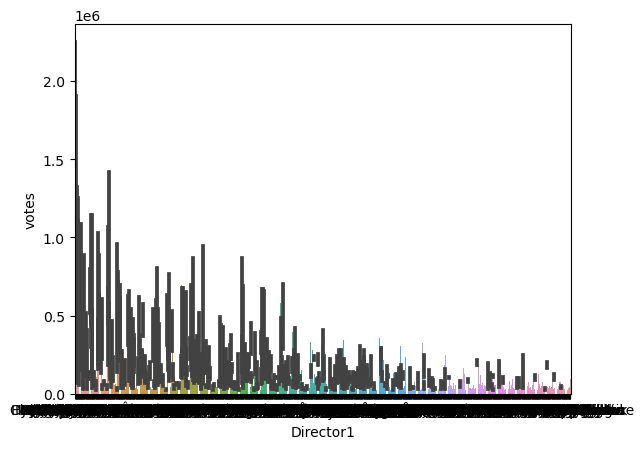

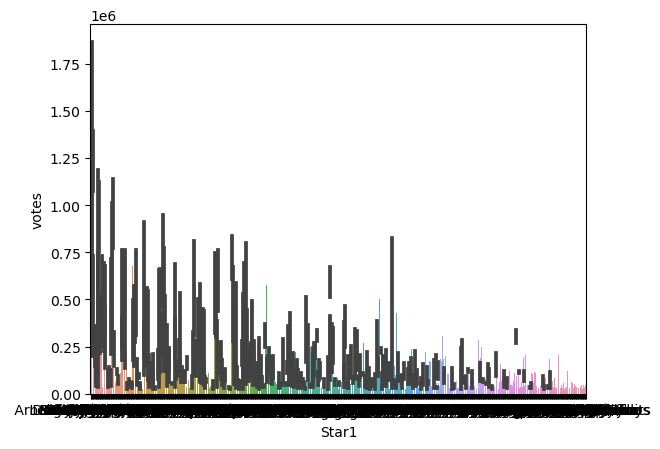

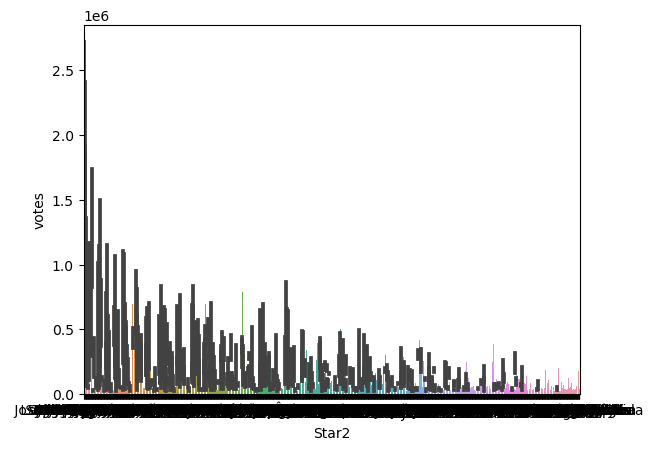

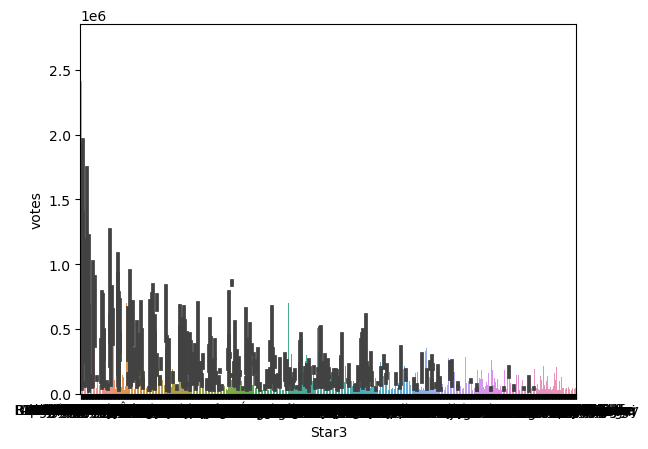

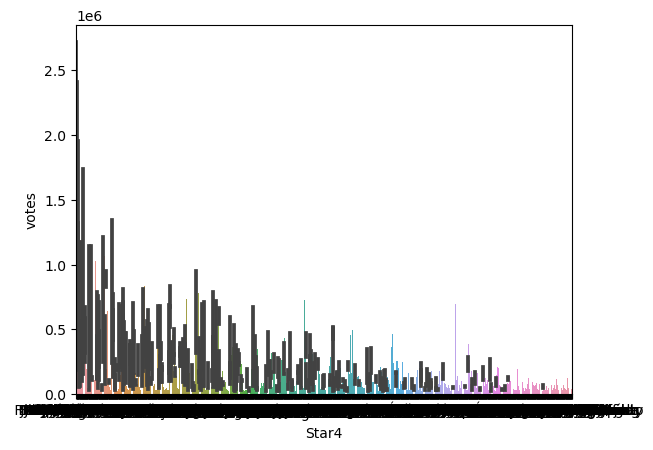

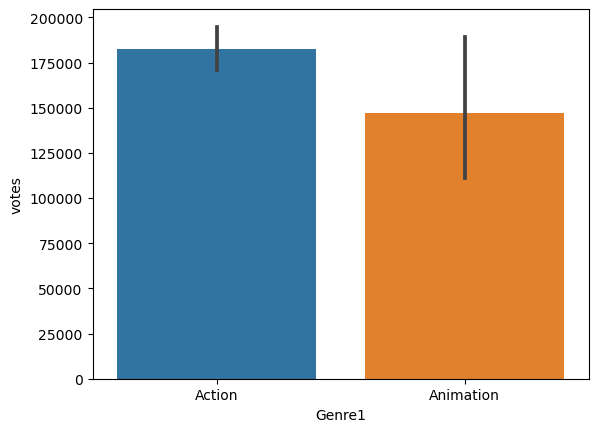

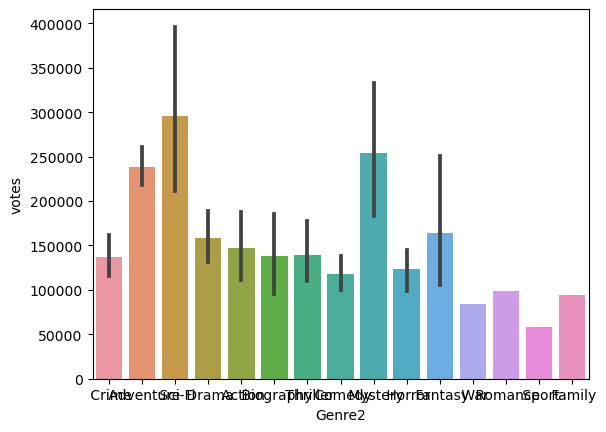

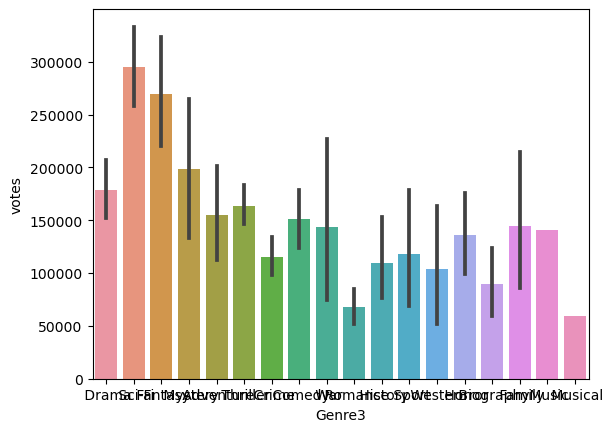

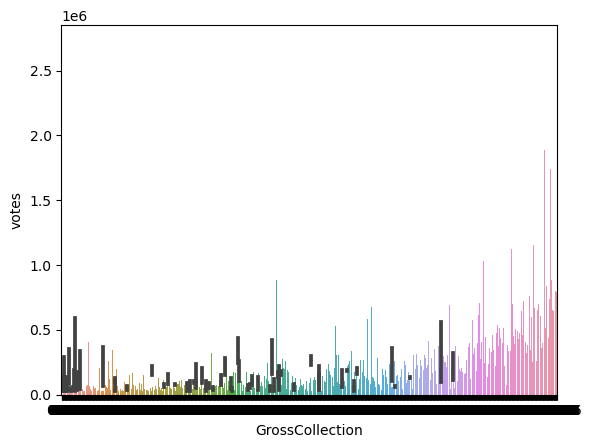

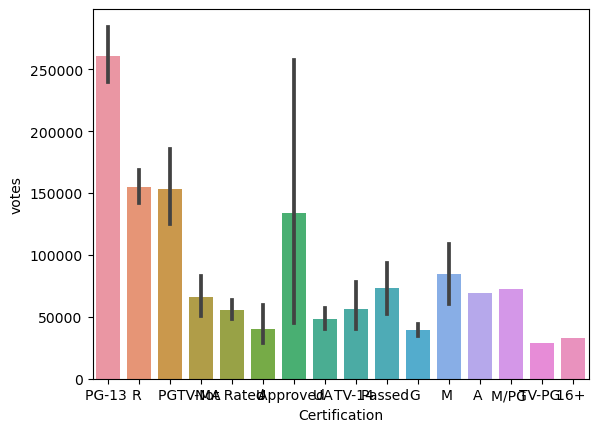

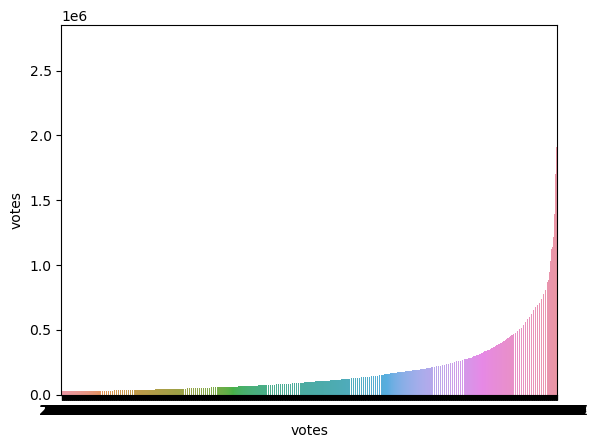

In [62]:
for column in IMDB.columns:
    sns.barplot(x=column,y='votes',data=IMDB)
    plt.xlabel(column)
    plt.show()

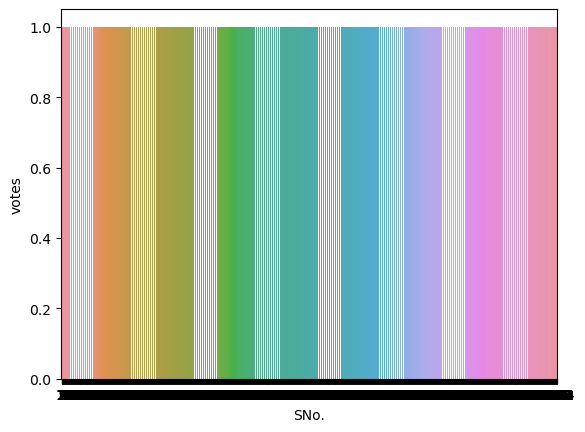

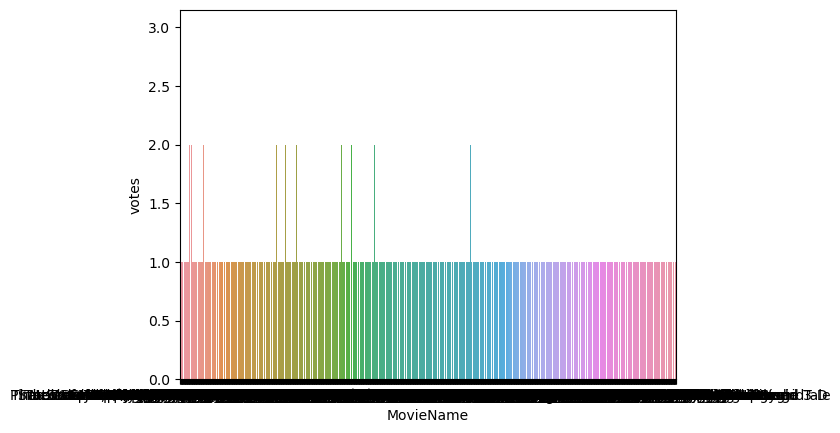

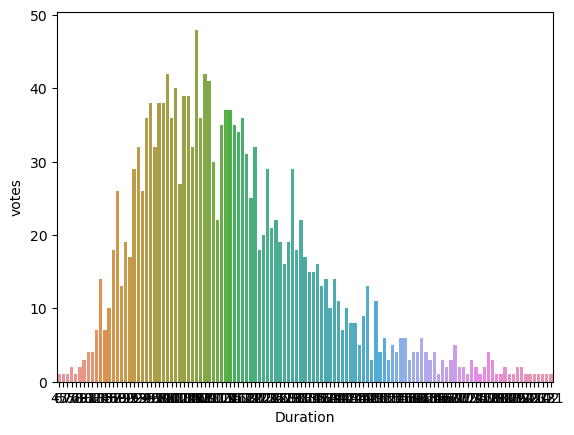

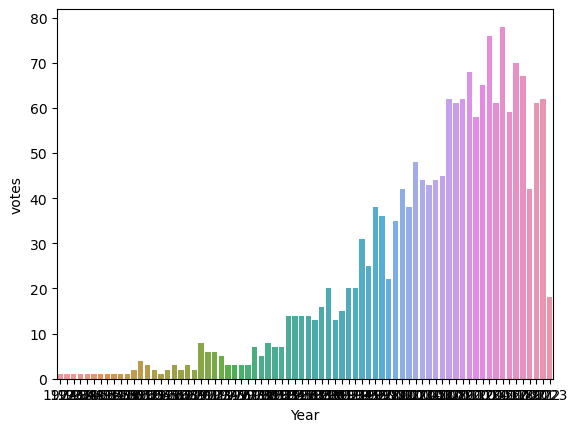

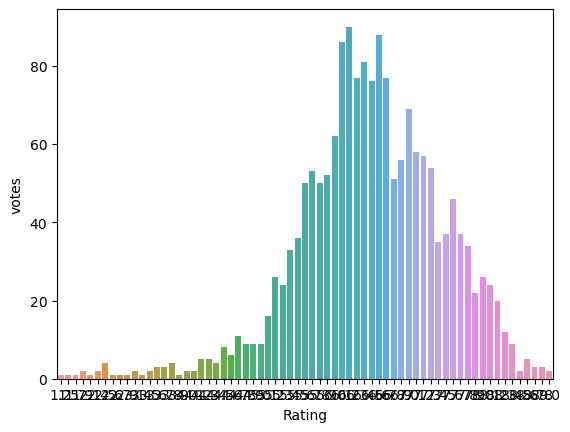

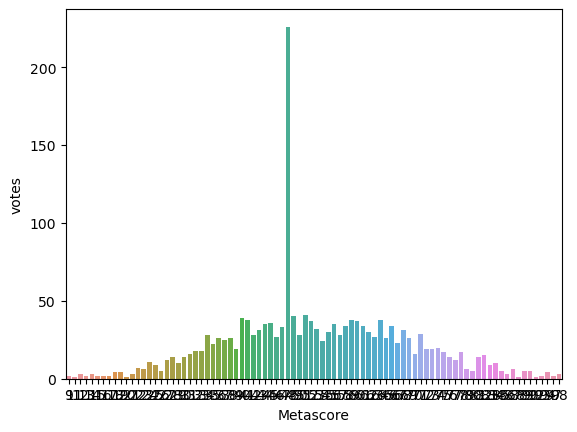

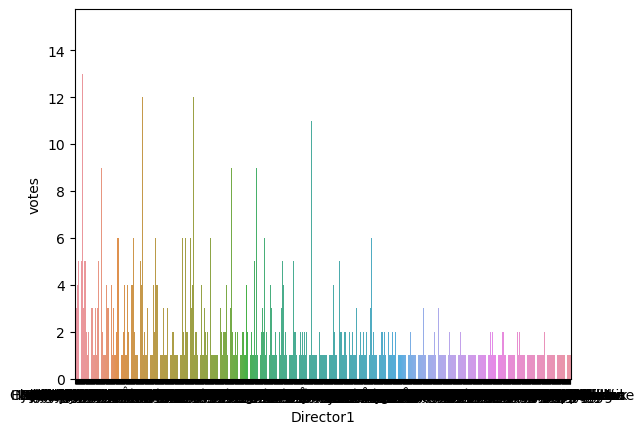

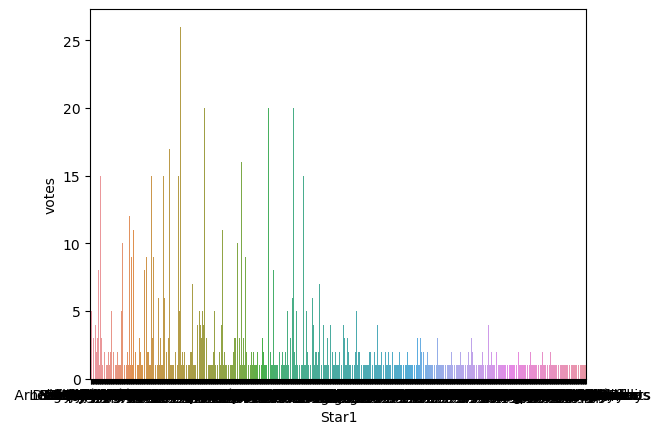

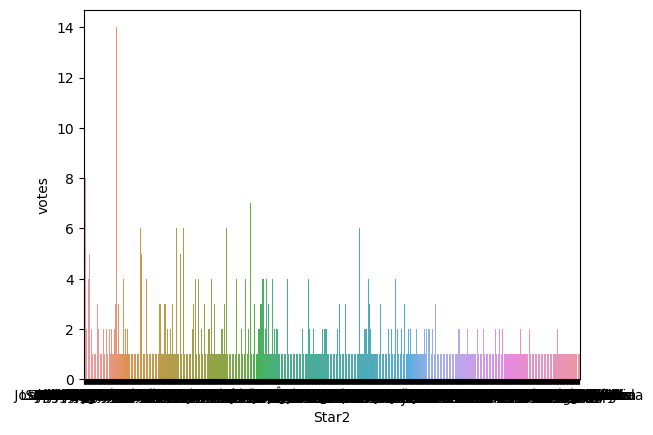

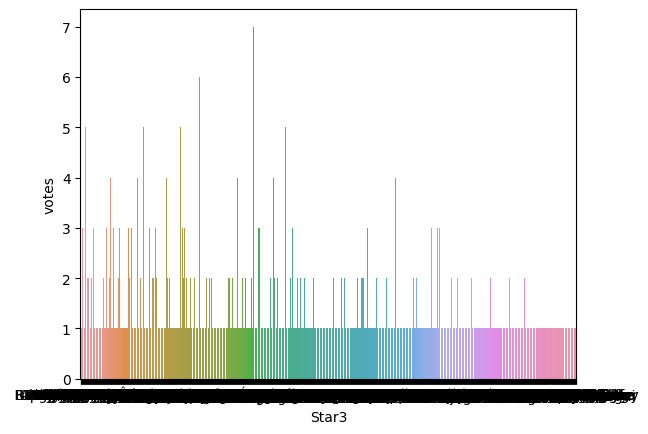

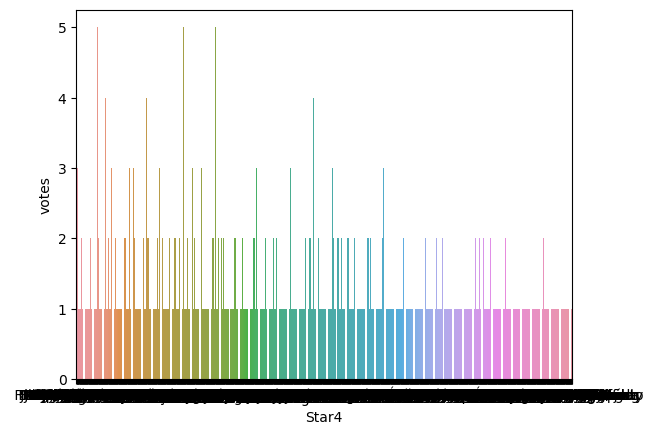

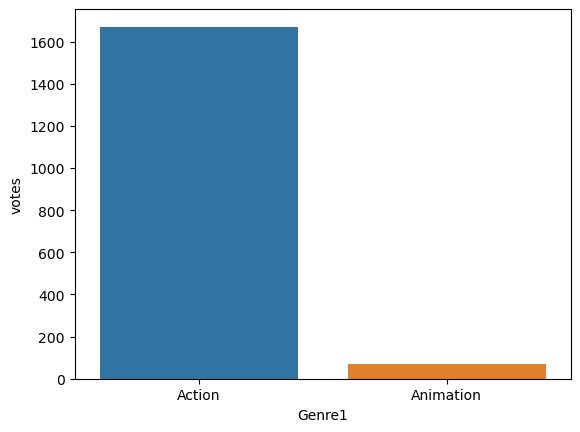

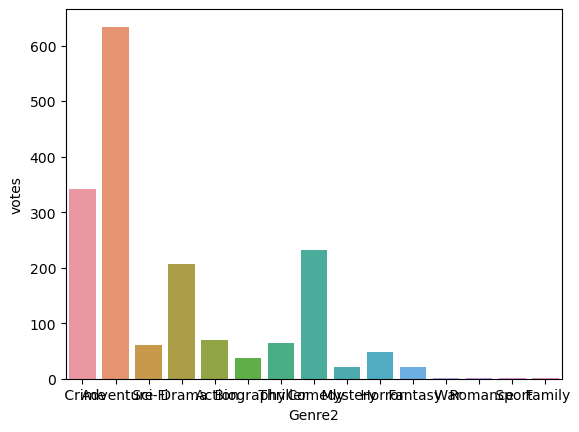

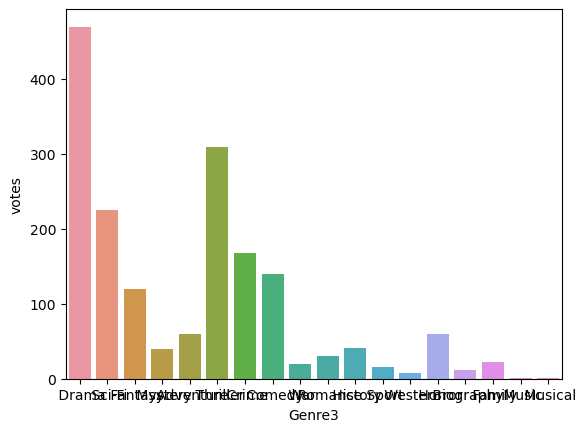

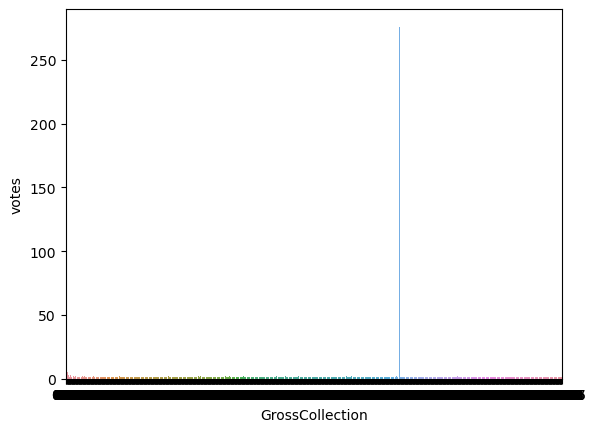

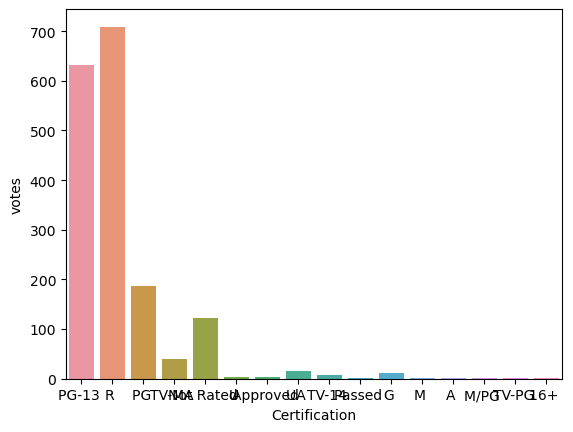

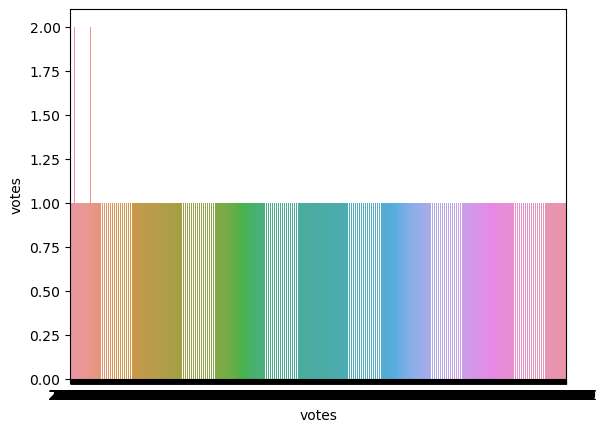

In [63]:
for column in IMDB.columns:
    sns.countplot(x=column,data=IMDB)
    plt.xlabel(column)
    plt.ylabel('votes')
    plt.show()

array([[<Axes: title={'center': 'SNo.'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Metascore'}>,
        <Axes: title={'center': 'GrossCollection'}>],
       [<Axes: title={'center': 'votes'}>, <Axes: >, <Axes: >]],
      dtype=object)

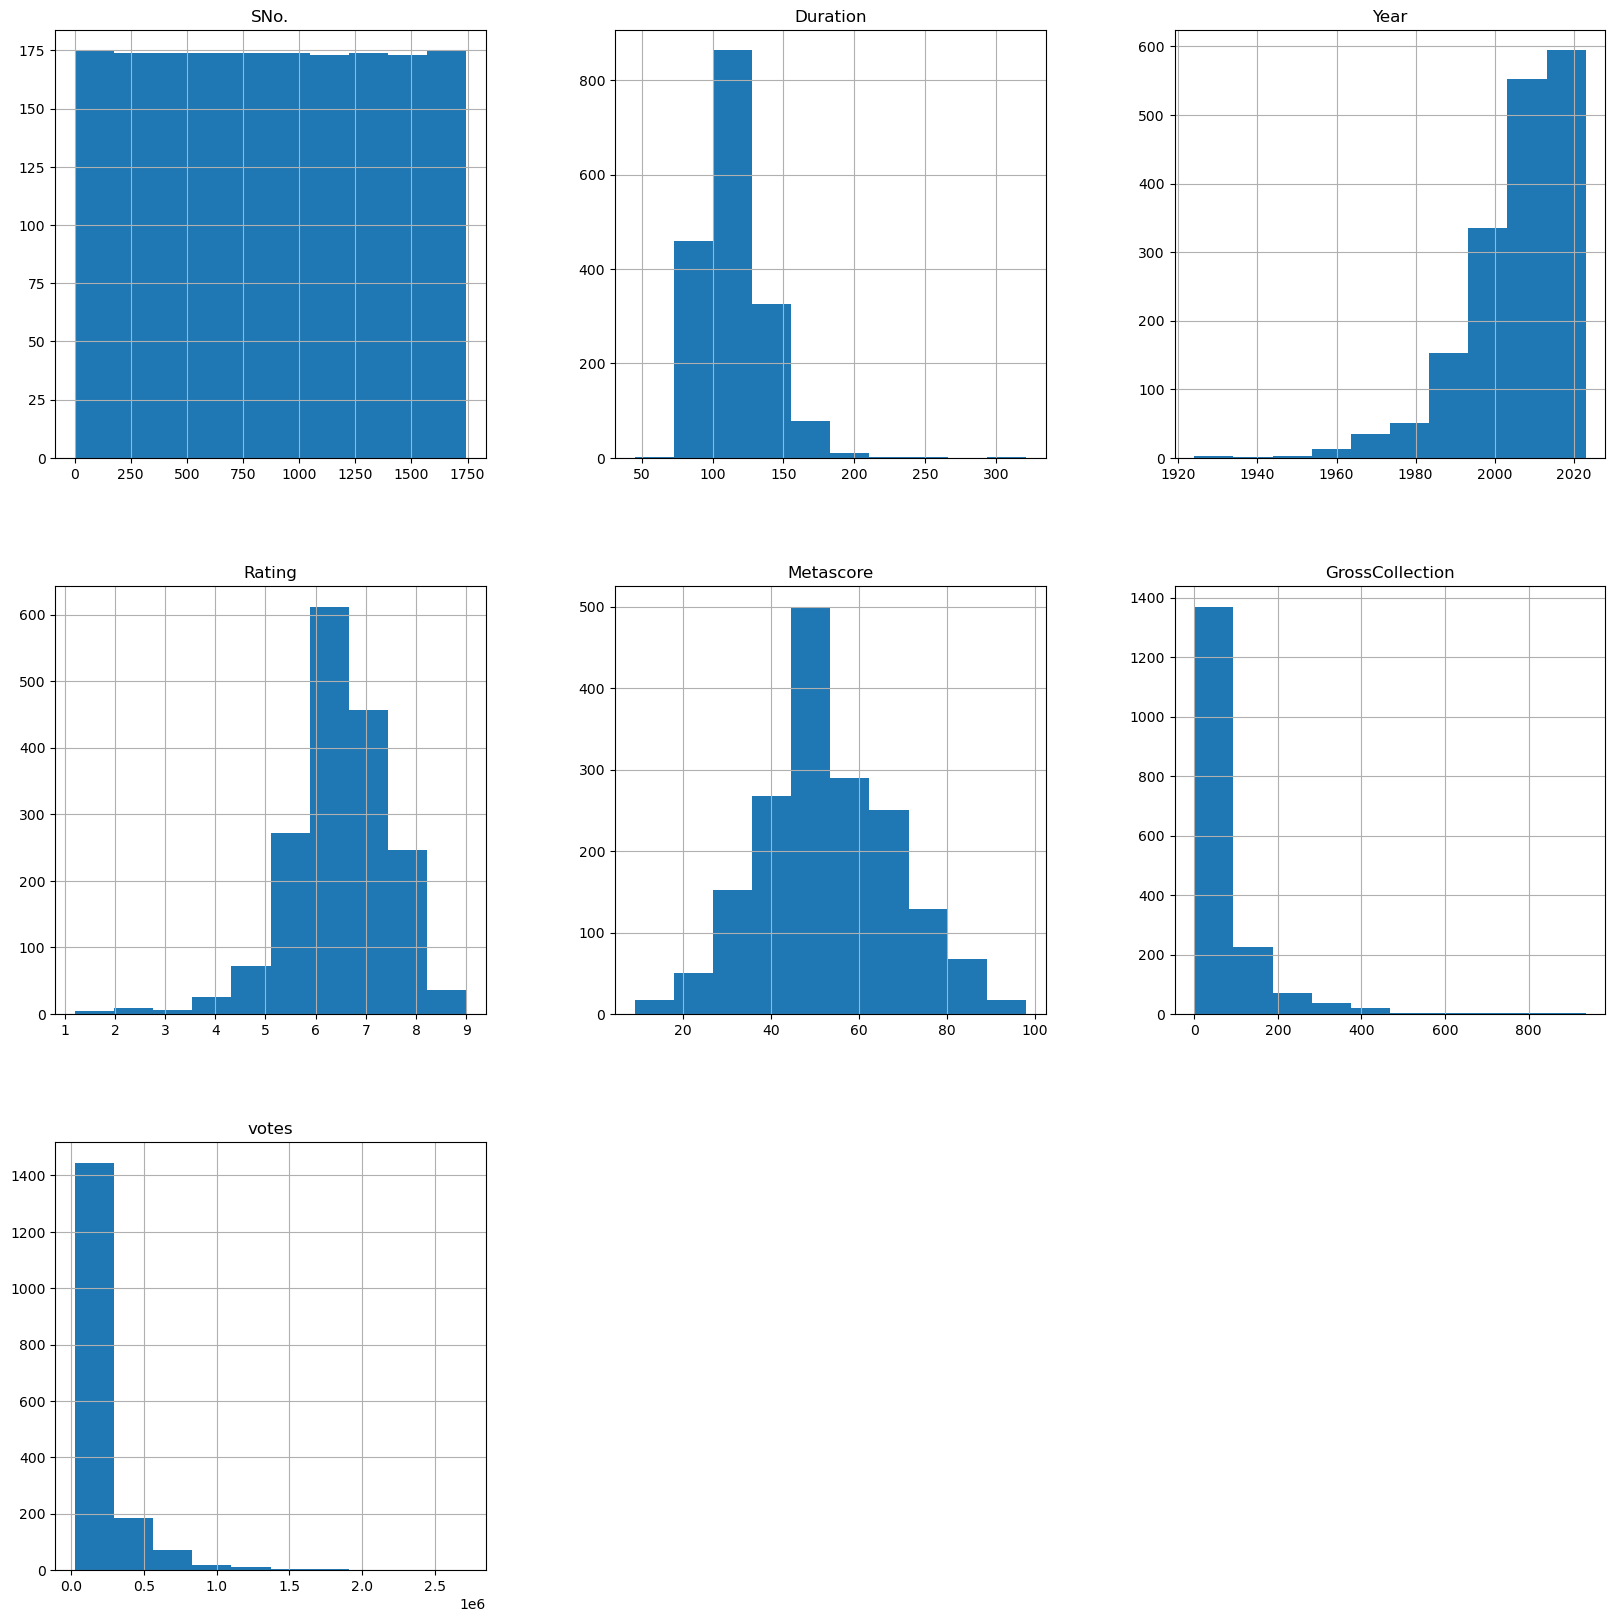

In [64]:
IMDB.hist(bins=10, figsize=(20,20))

<Axes: xlabel='Duration', ylabel='GrossCollection'>

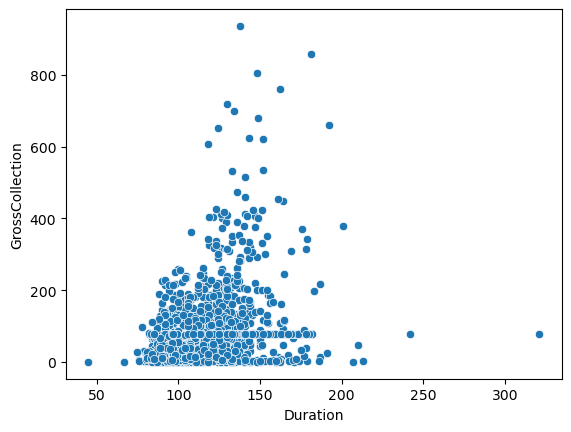

In [65]:
sns.scatterplot(x='Duration',y='GrossCollection',data=IMDB)

<Axes: xlabel='Year', ylabel='GrossCollection'>

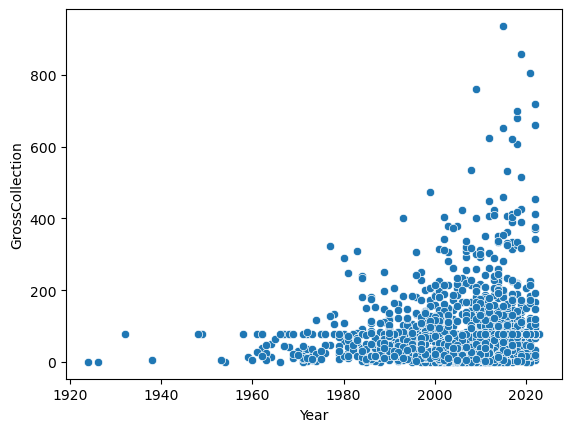

In [66]:
sns.scatterplot(x='Year',y='GrossCollection',data=IMDB)

<Axes: xlabel='Rating', ylabel='GrossCollection'>

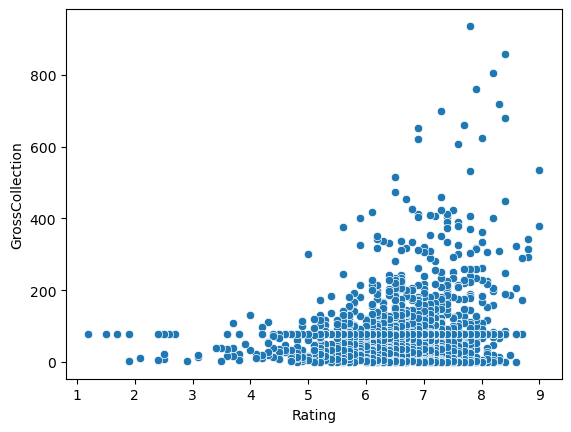

In [67]:
sns.scatterplot(x='Rating',y='GrossCollection',data=IMDB)

<Axes: xlabel='Certification', ylabel='GrossCollection'>

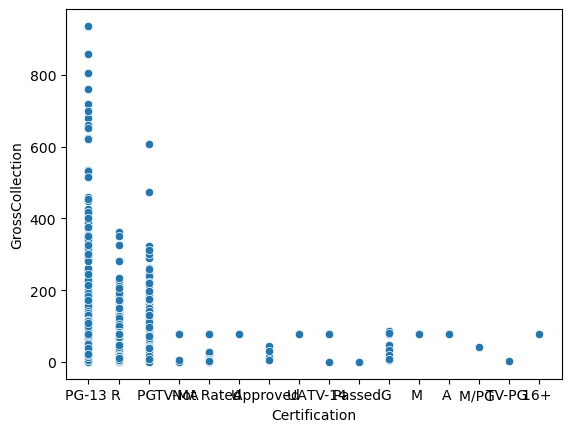

In [68]:
sns.scatterplot(x='Certification',y='GrossCollection',data=IMDB)

<Axes: xlabel='votes', ylabel='GrossCollection'>

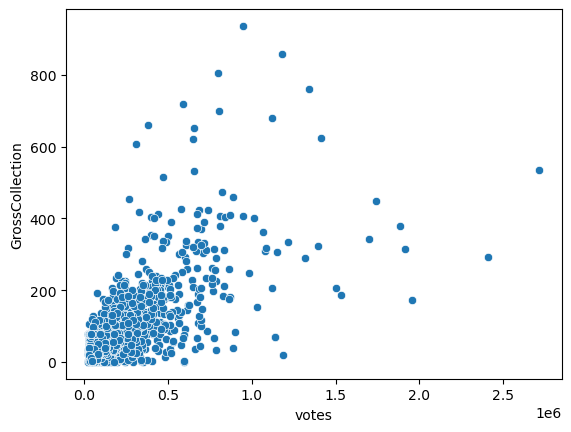

In [69]:
sns.scatterplot(x='votes',y='GrossCollection',data=IMDB)

<Axes: xlabel='Duration', ylabel='votes'>

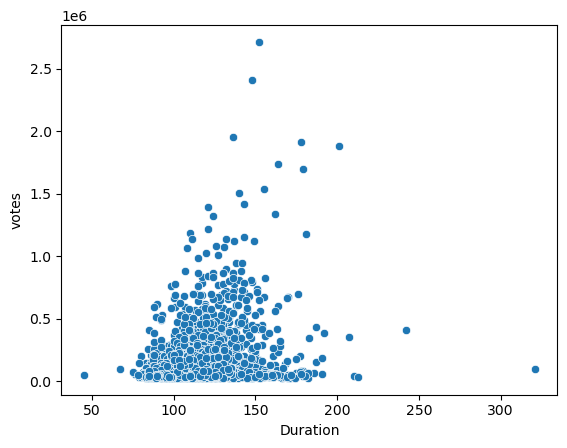

In [70]:
sns.scatterplot(x='Duration',y='votes',data=IMDB)

<Axes: xlabel='Year', ylabel='votes'>

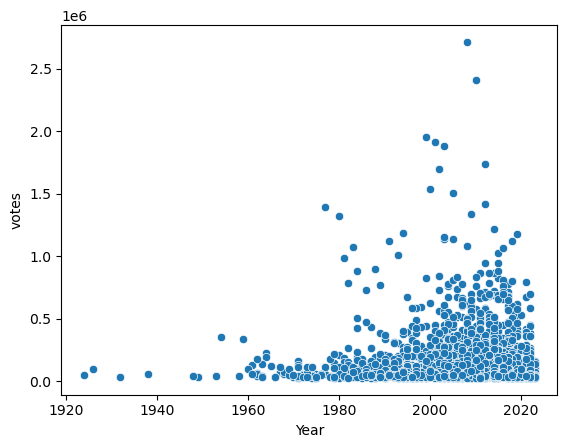

In [71]:
sns.scatterplot(x='Year',y='votes',data=IMDB)

<Axes: xlabel='Rating', ylabel='votes'>

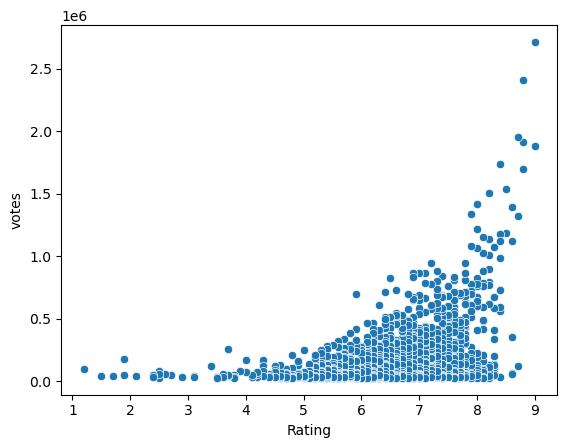

In [72]:
sns.scatterplot(x='Rating',y='votes',data=IMDB)

<Axes: xlabel='Metascore', ylabel='votes'>

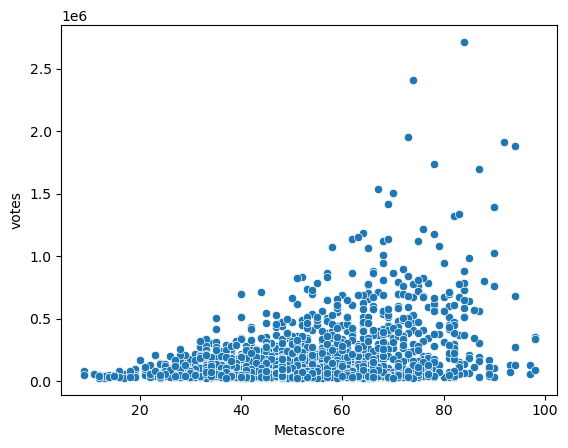

In [73]:
sns.scatterplot(x='Metascore',y='votes',data=IMDB)

<Axes: xlabel='Certification', ylabel='votes'>

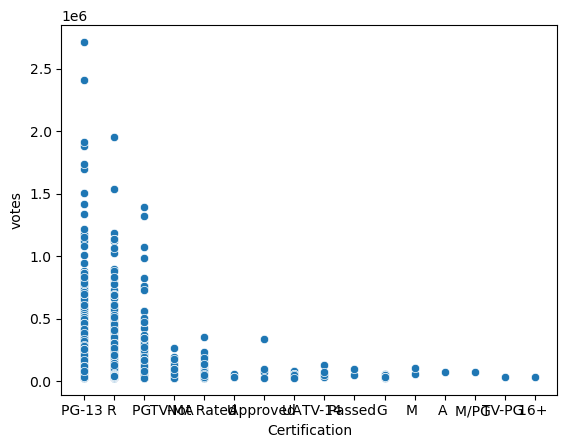

In [74]:
sns.scatterplot(x='Certification',y='votes',data=IMDB)

<Axes: xlabel='GrossCollection', ylabel='votes'>

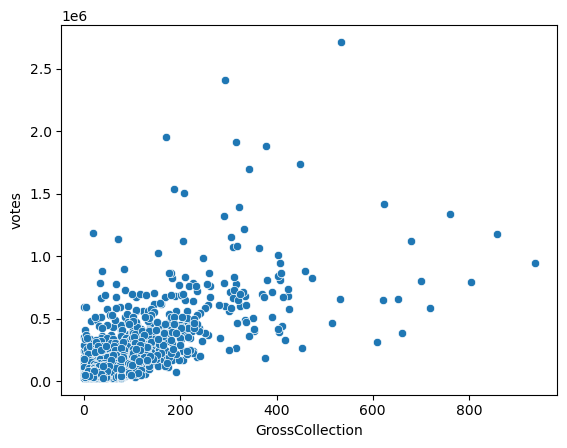

In [75]:
sns.scatterplot(x='GrossCollection',y='votes',data=IMDB)

<Figure size 2500x3000 with 0 Axes>

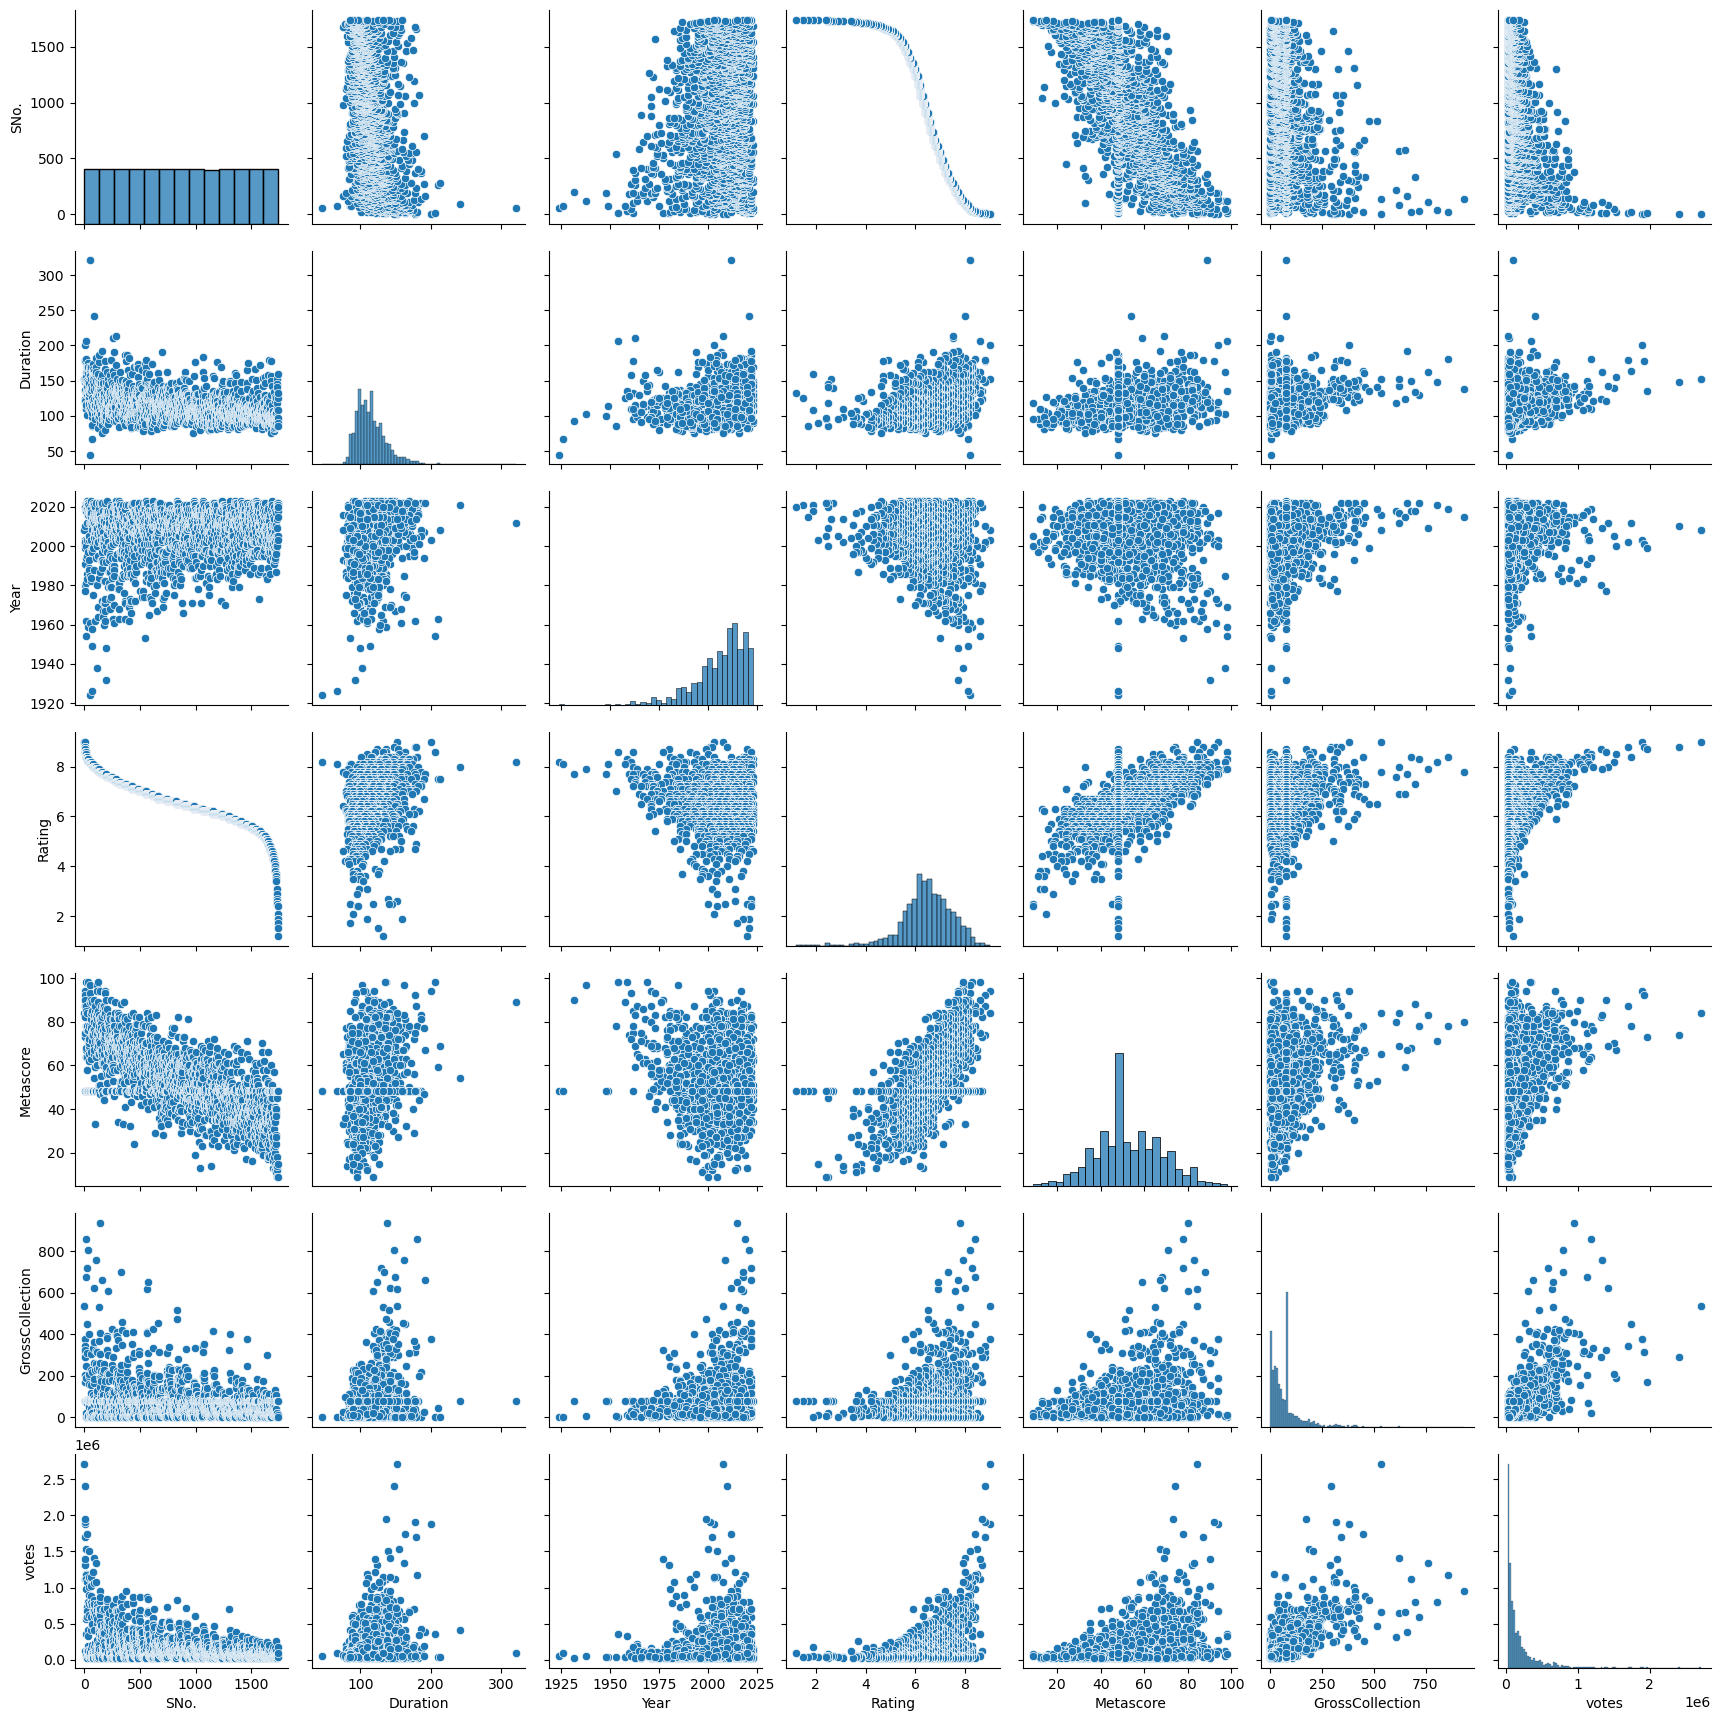

In [76]:
plt.figure(figsize=(25,30))
sns.pairplot(IMDB)
plt.show()

# Observations
Most movies have been launched in the decade of 2000-2010.

Metascore varies between 0 to 100 while most movies has metascore lies around 50

Most movies are of action genre. While crime, adventure Sci-fi and drama are most common genre.

Most movies are PG-13 and R rated.

Most movies are 90 to 120 minutes long.

Very less movies are there which are less than 60 minutes or more than 200 minutes.

Highest rated movies have been released in years between 2000-2010.

Some of new movies launched between year 2015-2020 has been the lowest rated movies.

Trend can be seen that old movies have mostly received high ratings while some of the newer movies have received   very low ratings.

Higher rated movies have been found to have higher gross collection.

Even with high rating and metascore, movies have been found to be grossing below average.


# Encoding Techniques
Now we will encode our data

In [77]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in IMDB.columns:
    if IMDB[i].dtypes=='object':
        IMDB[i]=enc.fit_transform(IMDB[i].values.reshape(-1,1))
IMDB

SNo.  MovieName  Duration  Year  Rating  Metascore  Director1  Star1  \
0        1     1291.0       152  2008     9.0         84      151.0  119.0   
1        2     1403.0       201  2003     9.0         94      681.0  184.0   
2        3      598.0       148  2010     8.8         74      151.0  407.0   
3        4     1402.0       178  2001     8.8         92      681.0  184.0   
4        5     1404.0       179  2002     8.8         87      681.0  184.0   
...    ...        ...       ...   ...     ...        ...        ...    ...   
1739  1740      963.0       109  2021     1.9         48      700.0  576.0   
1740  1741      961.0       160  2018     1.9         48      720.0   43.0   
1741  1742       87.0        85  2015     1.7         48      806.0  192.0   
1742  1743     1286.0       125  2021     1.5         48      495.0  692.0   
1743  1744     1040.0       133  2020     1.2         48      545.0   24.0   

       Star2   Star3   Star4  Genre1  Genre2  Genre3  GrossCollection  \
0      406.0     2.0   898.0     0.0     4.0     4.0       534.860000   
1     1092.0   462.0  1015.0     0.0     1.0     4.0       377.850000   
2      559.0   351.0   720.0     0.0     1.0    13.0       292.580000   
3      424.0   936.0  1219.0     0.0     1.0     4.0       315.540000   
4      424.0  1260.0  1015.0     0.0     1.0     4.0       342.550000   
...      ...     ...     ...     ...     ...     ...              ...   
1739   273.0  1003.0   514.0     0.0     4.0    15.0        77.293399   
1740   965.0   143.0   516.0     0.0     4.0    15.0         1.690000   
1741   462.0  1078.0  1405.0     0.0     7.0    13.0        77.293399   
1742    56.0   111.0   407.0     0.0     4.0     4.0        77.293399   
1743   974.0   978.0    15.0     0.0     5.0     4.0        77.293399   

      Certification    votes  
0               8.0  2715547  
1               8.0  1885494  
2               8.0  2410581  
3               8.0  1914240  
4               8.0  1701924  
...             ...      ...  
1739           12.0   178717  
1740            6.0    47507  
1741           10.0    42911  
1742           10.0    39408  
1743           12.0    96244  

[1740 rows x 17 columns]

Now Lets See that counts of each columns

Corelation with Target

<Axes: >

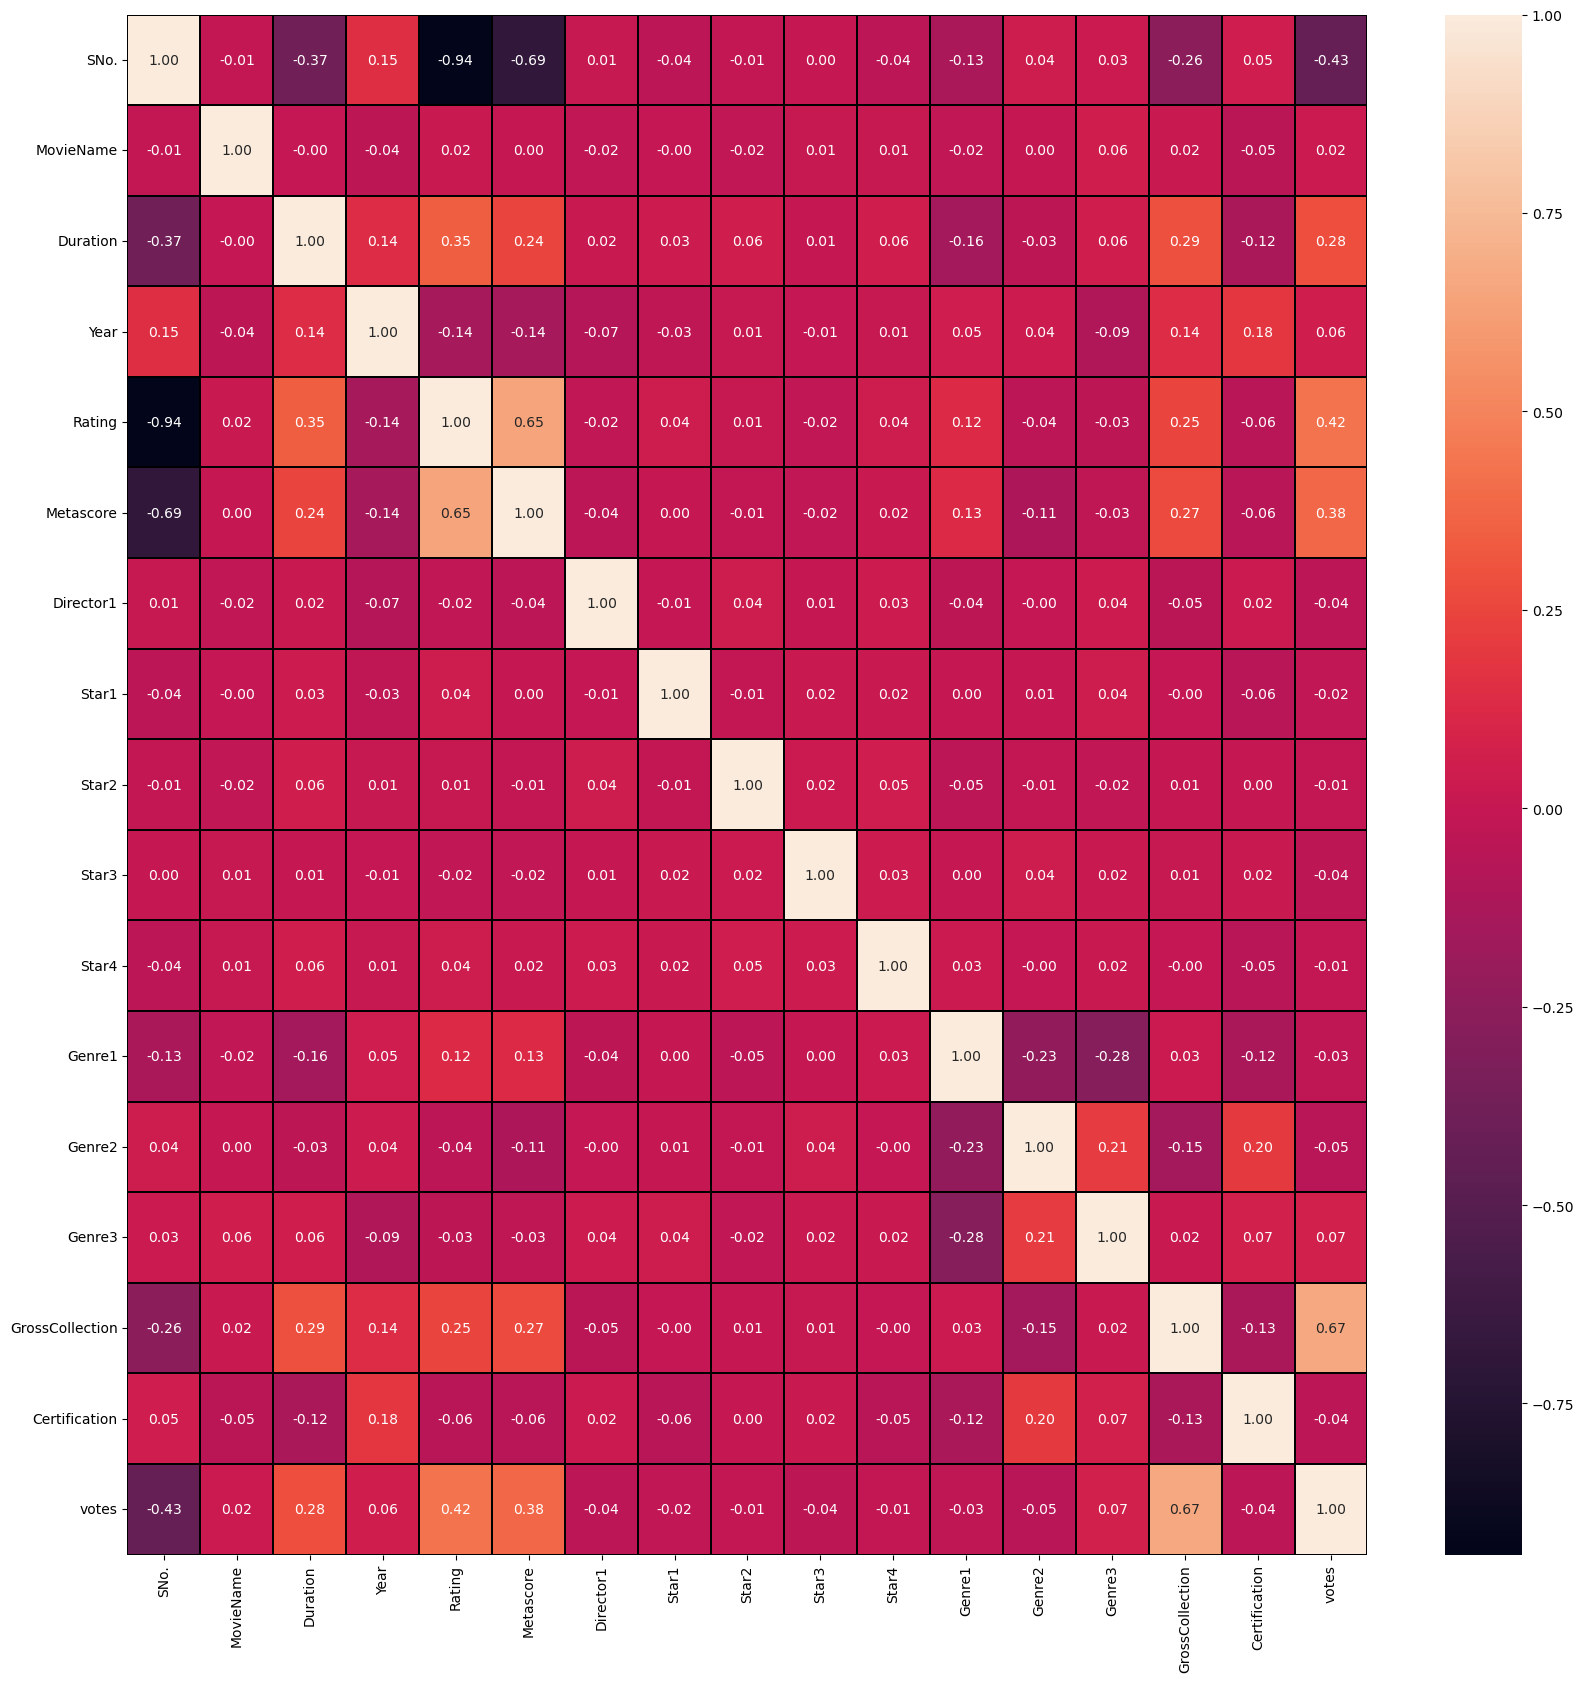

In [78]:
plt.figure(figsize = (20,20))
sns.heatmap(IMDB.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [79]:
for i in IMDB.columns:
        print(IMDB[i].value_counts())
        print('*'*100)

1       1
1160    1
1171    1
1170    1
1169    1
       ..
577     1
576     1
575     1
574     1
1744    1
Name: SNo., Length: 1740, dtype: int64
****************************************************************************************************
830.0     3
476.0     3
1368.0    2
543.0     2
1014.0    2
         ..
20.0      1
111.0     1
1339.0    1
1024.0    1
1040.0    1
Name: MovieName, Length: 1699, dtype: int64
****************************************************************************************************
107    48
109    42
100    42
110    41
102    40
       ..
186     1
207     1
192     1
213     1
78      1
Name: Duration, Length: 119, dtype: int64
****************************************************************************************************
2016    78
2014    76
2018    70
2011    68
2019    67
        ..
1938     1
1932     1
1948     1
1960     1
1965     1
Name: Year, Length: 74, dtype: int64
**************************************************************

Metascore and rating are co related.

Gross collection and votes are co related.

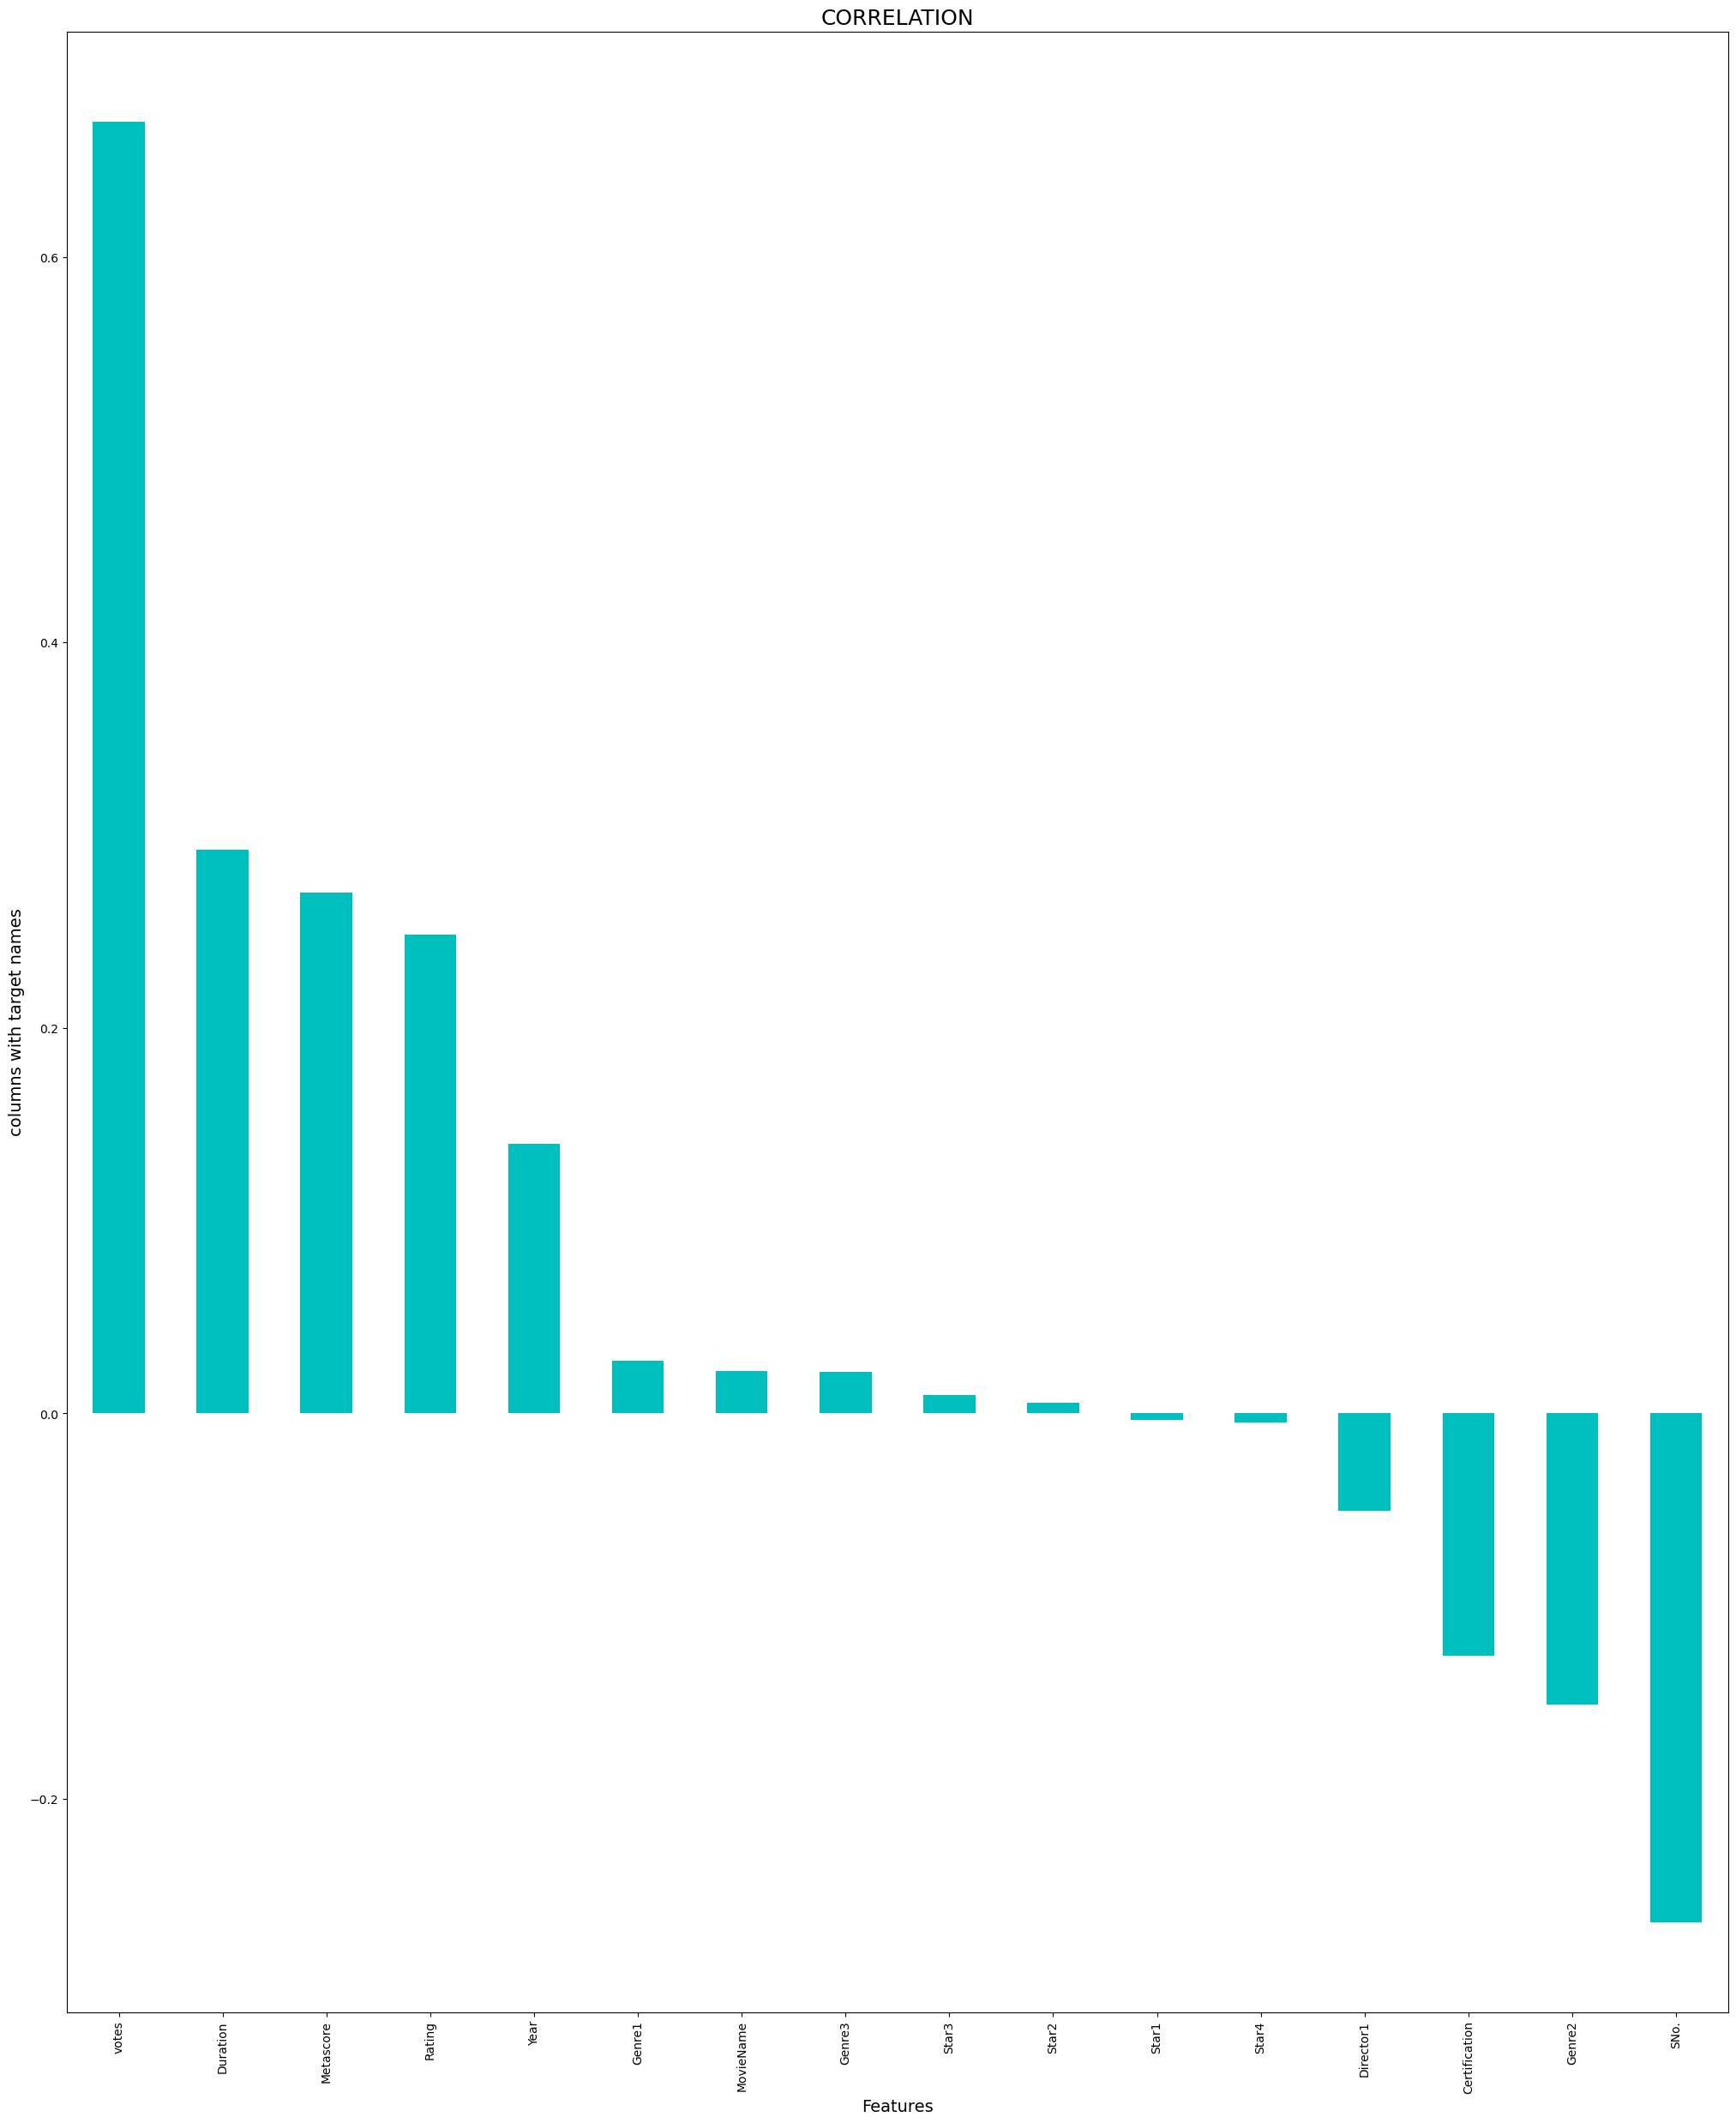

In [80]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
IMDB.corr()['GrossCollection'].sort_values(ascending=False).drop(['GrossCollection']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [81]:
IMDB.drop(['SNo.','Genre2','Certification'],axis=1,inplace=True)

Now Lets Delete the columns which are Negatively corrlated to target variable

In [82]:
IMDB.corr()

MovieName  Duration      Year    Rating  Metascore  \
MovieName         1.000000 -0.003983 -0.036918  0.018557   0.003043   
Duration         -0.003983  1.000000  0.137324  0.346547   0.242393   
Year             -0.036918  0.137324  1.000000 -0.142185  -0.139332   
Rating            0.018557  0.346547 -0.142185  1.000000   0.647505   
Metascore         0.003043  0.242393 -0.139332  0.647505   1.000000   
Director1        -0.016358  0.016598 -0.073060 -0.023060  -0.040086   
Star1            -0.001741  0.030354 -0.025146  0.038127   0.000725   
Star2            -0.016227  0.057772  0.009831  0.011656  -0.012908   
Star3             0.007826  0.006588 -0.006971 -0.017050  -0.020814   
Star4             0.009894  0.056853  0.012996  0.041164   0.018964   
Genre1           -0.015813 -0.155345  0.045271  0.123077   0.126791   
Genre3            0.057789  0.055885 -0.094564 -0.033125  -0.027816   
GrossCollection   0.021940  0.292306  0.139925  0.248505   0.270334   
votes             0.024187  0.280113  0.058036  0.424411   0.380433   

                 Director1     Star1     Star2     Star3     Star4    Genre1  \
MovieName        -0.016358 -0.001741 -0.016227  0.007826  0.009894 -0.015813   
Duration          0.016598  0.030354  0.057772  0.006588  0.056853 -0.155345   
Year             -0.073060 -0.025146  0.009831 -0.006971  0.012996  0.045271   
Rating           -0.023060  0.038127  0.011656 -0.017050  0.041164  0.123077   
Metascore        -0.040086  0.000725 -0.012908 -0.020814  0.018964  0.126791   
Director1         1.000000 -0.006526  0.039387  0.006337  0.034672 -0.035647   
Star1            -0.006526  1.000000 -0.012965  0.020941  0.016399  0.001940   
Star2             0.039387 -0.012965  1.000000  0.023401  0.045631 -0.045808   
Star3             0.006337  0.020941  0.023401  1.000000  0.033745  0.001282   
Star4             0.034672  0.016399  0.045631  0.033745  1.000000  0.029145   
Genre1           -0.035647  0.001940 -0.045808  0.001282  0.029145  1.000000   
Genre3            0.036924  0.038467 -0.022105  0.016648  0.016442 -0.283426   
GrossCollection  -0.050535 -0.003551  0.005498  0.009443 -0.004827  0.027207   
votes            -0.040813 -0.020767 -0.009577 -0.038155 -0.011789 -0.029313   

                   Genre3  GrossCollection     votes  
MovieName        0.057789         0.021940  0.024187  
Duration         0.055885         0.292306  0.280113  
Year            -0.094564         0.139925  0.058036  
Rating          -0.033125         0.248505  0.424411  
Metascore       -0.027816         0.270334  0.380433  
Director1        0.036924        -0.050535 -0.040813  
Star1            0.038467        -0.003551 -0.020767  
Star2           -0.022105         0.005498 -0.009577  
Star3            0.016648         0.009443 -0.038155  
Star4            0.016442        -0.004827 -0.011789  
Genre1          -0.283426         0.027207 -0.029313  
Genre3           1.000000         0.021334  0.071370  
GrossCollection  0.021334         1.000000  0.670317  
votes            0.071370         0.670317  1.000000

In [83]:
IMDB.corr()['GrossCollection'].sort_values()

Director1         -0.050535
Star4             -0.004827
Star1             -0.003551
Star2              0.005498
Star3              0.009443
Genre3             0.021334
MovieName          0.021940
Genre1             0.027207
Year               0.139925
Rating             0.248505
Metascore          0.270334
Duration           0.292306
votes              0.670317
GrossCollection    1.000000
Name: GrossCollection, dtype: float64

DESCRIPTIVE STATSTICS

In [84]:
IMDB.describe().T

count           mean            std      min       25%  \
MovieName        1740.0     848.068391     489.715412      0.0    426.75   
Duration         1740.0     115.341954      21.743282     45.0    100.00   
Year             1740.0    2006.031609      13.262798   1924.0   2000.00   
Rating           1740.0       6.481264       0.995525      1.2      5.90   
Metascore        1740.0      52.765517      15.431578      9.0     43.00   
Director1        1740.0     493.361494     267.748934      0.0    271.75   
Star1            1740.0     356.840805     208.010664      0.0    172.00   
Star2            1740.0     581.429885     327.951264      0.0    301.75   
Star3            1740.0     652.913793     381.453085      0.0    321.75   
Star4            1740.0     713.556897     421.438417      0.0    346.75   
Genre1           1740.0       0.039655       0.195204      0.0      0.00   
Genre3           1740.0       7.657471       5.127913      0.0      4.00   
GrossCollection  1740.0      77.457413      94.586990      0.0     22.49   
votes            1740.0  181296.480460  236558.704352  25052.0  47466.25   

                      50%         75%         max  
MovieName          846.50    1271.250     1698.00  
Duration           111.00     126.250      321.00  
Year              2009.00    2016.000     2023.00  
Rating               6.50       7.100        9.00  
Metascore           50.00      64.000       98.00  
Director1          500.00     728.000      941.00  
Star1              345.50     551.000      719.00  
Star2              583.50     868.000     1153.00  
Star3              642.50     984.250     1319.00  
Star4              704.50    1083.250     1436.00  
Genre1               0.00       0.000        1.00  
Genre3               6.00      13.000       17.00  
GrossCollection     56.65      79.835      936.66  
votes            97219.00  213487.250  2715547.00

<Axes: >

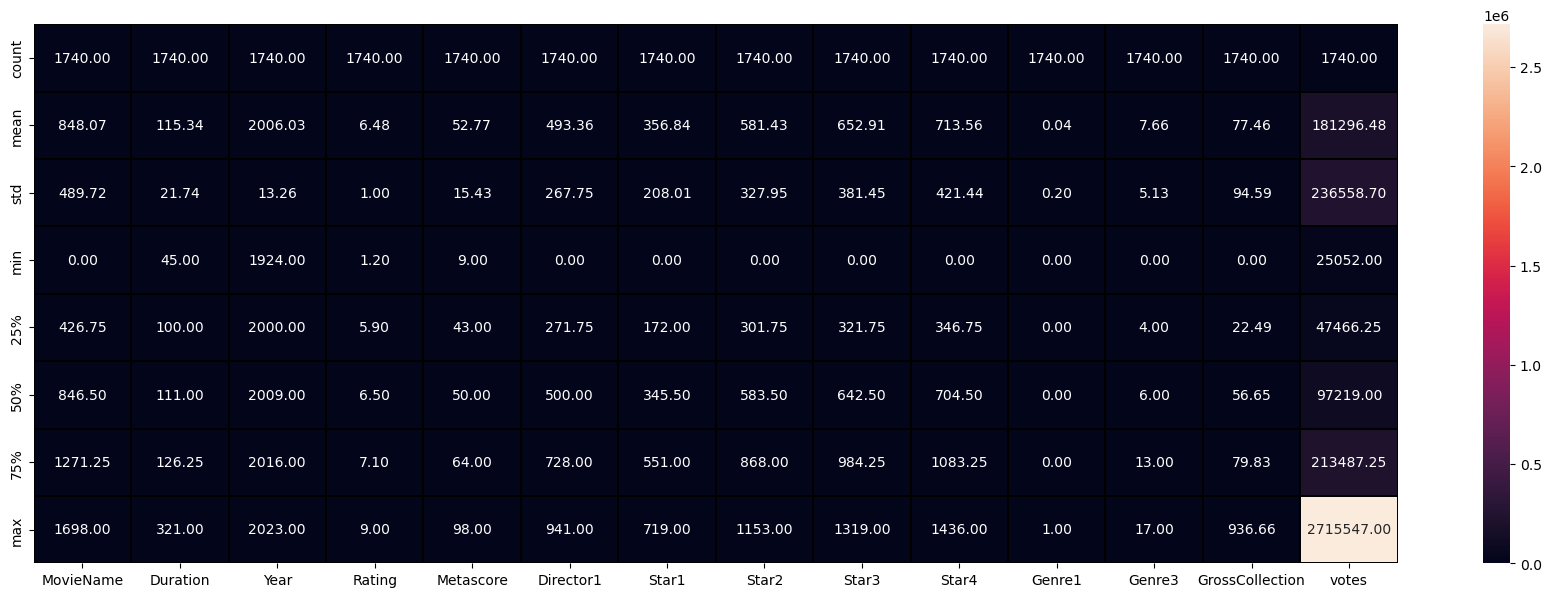

In [85]:
plt.figure(figsize = (22,7))
sns.heatmap(IMDB.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

OUTLIERS CHECKING(Any One outlier method can be used)

In [86]:
colmlist=IMDB.columns.values
ncol=30
nrows=14

In [87]:
IMDB

MovieName  Duration  Year  Rating  Metascore  Director1  Star1   Star2  \
0        1291.0       152  2008     9.0         84      151.0  119.0   406.0   
1        1403.0       201  2003     9.0         94      681.0  184.0  1092.0   
2         598.0       148  2010     8.8         74      151.0  407.0   559.0   
3        1402.0       178  2001     8.8         92      681.0  184.0   424.0   
4        1404.0       179  2002     8.8         87      681.0  184.0   424.0   
...         ...       ...   ...     ...        ...        ...    ...     ...   
1739      963.0       109  2021     1.9         48      700.0  576.0   273.0   
1740      961.0       160  2018     1.9         48      720.0   43.0   965.0   
1741       87.0        85  2015     1.7         48      806.0  192.0   462.0   
1742     1286.0       125  2021     1.5         48      495.0  692.0    56.0   
1743     1040.0       133  2020     1.2         48      545.0   24.0   974.0   

       Star3   Star4  Genre1  Genre3  GrossCollection    votes  
0        2.0   898.0     0.0     4.0       534.860000  2715547  
1      462.0  1015.0     0.0     4.0       377.850000  1885494  
2      351.0   720.0     0.0    13.0       292.580000  2410581  
3      936.0  1219.0     0.0     4.0       315.540000  1914240  
4     1260.0  1015.0     0.0     4.0       342.550000  1701924  
...      ...     ...     ...     ...              ...      ...  
1739  1003.0   514.0     0.0    15.0        77.293399   178717  
1740   143.0   516.0     0.0    15.0         1.690000    47507  
1741  1078.0  1405.0     0.0    13.0        77.293399    42911  
1742   111.0   407.0     0.0     4.0        77.293399    39408  
1743   978.0    15.0     0.0     4.0        77.293399    96244  

[1740 rows x 14 columns]

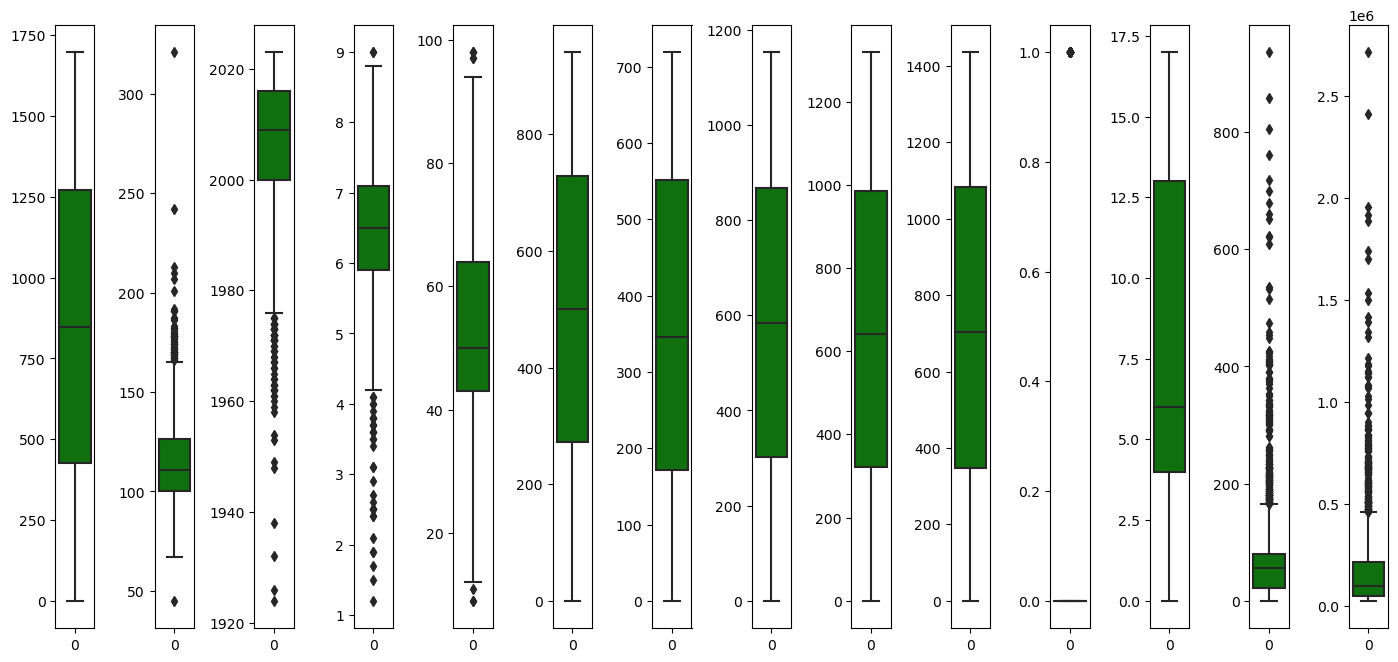

In [88]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= IMDB[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

MovieName             Axes(0.125,0.11;0.0466867x0.77)
Duration           Axes(0.181024,0.11;0.0466867x0.77)
Year               Axes(0.237048,0.11;0.0466867x0.77)
Rating             Axes(0.293072,0.11;0.0466867x0.77)
Metascore          Axes(0.349096,0.11;0.0466867x0.77)
Director1           Axes(0.40512,0.11;0.0466867x0.77)
Star1              Axes(0.461145,0.11;0.0466867x0.77)
Star2              Axes(0.517169,0.11;0.0466867x0.77)
Star3              Axes(0.573193,0.11;0.0466867x0.77)
Star4              Axes(0.629217,0.11;0.0466867x0.77)
Genre1             Axes(0.685241,0.11;0.0466867x0.77)
Genre3             Axes(0.741265,0.11;0.0466867x0.77)
GrossCollection    Axes(0.797289,0.11;0.0466867x0.77)
votes              Axes(0.853313,0.11;0.0466867x0.77)
dtype: object

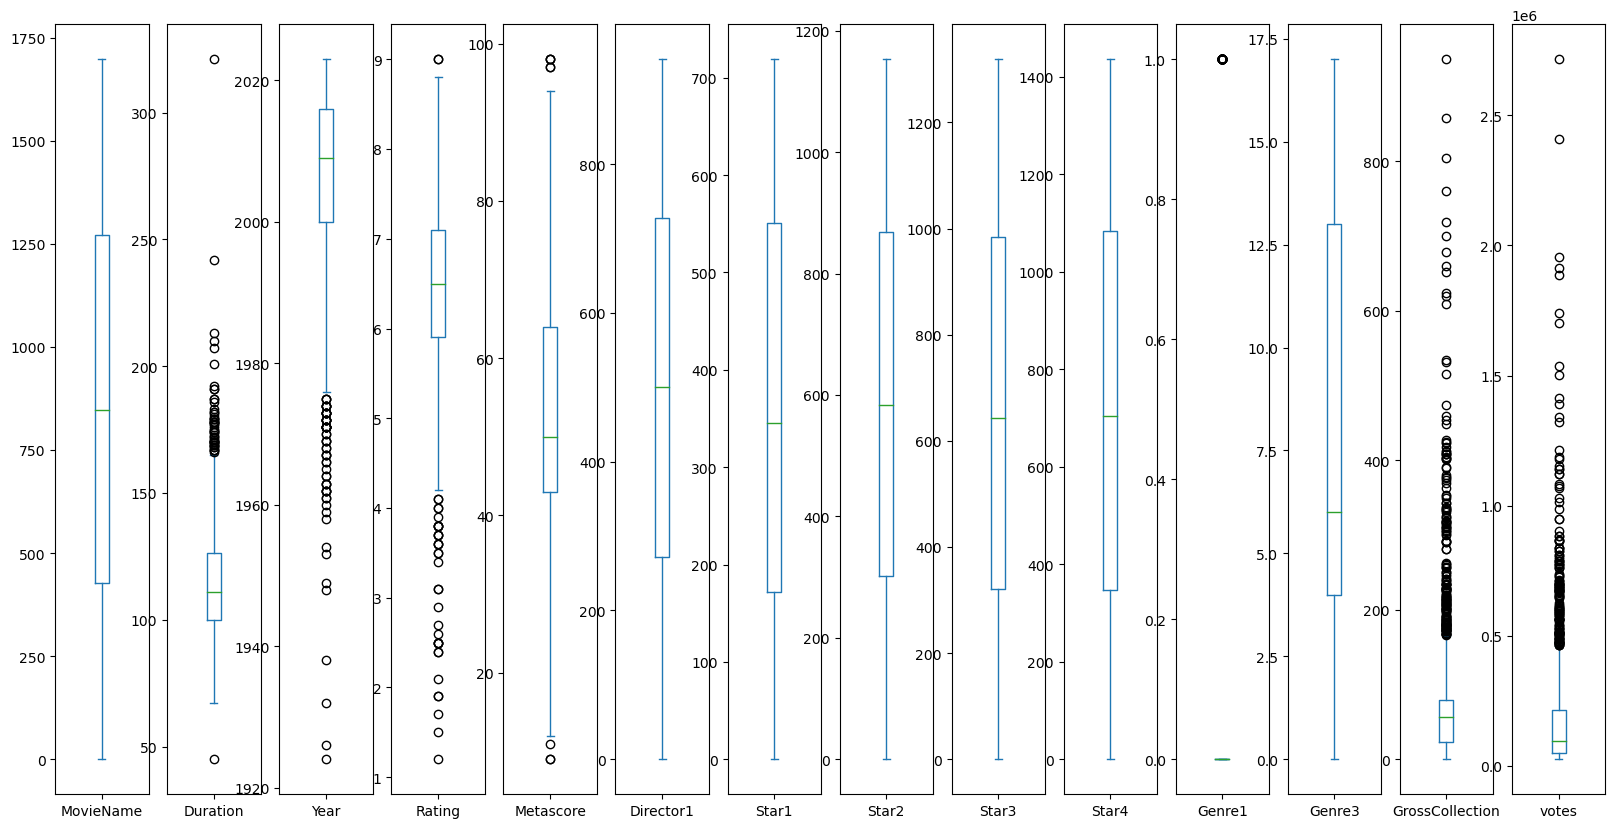

In [89]:
# to find out outliers in the dataset
IMDB.plot(kind='box',subplots=True,figsize=(20,10))

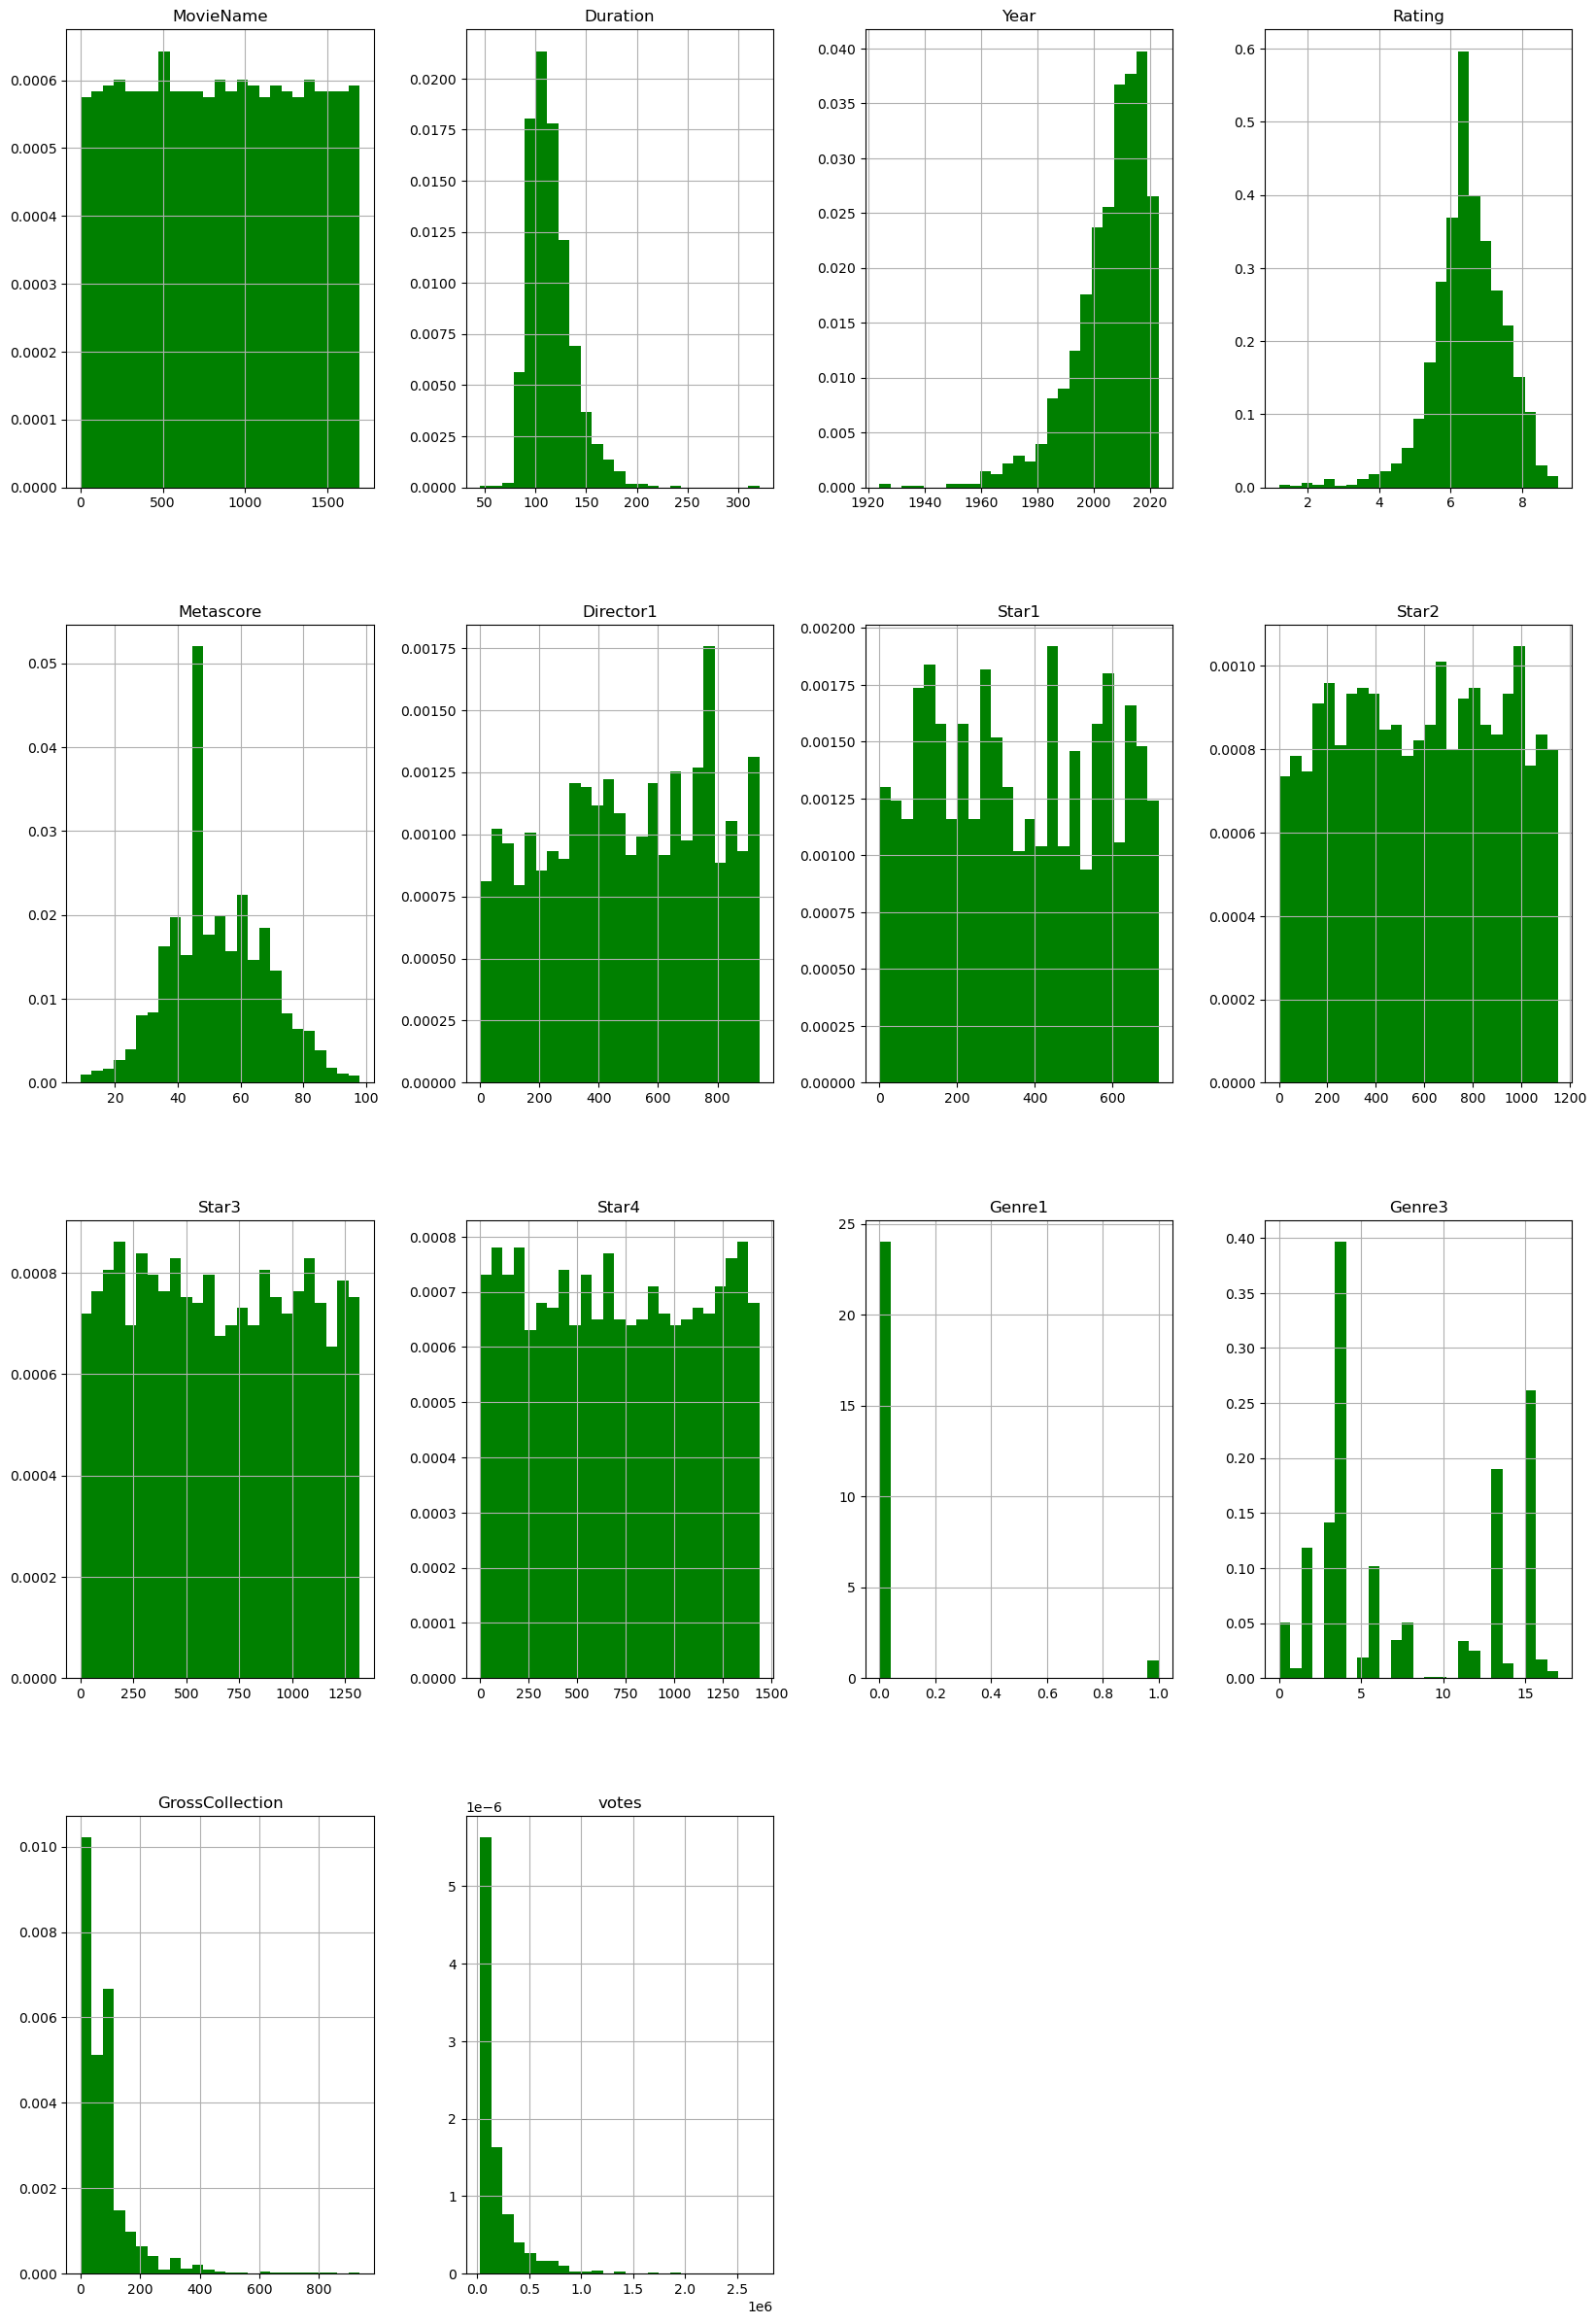

In [90]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,30)
IMDB.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

Now Lets Remove Outliers Now

In [91]:
IMDB

MovieName  Duration  Year  Rating  Metascore  Director1  Star1   Star2  \
0        1291.0       152  2008     9.0         84      151.0  119.0   406.0   
1        1403.0       201  2003     9.0         94      681.0  184.0  1092.0   
2         598.0       148  2010     8.8         74      151.0  407.0   559.0   
3        1402.0       178  2001     8.8         92      681.0  184.0   424.0   
4        1404.0       179  2002     8.8         87      681.0  184.0   424.0   
...         ...       ...   ...     ...        ...        ...    ...     ...   
1739      963.0       109  2021     1.9         48      700.0  576.0   273.0   
1740      961.0       160  2018     1.9         48      720.0   43.0   965.0   
1741       87.0        85  2015     1.7         48      806.0  192.0   462.0   
1742     1286.0       125  2021     1.5         48      495.0  692.0    56.0   
1743     1040.0       133  2020     1.2         48      545.0   24.0   974.0   

       Star3   Star4  Genre1  Genre3  GrossCollection    votes  
0        2.0   898.0     0.0     4.0       534.860000  2715547  
1      462.0  1015.0     0.0     4.0       377.850000  1885494  
2      351.0   720.0     0.0    13.0       292.580000  2410581  
3      936.0  1219.0     0.0     4.0       315.540000  1914240  
4     1260.0  1015.0     0.0     4.0       342.550000  1701924  
...      ...     ...     ...     ...              ...      ...  
1739  1003.0   514.0     0.0    15.0        77.293399   178717  
1740   143.0   516.0     0.0    15.0         1.690000    47507  
1741  1078.0  1405.0     0.0    13.0        77.293399    42911  
1742   111.0   407.0     0.0     4.0        77.293399    39408  
1743   978.0    15.0     0.0     4.0        77.293399    96244  

[1740 rows x 14 columns]

In [92]:
#to check for outliers through zscore 

from scipy.stats import zscore
(np.abs(zscore( IMDB)) < 3).all()

MovieName           True
Duration           False
Year               False
Rating             False
Metascore           True
Director1           True
Star1               True
Star2               True
Star3               True
Star4               True
Genre1             False
Genre3              True
GrossCollection    False
votes              False
dtype: bool

In [93]:
#to remove outliers in data set through zscore
z = np.abs(zscore( IMDB))
z.shape


(1740, 14)

In [94]:
threshold = 3
print(np.where(z>3))


(array([   0,    0,    1,    1,    1,    2,    3,    4,    5,    6,    8,
          9,   10,   10,   11,   13,   14,   15,   15,   15,   16,   17,
         18,   18,   20,   20,   26,   27,   28,   29,   36,   37,   37,
         39,   41,   42,   43,   44,   48,   49,   49,   50,   57,   59,
         64,   67,   68,   69,   70,   71,   80,   83,   83,   84,   84,
         85,   87,   89,   93,   99,  104,  106,  106,  107,  116,  118,
        119,  129,  132,  133,  138,  138,  141,  149,  153,  155,  157,
        158,  162,  162,  170,  173,  176,  183,  188,  190,  193,  195,
        200,  204,  211,  211,  212,  239,  241,  242,  243,  245,  257,
        257,  264,  266,  279,  286,  292,  296,  300,  305,  308,  315,
        328,  335,  340,  342,  344,  346,  349,  363,  367,  372,  372,
        379,  382,  393,  397,  401,  404,  406,  415,  416,  418,  426,
        440,  446,  452,  479,  523,  524,  541,  558,  561,  566,  569,
        577,  583,  600,  615,  648,  662,  699,  

In [95]:
IMDB_new=IMDB[(z<3).all(axis=1)]
print(IMDB_new.shape)

(1559, 14)


In [96]:
IMDB_new

MovieName  Duration  Year  Rating  Metascore  Director1  Star1   Star2  \
7        1113.0       153  2020     8.7         48      859.0  634.0   861.0   
12       1088.0       163  2022     8.6         48      332.0  170.0   800.0   
19        874.0       101  2003     8.4         77      655.0  109.0  1139.0   
21         67.0       137  1986     8.4         84      364.0  611.0   756.0   
22        670.0       145  2019     8.4         48      534.0  358.0   811.0   
...         ...       ...   ...     ...        ...        ...    ...     ...   
1721      379.0       107  2000     3.6         14      163.0  351.0   499.0   
1722      826.0        95  1997     3.6         11      445.0  558.0  1041.0   
1723      289.0        99  2017     3.6         48       26.0  562.0   336.0   
1724      141.0        98  1996     3.5         40      192.0  504.0    44.0   
1725     1145.0        89  2011     3.5         37      755.0  304.0   501.0   

       Star3   Star4  Genre1  Genre3  GrossCollection   votes  
7       94.0  1358.0     0.0     4.0        77.293399  119418  
12    1007.0  1280.0     0.0    11.0        77.293399   59650  
19     638.0   735.0     0.0    11.0         0.710000  595685  
21     176.0  1040.0     0.0    13.0        85.160000  731975  
22      97.0   424.0     0.0     3.0        77.293399   36003  
...      ...     ...     ...     ...              ...     ...  
1721  1315.0   148.0     0.0     6.0        15.220000   35087  
1722   499.0  1202.0     0.0     6.0        35.930000   56319  
1723   958.0  1045.0     0.0     4.0        77.293399   33481  
1724    14.0   276.0     0.0     4.0         3.790000   30245  
1725   576.0  1169.0     0.0     2.0        38.540000   26888  

[1559 rows x 14 columns]

In [97]:
IMDB.shape

(1740, 14)

In [98]:
IMDB_new.shape

(1559, 14)

In [99]:
print ("Old DataFrame =",IMDB.shape)
print ("New DataFrame =",IMDB_new.shape)
print ("Total dropped rows = ",IMDB.shape[0] - IMDB_new.shape[0])

Old DataFrame = (1740, 14)
New DataFrame = (1559, 14)
Total dropped rows =  181


In [100]:
#to find % loss in data
loss = (1740-1559)/1740* 100
print(loss)

10.402298850574713


In [101]:
IMDB_new

MovieName  Duration  Year  Rating  Metascore  Director1  Star1   Star2  \
7        1113.0       153  2020     8.7         48      859.0  634.0   861.0   
12       1088.0       163  2022     8.6         48      332.0  170.0   800.0   
19        874.0       101  2003     8.4         77      655.0  109.0  1139.0   
21         67.0       137  1986     8.4         84      364.0  611.0   756.0   
22        670.0       145  2019     8.4         48      534.0  358.0   811.0   
...         ...       ...   ...     ...        ...        ...    ...     ...   
1721      379.0       107  2000     3.6         14      163.0  351.0   499.0   
1722      826.0        95  1997     3.6         11      445.0  558.0  1041.0   
1723      289.0        99  2017     3.6         48       26.0  562.0   336.0   
1724      141.0        98  1996     3.5         40      192.0  504.0    44.0   
1725     1145.0        89  2011     3.5         37      755.0  304.0   501.0   

       Star3   Star4  Genre1  Genre3  GrossCollection   votes  
7       94.0  1358.0     0.0     4.0        77.293399  119418  
12    1007.0  1280.0     0.0    11.0        77.293399   59650  
19     638.0   735.0     0.0    11.0         0.710000  595685  
21     176.0  1040.0     0.0    13.0        85.160000  731975  
22      97.0   424.0     0.0     3.0        77.293399   36003  
...      ...     ...     ...     ...              ...     ...  
1721  1315.0   148.0     0.0     6.0        15.220000   35087  
1722   499.0  1202.0     0.0     6.0        35.930000   56319  
1723   958.0  1045.0     0.0     4.0        77.293399   33481  
1724    14.0   276.0     0.0     4.0         3.790000   30245  
1725   576.0  1169.0     0.0     2.0        38.540000   26888  

[1559 rows x 14 columns]

In [102]:
# Independent column
#seperate feature variable and target variable
x = IMDB_new.drop (['GrossCollection'], axis = 1)
x
#x=Zomato_new.iloc[:,1:]
#x

MovieName  Duration  Year  Rating  Metascore  Director1  Star1   Star2  \
7        1113.0       153  2020     8.7         48      859.0  634.0   861.0   
12       1088.0       163  2022     8.6         48      332.0  170.0   800.0   
19        874.0       101  2003     8.4         77      655.0  109.0  1139.0   
21         67.0       137  1986     8.4         84      364.0  611.0   756.0   
22        670.0       145  2019     8.4         48      534.0  358.0   811.0   
...         ...       ...   ...     ...        ...        ...    ...     ...   
1721      379.0       107  2000     3.6         14      163.0  351.0   499.0   
1722      826.0        95  1997     3.6         11      445.0  558.0  1041.0   
1723      289.0        99  2017     3.6         48       26.0  562.0   336.0   
1724      141.0        98  1996     3.5         40      192.0  504.0    44.0   
1725     1145.0        89  2011     3.5         37      755.0  304.0   501.0   

       Star3   Star4  Genre1  Genre3   votes  
7       94.0  1358.0     0.0     4.0  119418  
12    1007.0  1280.0     0.0    11.0   59650  
19     638.0   735.0     0.0    11.0  595685  
21     176.0  1040.0     0.0    13.0  731975  
22      97.0   424.0     0.0     3.0   36003  
...      ...     ...     ...     ...     ...  
1721  1315.0   148.0     0.0     6.0   35087  
1722   499.0  1202.0     0.0     6.0   56319  
1723   958.0  1045.0     0.0     4.0   33481  
1724    14.0   276.0     0.0     4.0   30245  
1725   576.0  1169.0     0.0     2.0   26888  

[1559 rows x 13 columns]

In [103]:
x.shape

(1559, 13)

In [104]:
y = IMDB_new['GrossCollection']
y

7       77.293399
12      77.293399
19       0.710000
21      85.160000
22      77.293399
          ...    
1721    15.220000
1722    35.930000
1723    77.293399
1724     3.790000
1725    38.540000
Name: GrossCollection, Length: 1559, dtype: float64

In [105]:
y.shape

(1559,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [106]:
IMDB.skew()

MovieName          0.006049
Duration           1.473048
Year              -1.489480
Rating            -0.797429
Metascore          0.158084
Director1         -0.101924
Star1              0.041667
Star2             -0.014339
Star3              0.031221
Star4              0.020525
Genre1             4.721983
Genre3             0.369267
GrossCollection    3.531488
votes              3.803422
dtype: float64

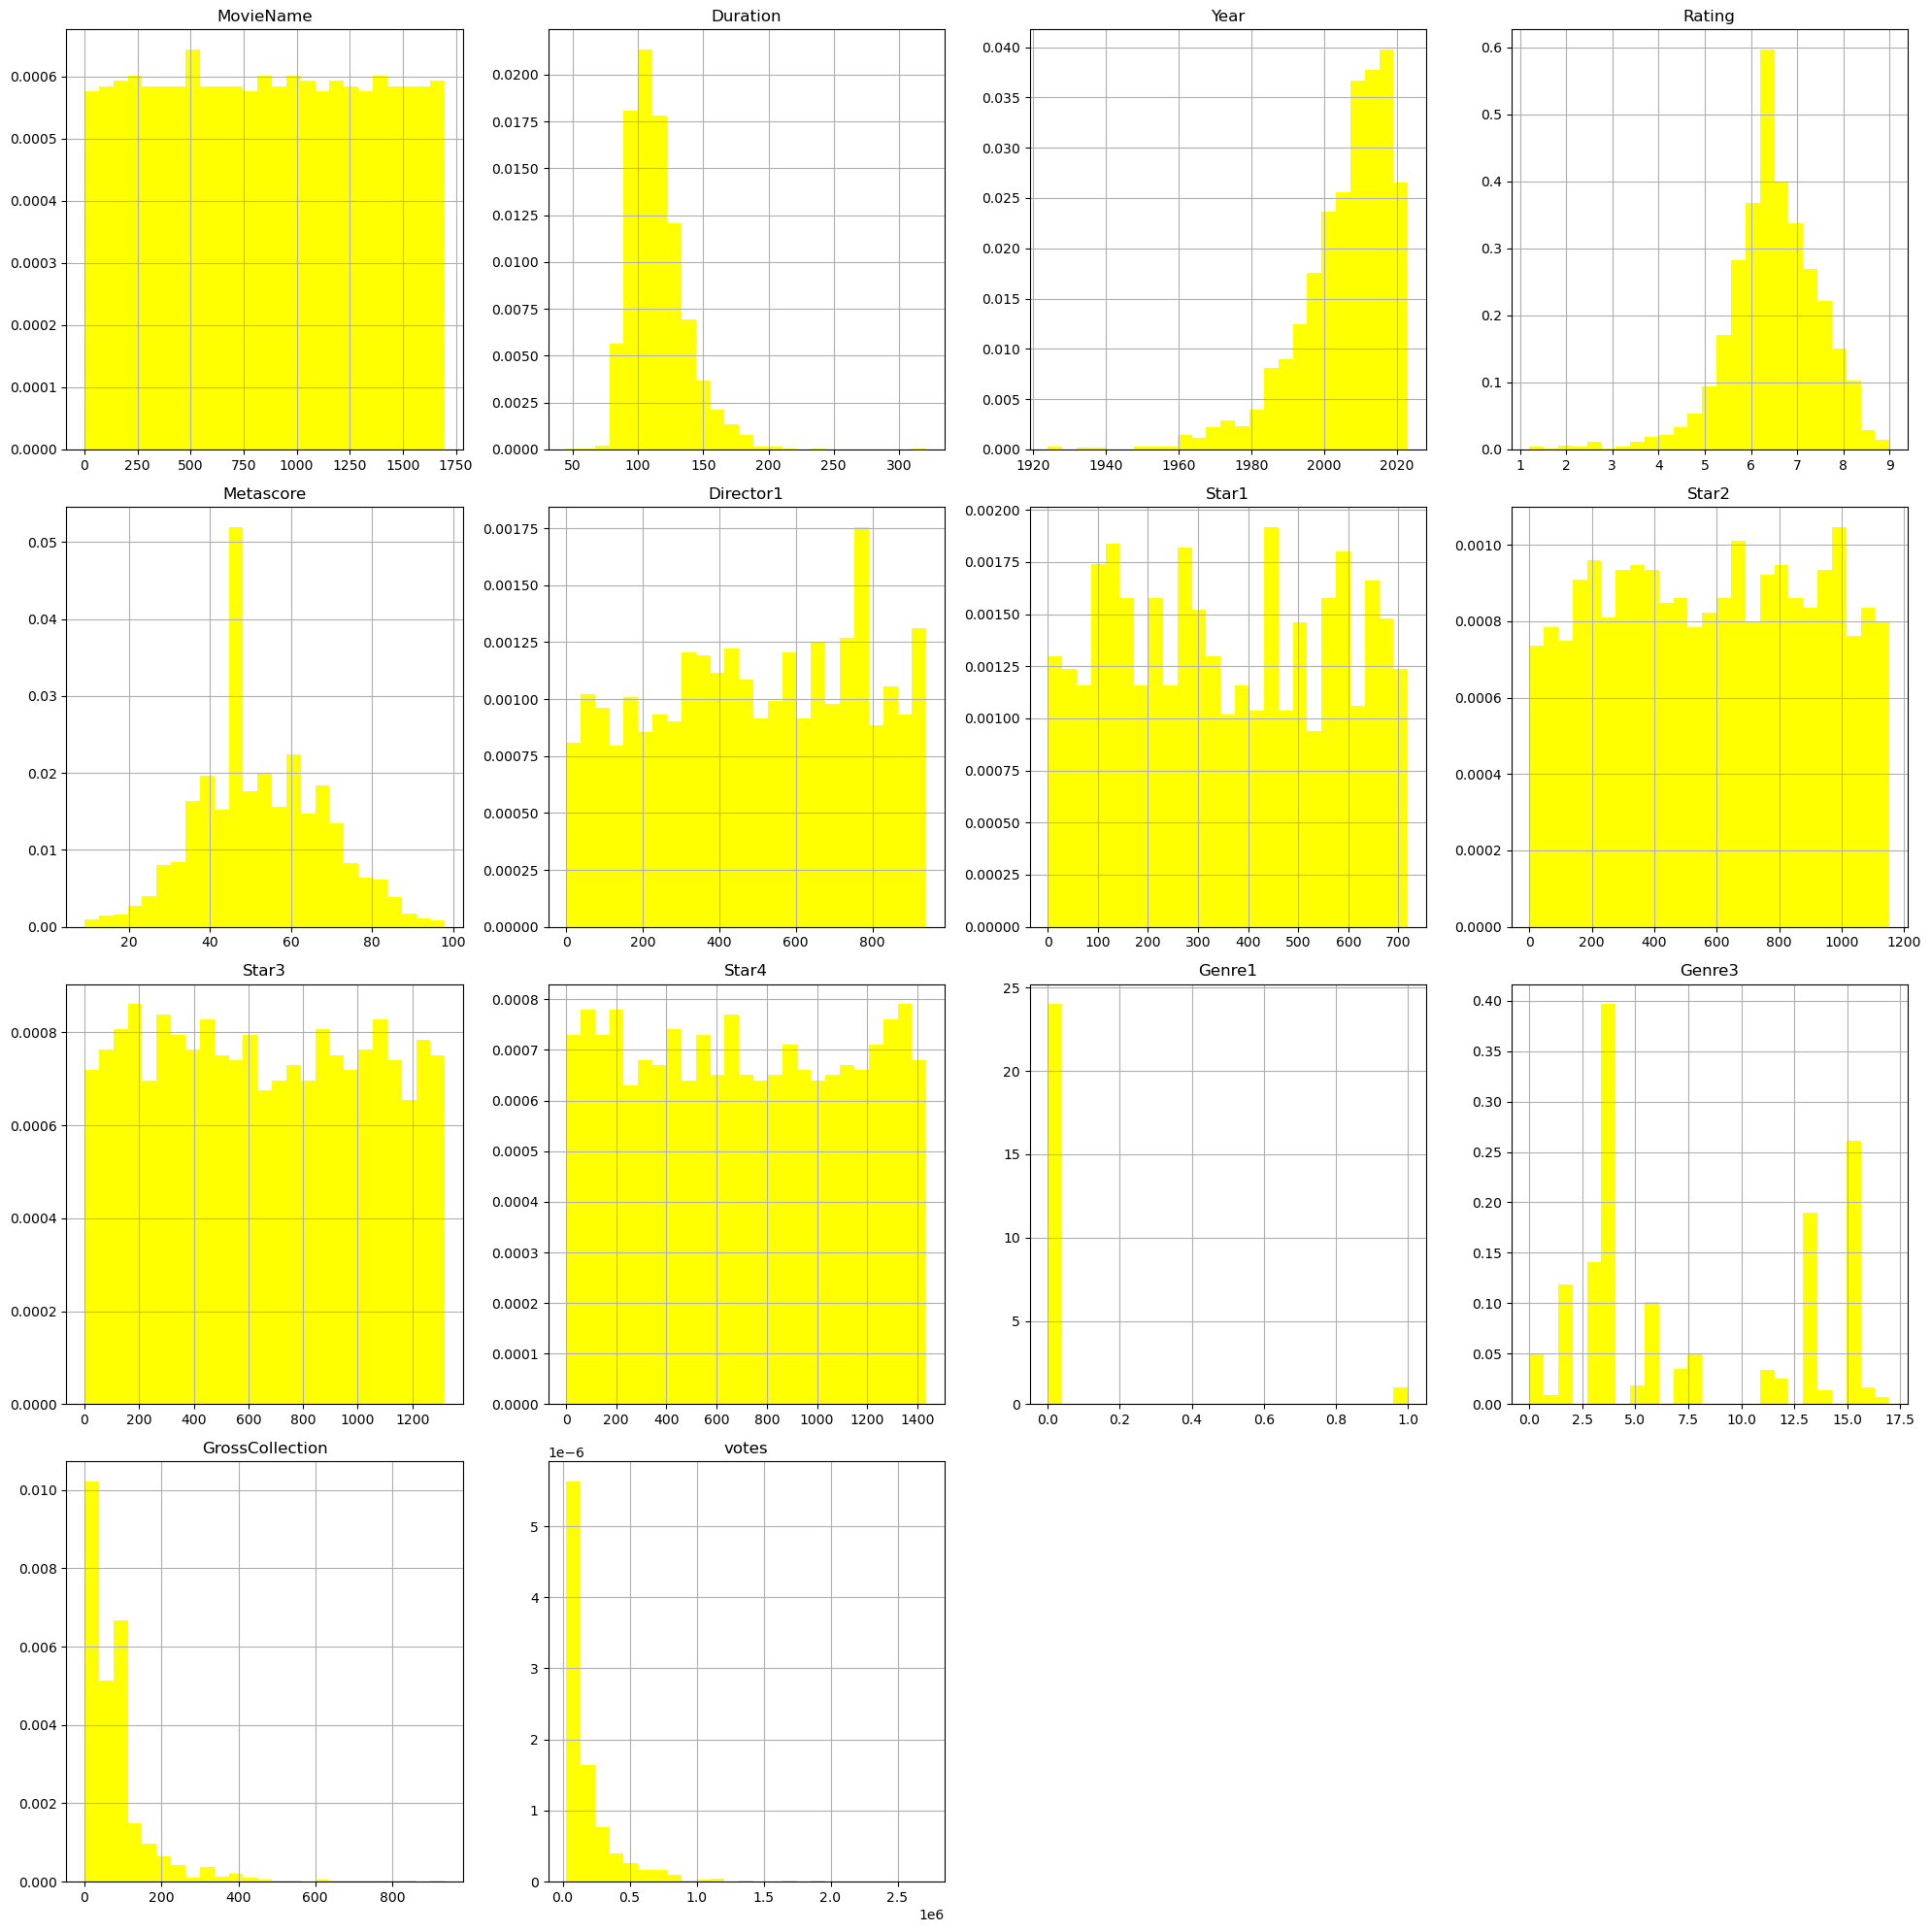

In [107]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
IMDB.hist(bins=25,color='yellow',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

In [108]:
IMDB_new.skew()

MovieName          0.001704
Duration           0.845685
Year              -0.952287
Rating            -0.273003
Metascore          0.172850
Director1         -0.119212
Star1              0.034569
Star2             -0.032700
Star3              0.018378
Star4              0.020678
Genre1             0.000000
Genre3             0.377951
GrossCollection    1.839385
votes              1.983559
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5, except for gross collection and votes as we need to prepare models for them.

In [109]:
from sklearn.preprocessing import power_transform
x_new=power_transform(IMDB_new,method='yeo-johnson')

In [110]:
pd.DataFrame(x_new).skew()

0    -0.291128
1     0.024107
2    -0.382844
3     0.001763
4    -0.002914
5    -0.309747
6    -0.273743
7    -0.285774
8    -0.276810
9    -0.287270
10    0.000000
11    0.010553
12   -0.058894
13    0.064881
dtype: float64

In [111]:
# It will be a 2 dimensional data contaning rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

MovieName  Duration      Year    Rating  Metascore  Director1     Star1  \
0      0.533007  1.998290  1.137439  2.634683  -0.237569   1.361764  1.333784   
1      0.482227  2.516666  1.305993  2.518741  -0.237569  -0.615690 -0.900766   
2      0.047556 -0.697264 -0.295266  2.286858   1.741922   0.596298 -1.194533   
3     -1.591601  1.168889 -1.727972  2.286858   2.219730  -0.495617  1.223020   
4     -0.366803  1.583590  1.053163  2.286858  -0.237569   0.142272  0.004612   
...         ...       ...       ...       ...        ...        ...       ...   
1554  -0.957875 -0.386238 -0.548097 -3.278350  -2.558351  -1.249826 -0.029099   
1555  -0.049940 -1.008289 -0.800927 -3.278350  -2.763126  -0.191682  0.967780   
1556  -1.140681 -0.800939  0.884609 -3.278350  -0.237569  -1.763889  0.987044   
1557  -1.441294 -0.852776 -0.885204 -3.394292  -0.783635  -1.141010  0.707725   
1558   0.598004 -1.319314  0.378948 -3.394292  -0.988410   0.971527 -0.255444   

         Star2     Star3     Star4  Genre1    Genre3     votes  
0     0.842938 -1.475912  1.548682     0.0 -0.779465 -0.224180  
1     0.656720  0.921885  1.362147     0.0  0.611363 -0.602562  
2     1.691601 -0.047214  0.058791     0.0  0.611363  2.790993  
3     0.522399 -1.260557  0.788192     0.0  1.008742  3.653823  
4     0.690301 -1.468034 -0.684958     0.0 -0.978155 -0.752267  
...        ...       ...       ...     ...       ...       ...  
1554 -0.262156  1.730780 -1.345006     0.0 -0.382086 -0.758066  
1555  1.392432 -0.412268  1.175611     0.0 -0.382086 -0.623650  
1556 -0.759754  0.793197  0.800149     0.0 -0.779465 -0.768234  
1557 -1.651156 -1.686015 -1.038897     0.0 -0.779465 -0.788720  
1558 -0.256051 -0.210044  1.096693     0.0 -1.176844 -0.809973  

[1559 rows x 13 columns]

In [112]:
x.mean()

MovieName    6.765310e-17
Duration     4.949359e-16
Year        -5.581488e-15
Rating       1.568413e-15
Metascore    2.352761e-15
Director1    9.578255e-17
Star1        9.015666e-17
Star2       -4.219417e-17
Star3        9.795457e-17
Star4        1.118057e-16
Genre1       0.000000e+00
Genre3       6.779553e-17
votes        2.344358e-16
dtype: float64

In [113]:
x.std()

MovieName    1.000321
Duration     1.000321
Year         1.000321
Rating       1.000321
Metascore    1.000321
Director1    1.000321
Star1        1.000321
Star2        1.000321
Star3        1.000321
Star4        1.000321
Genre1       0.000000
Genre3       1.000321
votes        1.000321
dtype: float64

In [114]:
x.std()

MovieName    1.000321
Duration     1.000321
Year         1.000321
Rating       1.000321
Metascore    1.000321
Director1    1.000321
Star1        1.000321
Star2        1.000321
Star3        1.000321
Star4        1.000321
Genre1       0.000000
Genre3       1.000321
votes        1.000321
dtype: float64

In [115]:
y.value_counts()

77.293399     246
0.030000        7
0.010000        7
0.040000        5
0.100000        4
             ... 
73.120000       1
35.100000       1
56.850000       1
102.080000      1
38.540000       1
Name: GrossCollection, Length: 1220, dtype: int64

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [116]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [117]:
vif_cal()

    VIF FACTOR   FEATURES
0     1.006298  MovieName
1     1.255945   Duration
2     1.101473       Year
3     2.025218     Rating
4     1.753550  Metascore
5     1.017927  Director1
6     1.007565      Star1
7     1.010473      Star2
8     1.004251      Star3
9     1.009949      Star4
10         NaN     Genre1
11    1.045868     Genre3
12    1.263935      votes


In [120]:
IMDB.drop(['Genre1'])

KeyError: "['Genre1'] not found in axis"

Model Training and Testing

Now Lets Train and Test the model using Regression Models

In [121]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,1559):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.597037689136172 on Random_State 765


In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=765)

In [123]:
x_train

MovieName  Duration      Year    Rating  Metascore  Director1     Star1  \
145    1.258136 -0.697264  0.378948  1.359323   1.468889  -0.762029 -0.525131   
451    0.992052  1.272564 -0.042436  0.547730   0.103723  -1.696348  0.086481   
1412   1.233762 -0.386238  0.968886 -1.307339  -0.237569   1.189159 -1.353456   
738   -1.607851  0.495001 -0.800927  0.083963   0.649789   1.646938 -0.611816   
83     0.490352  1.479915  0.463225  1.591207   2.014955   1.087847 -1.045242   
...         ...       ...       ...       ...        ...        ...       ...   
977   -0.232746 -0.334401 -1.390865 -0.263862  -0.715377   1.204168 -0.313234   
1307   1.694838 -0.075213  0.126118 -0.959513   0.171981  -1.024689 -1.690565   
558   -0.896940  0.028462  0.547502  0.315847  -0.169310   0.442454  1.338600   
516   -1.010686 -0.489913 -0.379543  0.431788  -0.237569   0.498739  1.160414   
1053   0.565505  1.013376 -0.716650 -0.379804  -1.124927  -1.557514 -0.895951   

         Star2     Star3     Star4  Genre1    Genre3     votes  
145  -1.635892  0.932390 -0.921714     0.0  1.406121  0.349281  
451  -1.504624  1.234412  0.434253     0.0 -0.779465 -0.376918  
1412  1.499278 -0.451662  0.006179     0.0  0.015294 -0.107838  
738  -0.671224 -0.603986  1.632383     0.0  1.406121  0.301647  
83   -0.332369  0.625114 -0.096655     0.0  1.406121  3.510639  
...        ...       ...       ...     ...       ...       ...  
977  -0.561325 -0.950656  0.230978     0.0 -0.779465 -0.740397  
1307 -0.121730 -0.772068  0.649486     0.0 -0.779465  0.333466  
558  -1.522941 -1.722783  1.589337     0.0 -0.779465  0.599463  
516   0.122490 -0.782574  0.202280     0.0  1.406121 -0.582423  
1053  1.258111  1.160876  0.816890     0.0  1.008742 -0.289153  

[1091 rows x 13 columns]

In [124]:
x_test

MovieName  Duration      Year    Rating  Metascore  Director1     Star1  \
174   -0.153530  1.220727 -0.295266  1.243381   2.014955   0.720123  1.015939   
22     1.178920  1.065214  0.800332  2.054974  -0.237569  -1.715110 -1.276402   
835    0.008964 -0.023375 -0.210989 -0.031979   0.445014   1.481837  0.149087   
850   -0.726321 -0.386238  0.884609 -0.147921   0.035465   1.050325  1.126703   
1197   1.715150  0.495001 -0.379543 -0.727630  -0.237569   0.915242  1.579392   
...         ...       ...       ...       ...        ...        ...       ...   
1285  -1.282863 -1.163802  0.463225 -0.843572  -0.237569   1.598158  1.338600   
1180  -1.676911  0.546838 -0.463820 -0.611688  -2.080543  -1.032194  0.173166   
1038  -0.657261 -1.371152  0.547502 -0.379804  -1.944026   1.515608 -0.265075   
1024   1.566874 -0.334401 -0.716650 -0.379804  -0.647118  -0.285489 -0.399919   
557    1.111891  0.806026 -1.643695  0.315847   0.513273  -0.255471  1.434917   

         Star2     Star3     Star4  Genre1    Genre3     votes  
174   0.867360 -1.365609 -0.424287     0.0 -0.779465  0.466135  
22    1.520648 -1.678136  0.587308     0.0  1.604811 -0.289128  
835   1.587808  0.338850  1.555856     0.0  0.015294 -0.634184  
850   0.900940  1.386737 -0.077523     0.0 -0.779465  0.415660  
1197 -1.498519  0.375618  1.168437     0.0  1.406121  0.177512  
...        ...       ...       ...     ...       ...       ...  
1285 -0.347633 -1.163385  1.366929     0.0  1.406121 -0.656570  
1180  0.107226 -1.081970 -1.211083     0.0 -0.978155 -0.677943  
1038 -0.662066  0.829965 -0.768660     0.0  0.015294  0.356460  
1024 -1.080292  1.276433  1.455414     0.0  1.406121 -0.591616  
557   0.436923 -0.275701 -0.230577     0.0  1.406121 -0.334362  

[468 rows x 13 columns]

In [125]:
y_train

222       4.110000
576      55.010000
1578     51.020000
878     172.960000
142     304.360000
           ...    
1130     24.080000
1472    100.020000
690      25.130000
646      77.293399
1212     37.020000
Name: GrossCollection, Length: 1091, dtype: float64

In [126]:
y_test

256      93.930000
54       77.293399
980       1.490000
996      40.560000
1360    142.110000
           ...    
1448      9.480000
1343     15.740000
1197     55.700000
1183     20.240000
689      51.190000
Name: GrossCollection, Length: 468, dtype: float64

REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [128]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),ExtraTreesRegressor()]

In [129]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    #plt.figure(figsize=(8,8))
    sns.regplot(x=y_test,y= predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2-crossval))
    print('---------------------------------------------------------------------------------------------------------')

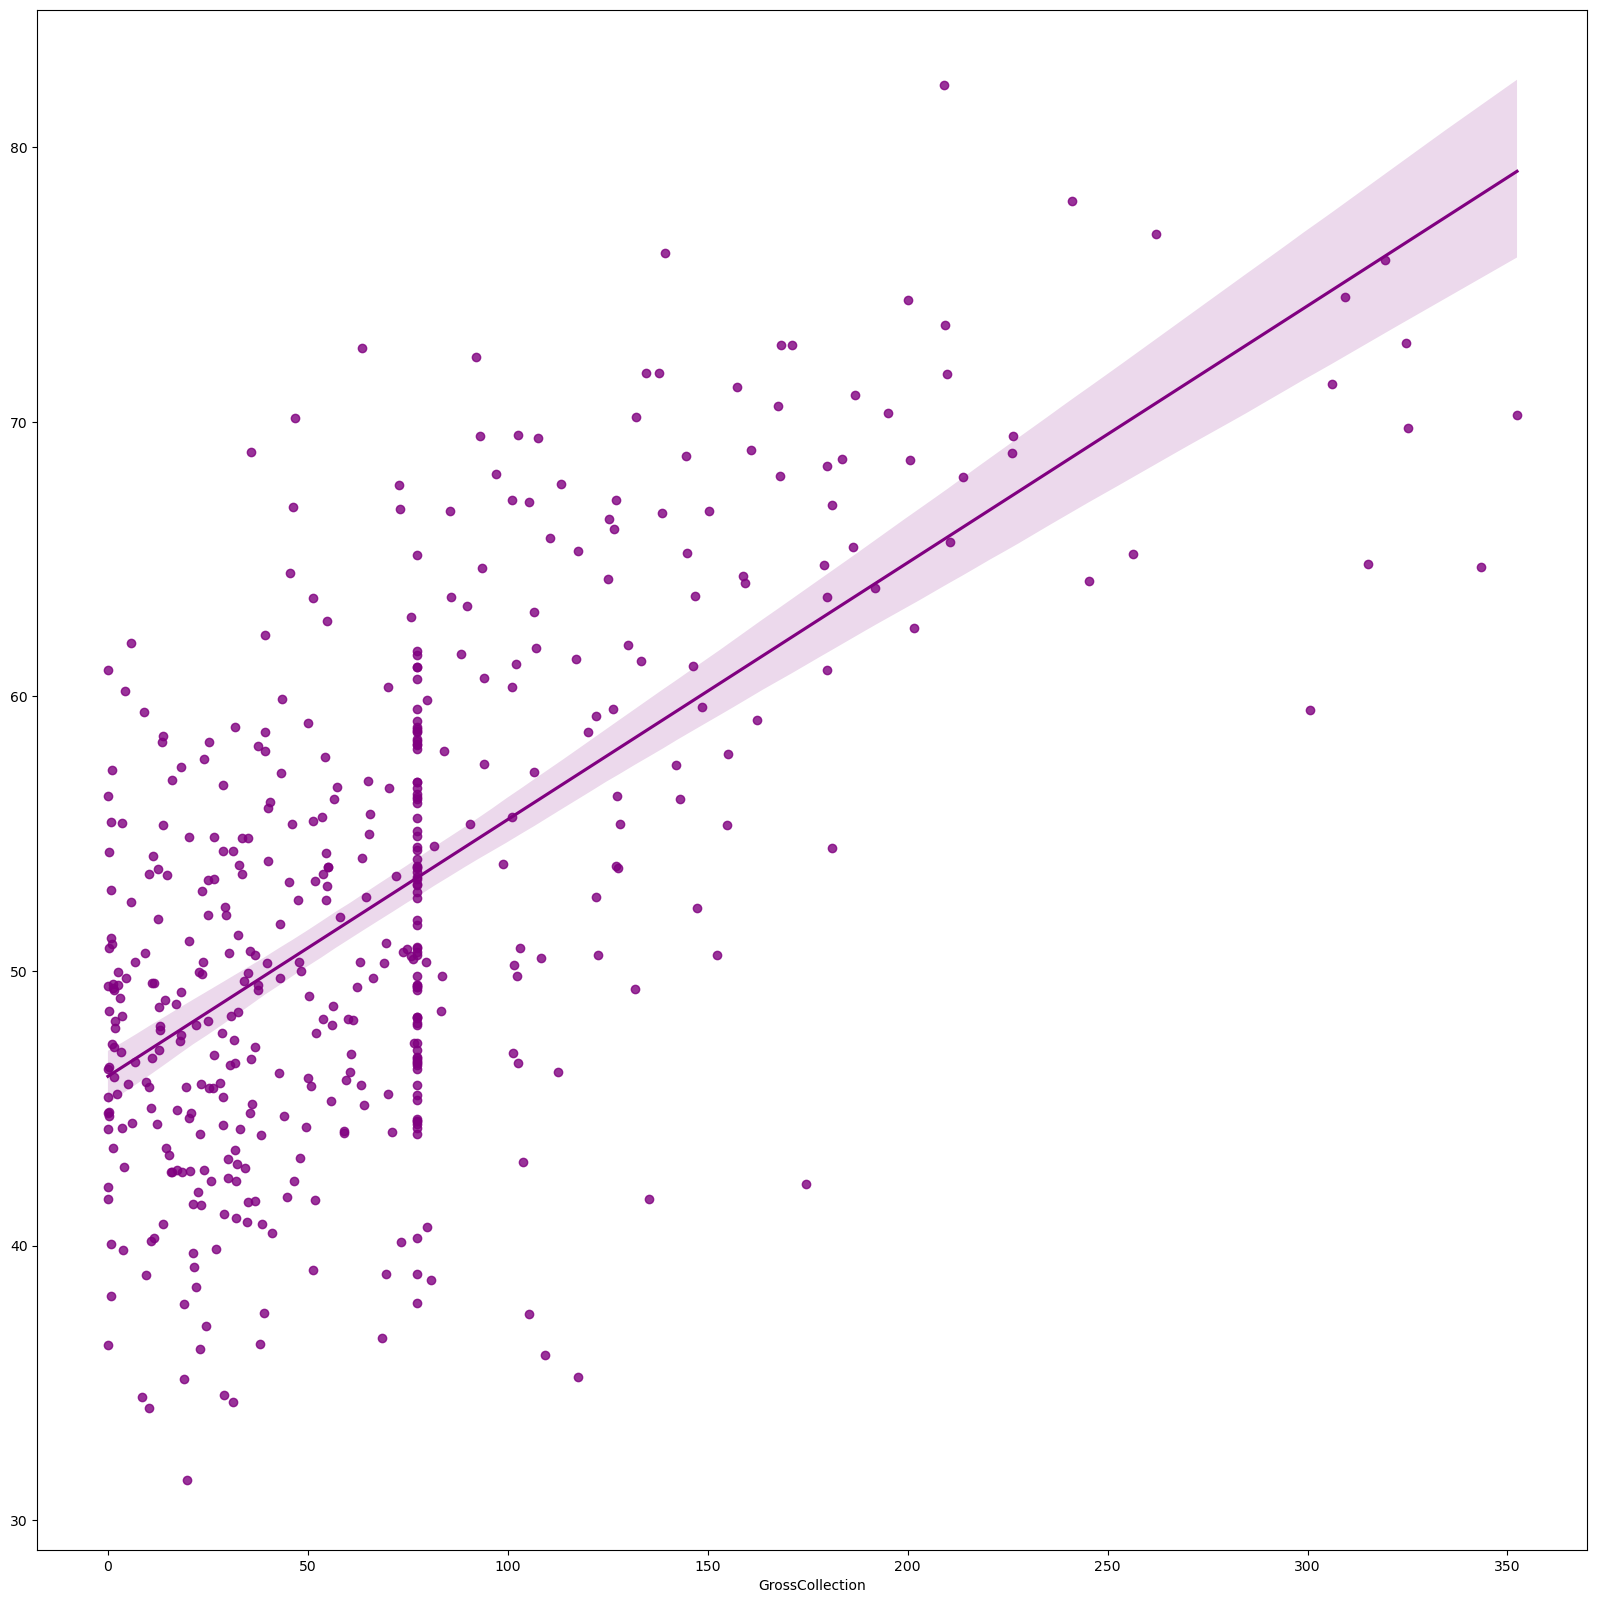

SVR()
Mean absolute error 41.468519484883835
Mean squared error 3650.631339544794
Root Mean squared error 60.42045464530033
R2 Score 0.0885712040787
At random state SVR(),the training accuracy is :- 0.1157887843956178
At random state SVR(),the testing accuracy is :- 0.0885712040787
Cross Validation Score: 0.09892953258573951
Difference Between r2_score and CrossValidation Score: 0.010358328507039508
---------------------------------------------------------------------------------------------------------


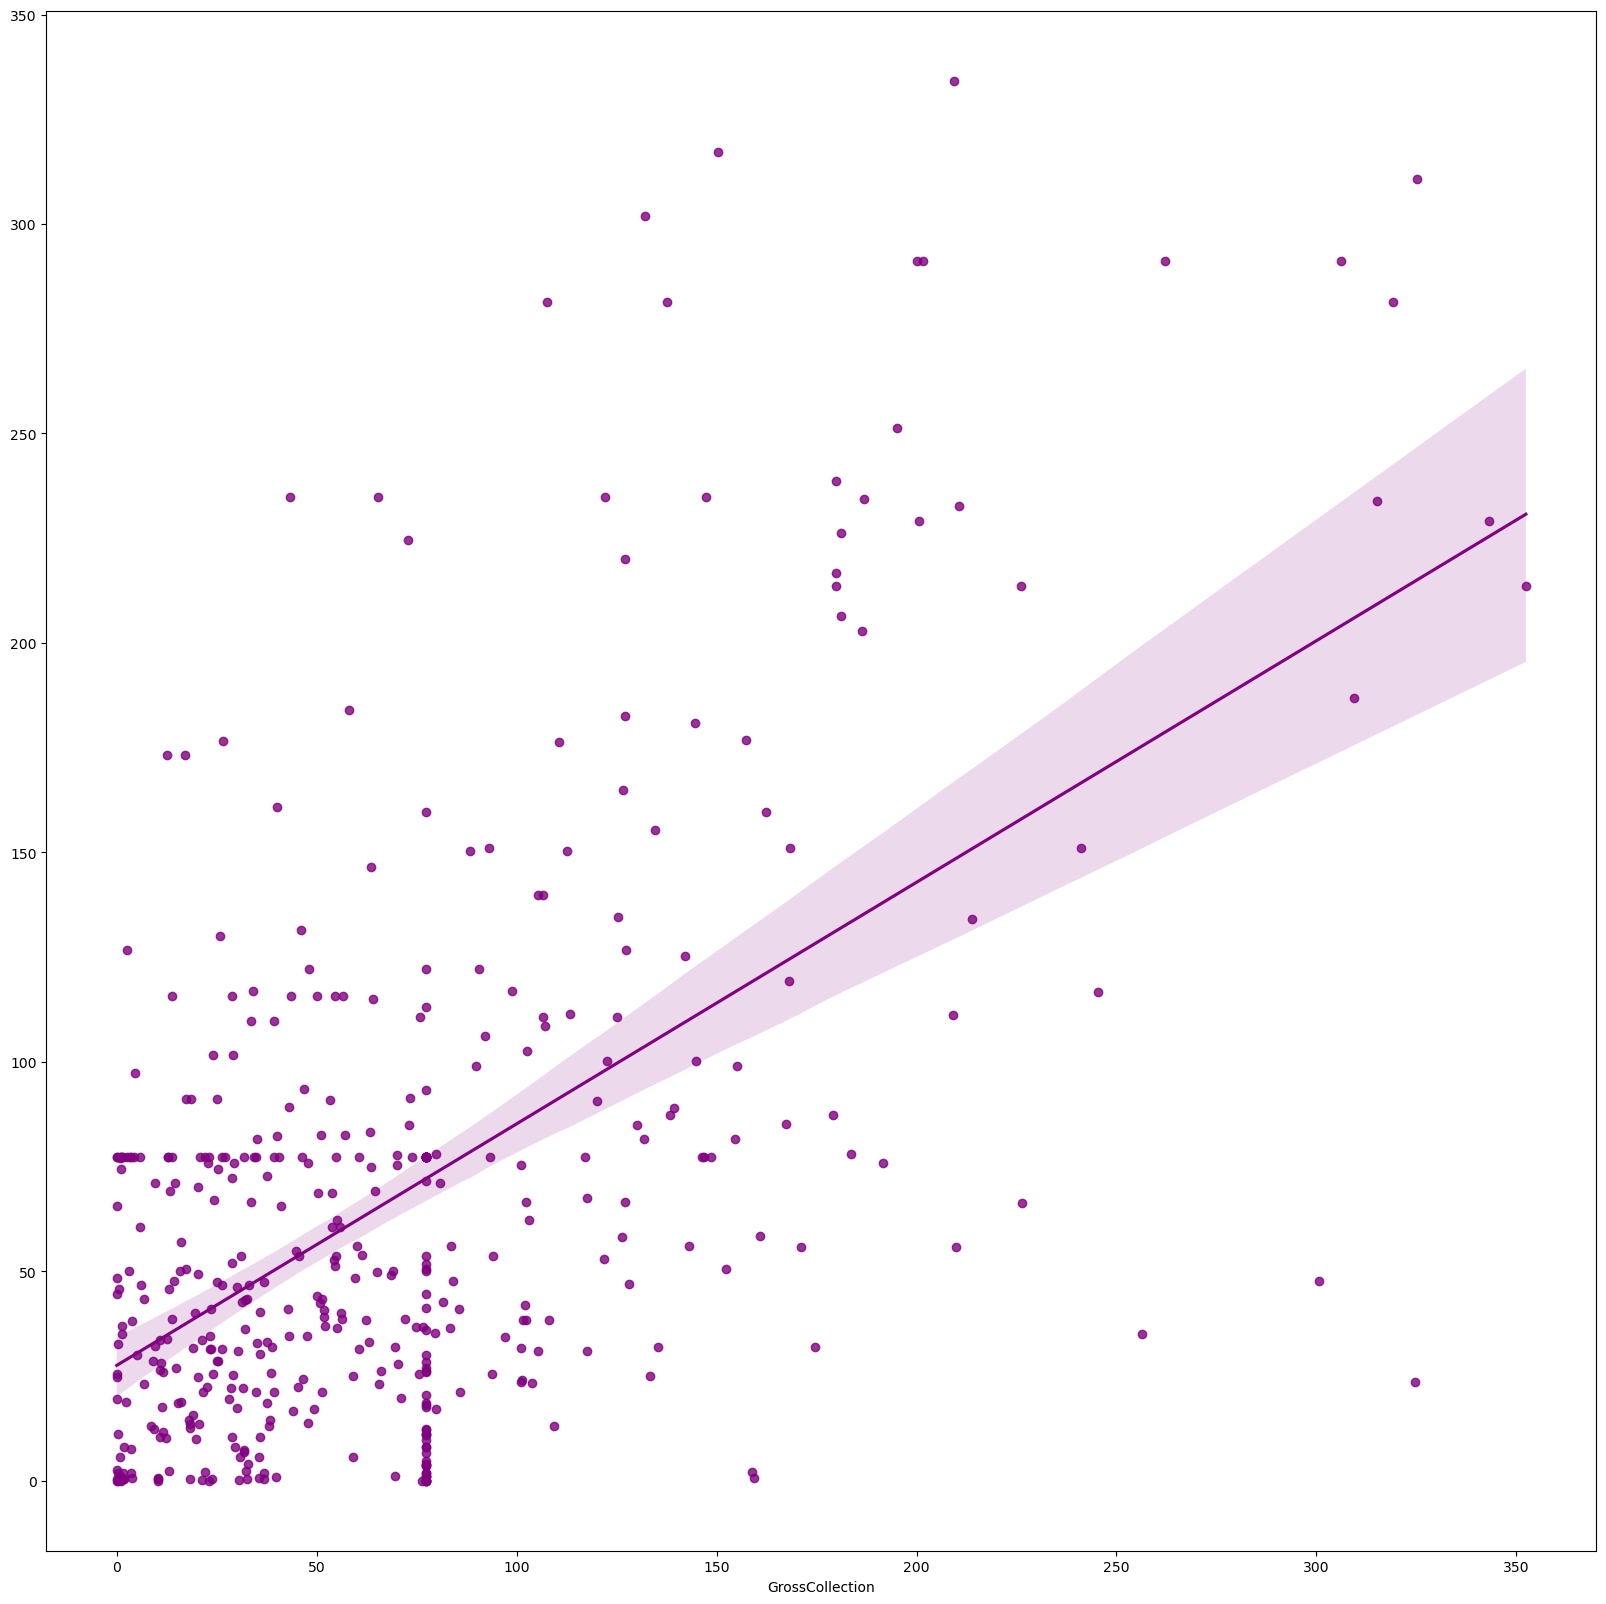

DecisionTreeRegressor()
Mean absolute error 42.24483750203778
Mean squared error 3502.216130496505
Root Mean squared error 59.17952458829409
R2 Score 0.12562504016836595
At random state DecisionTreeRegressor(),the training accuracy is :- 1.0
At random state DecisionTreeRegressor(),the testing accuracy is :- 0.12562504016836595
Cross Validation Score: -0.09998872851265583
Difference Between r2_score and CrossValidation Score: 0.2256137686810218
---------------------------------------------------------------------------------------------------------


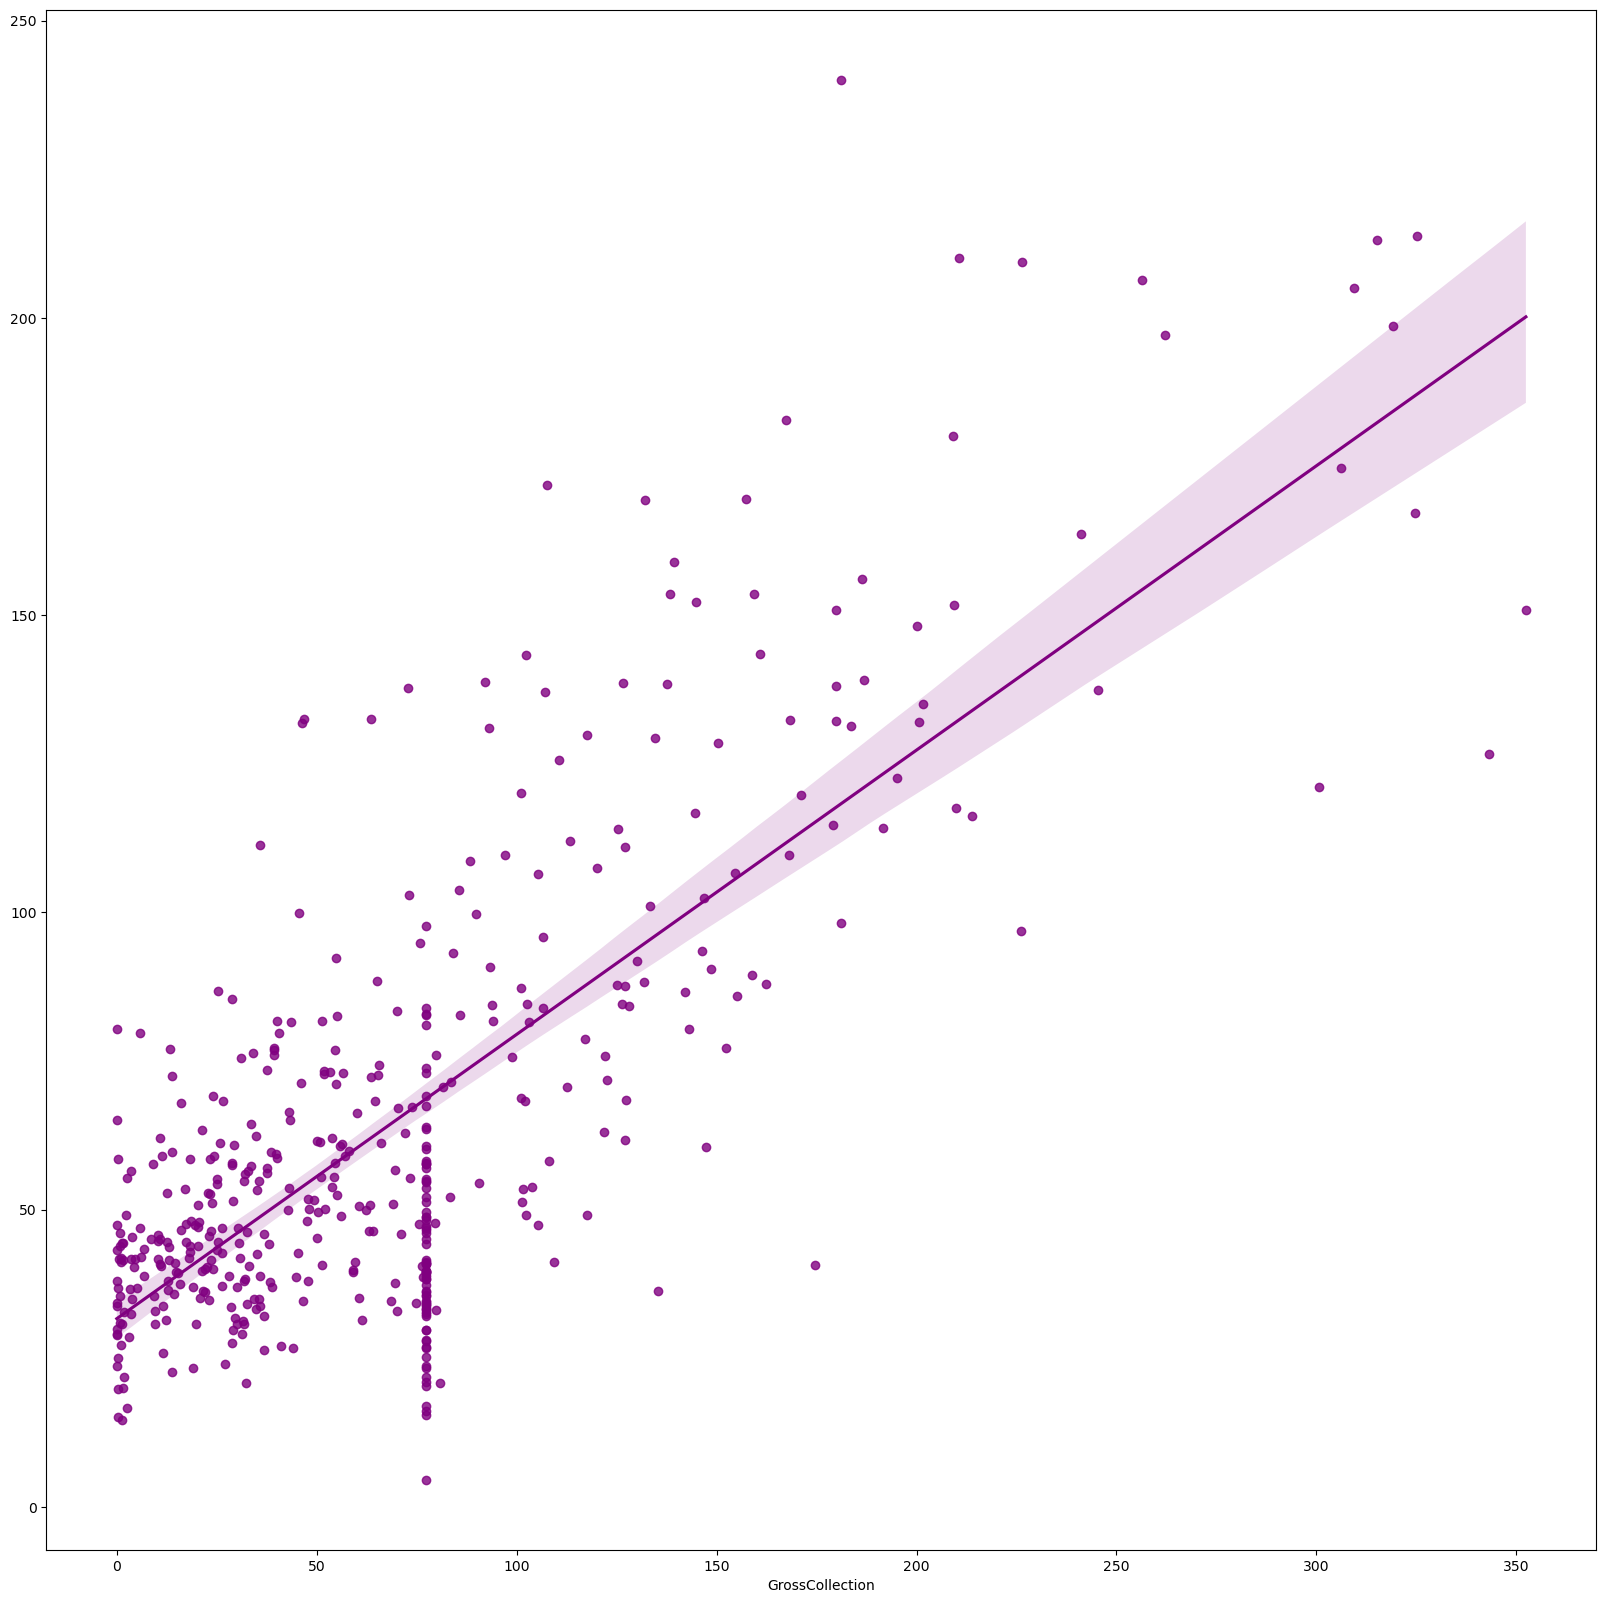

LinearRegression()
Mean absolute error 32.53617705970539
Mean squared error 1784.7909822934655
Root Mean squared error 42.246786650507104
R2 Score 0.5544031306744421
At random state LinearRegression(),the training accuracy is :- 0.4072041899830836
At random state LinearRegression(),the testing accuracy is :- 0.5544031306744421
Cross Validation Score: 0.2842324531379198
Difference Between r2_score and CrossValidation Score: 0.27017067753652235
---------------------------------------------------------------------------------------------------------


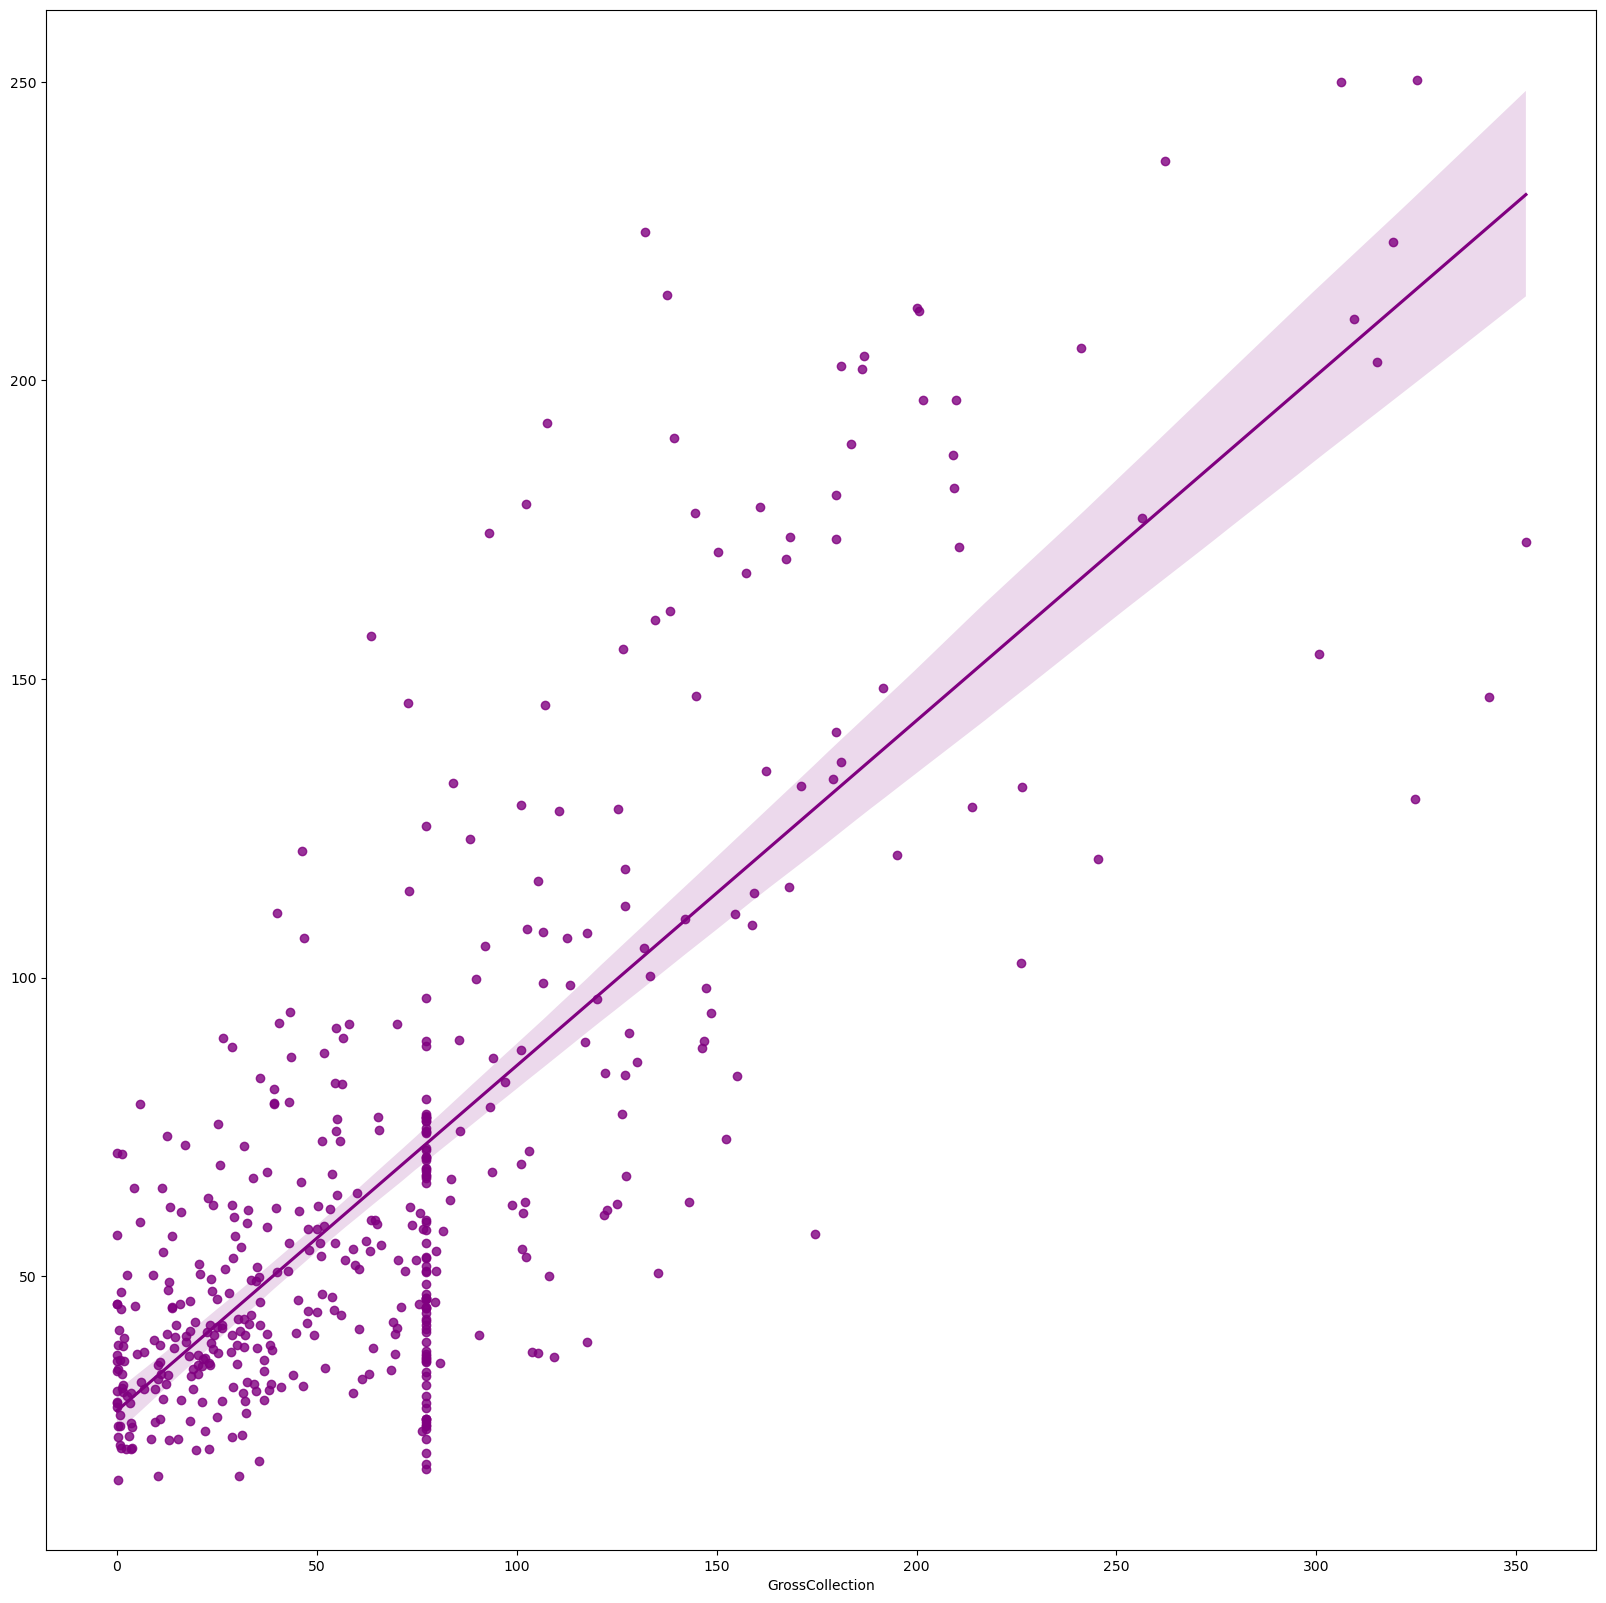

RandomForestRegressor()
Mean absolute error 29.515472162399
Mean squared error 1549.5579826537044
Root Mean squared error 39.364425343877485
R2 Score 0.6131321859203649
At random state RandomForestRegressor(),the training accuracy is :- 0.9273306077796006
At random state RandomForestRegressor(),the testing accuracy is :- 0.6131321859203649
Cross Validation Score: 0.432037923069099
Difference Between r2_score and CrossValidation Score: 0.1810942628512659
---------------------------------------------------------------------------------------------------------


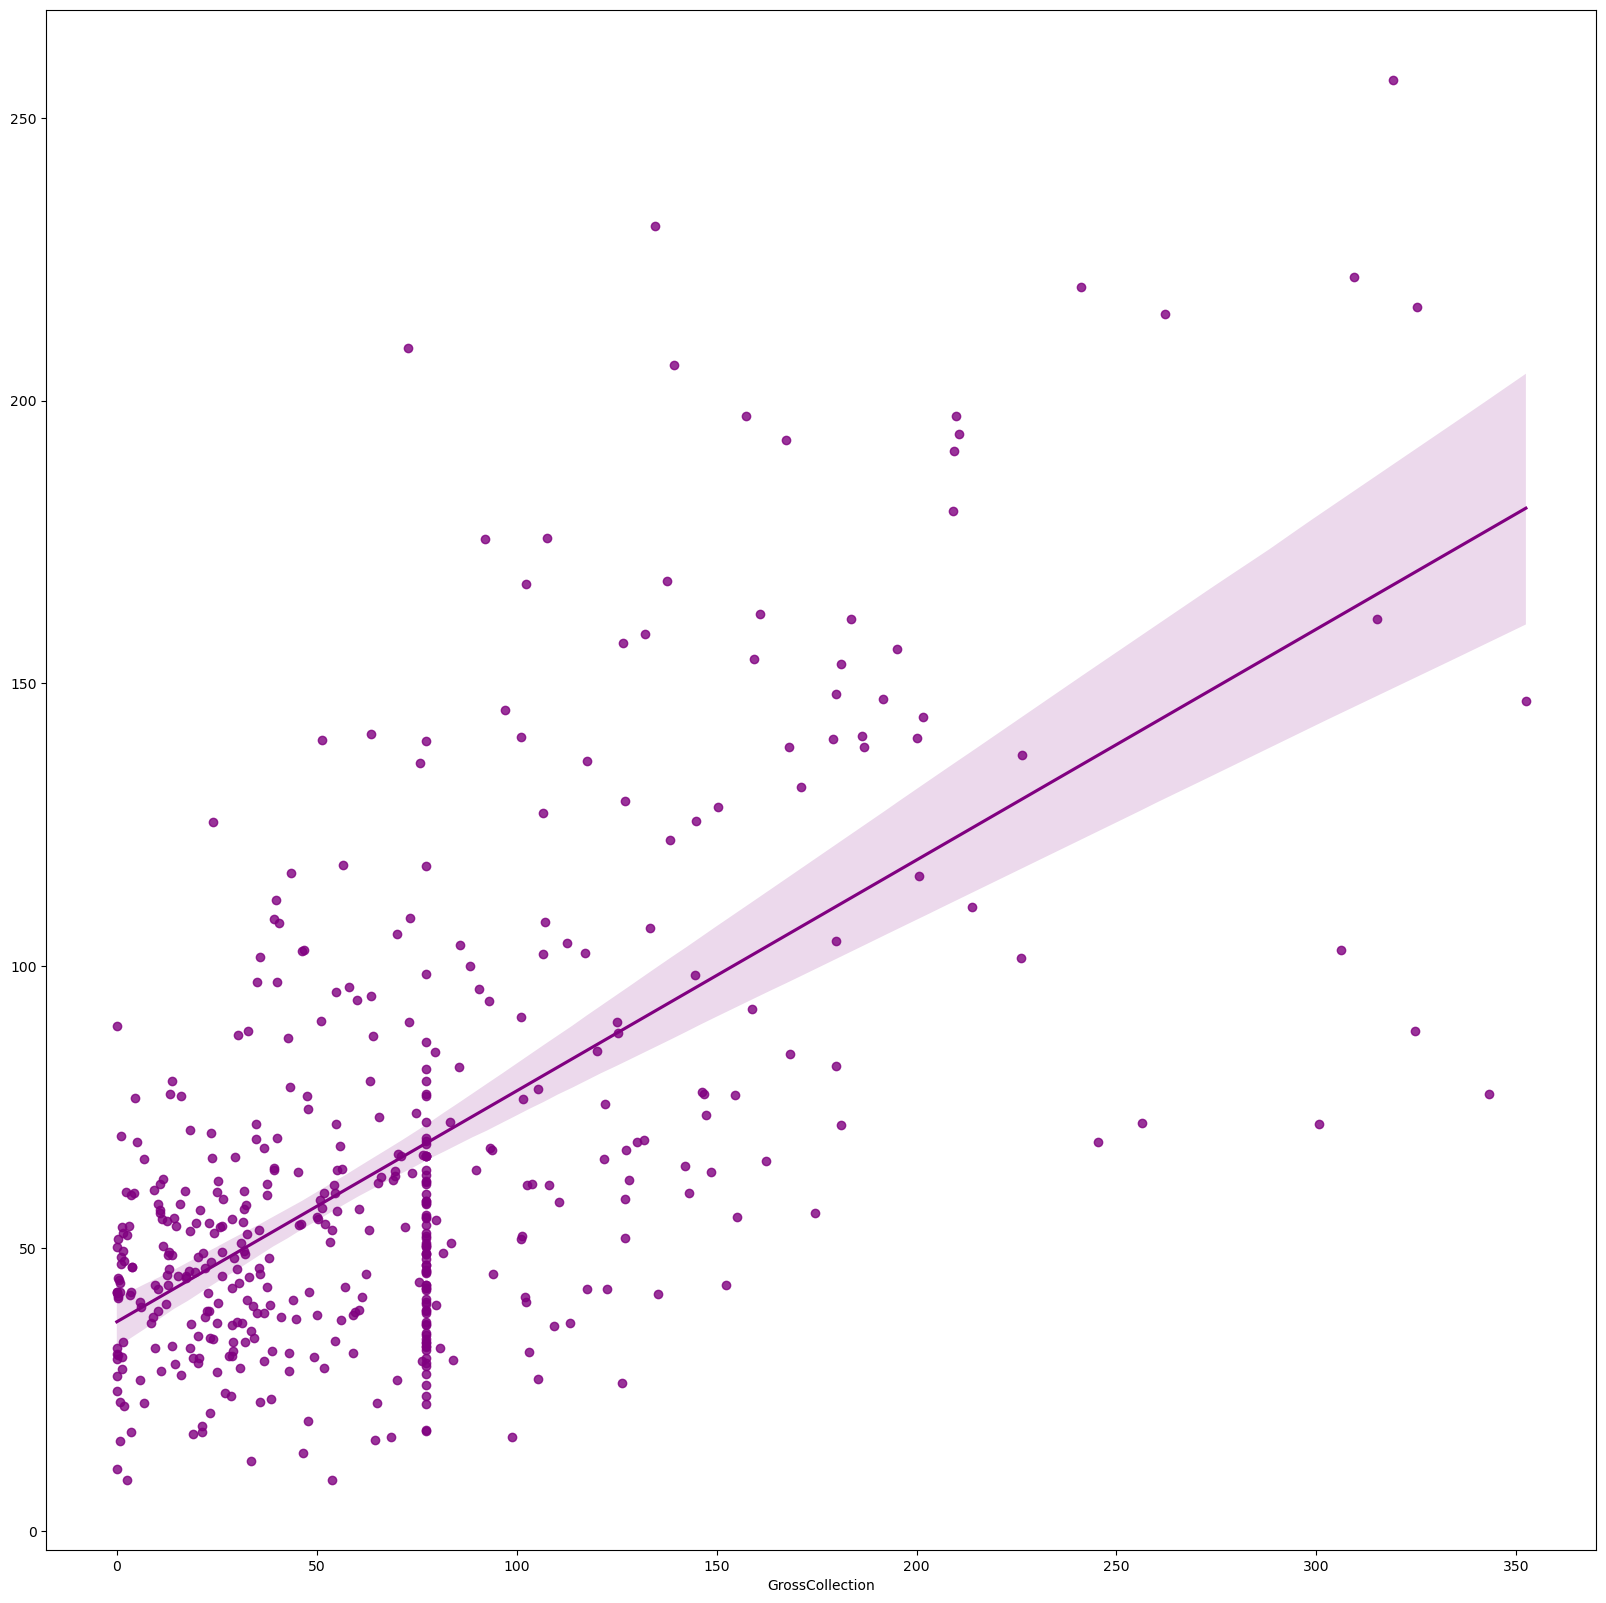

KNeighborsRegressor()
Mean absolute error 36.65414500803467
Mean squared error 2454.9208890895916
Root Mean squared error 49.54715823424782
R2 Score 0.3870962631071997
At random state KNeighborsRegressor(),the training accuracy is :- 0.531837118220411
At random state KNeighborsRegressor(),the testing accuracy is :- 0.3870962631071997
Cross Validation Score: 0.22957304058115185
Difference Between r2_score and CrossValidation Score: 0.15752322252604783
---------------------------------------------------------------------------------------------------------


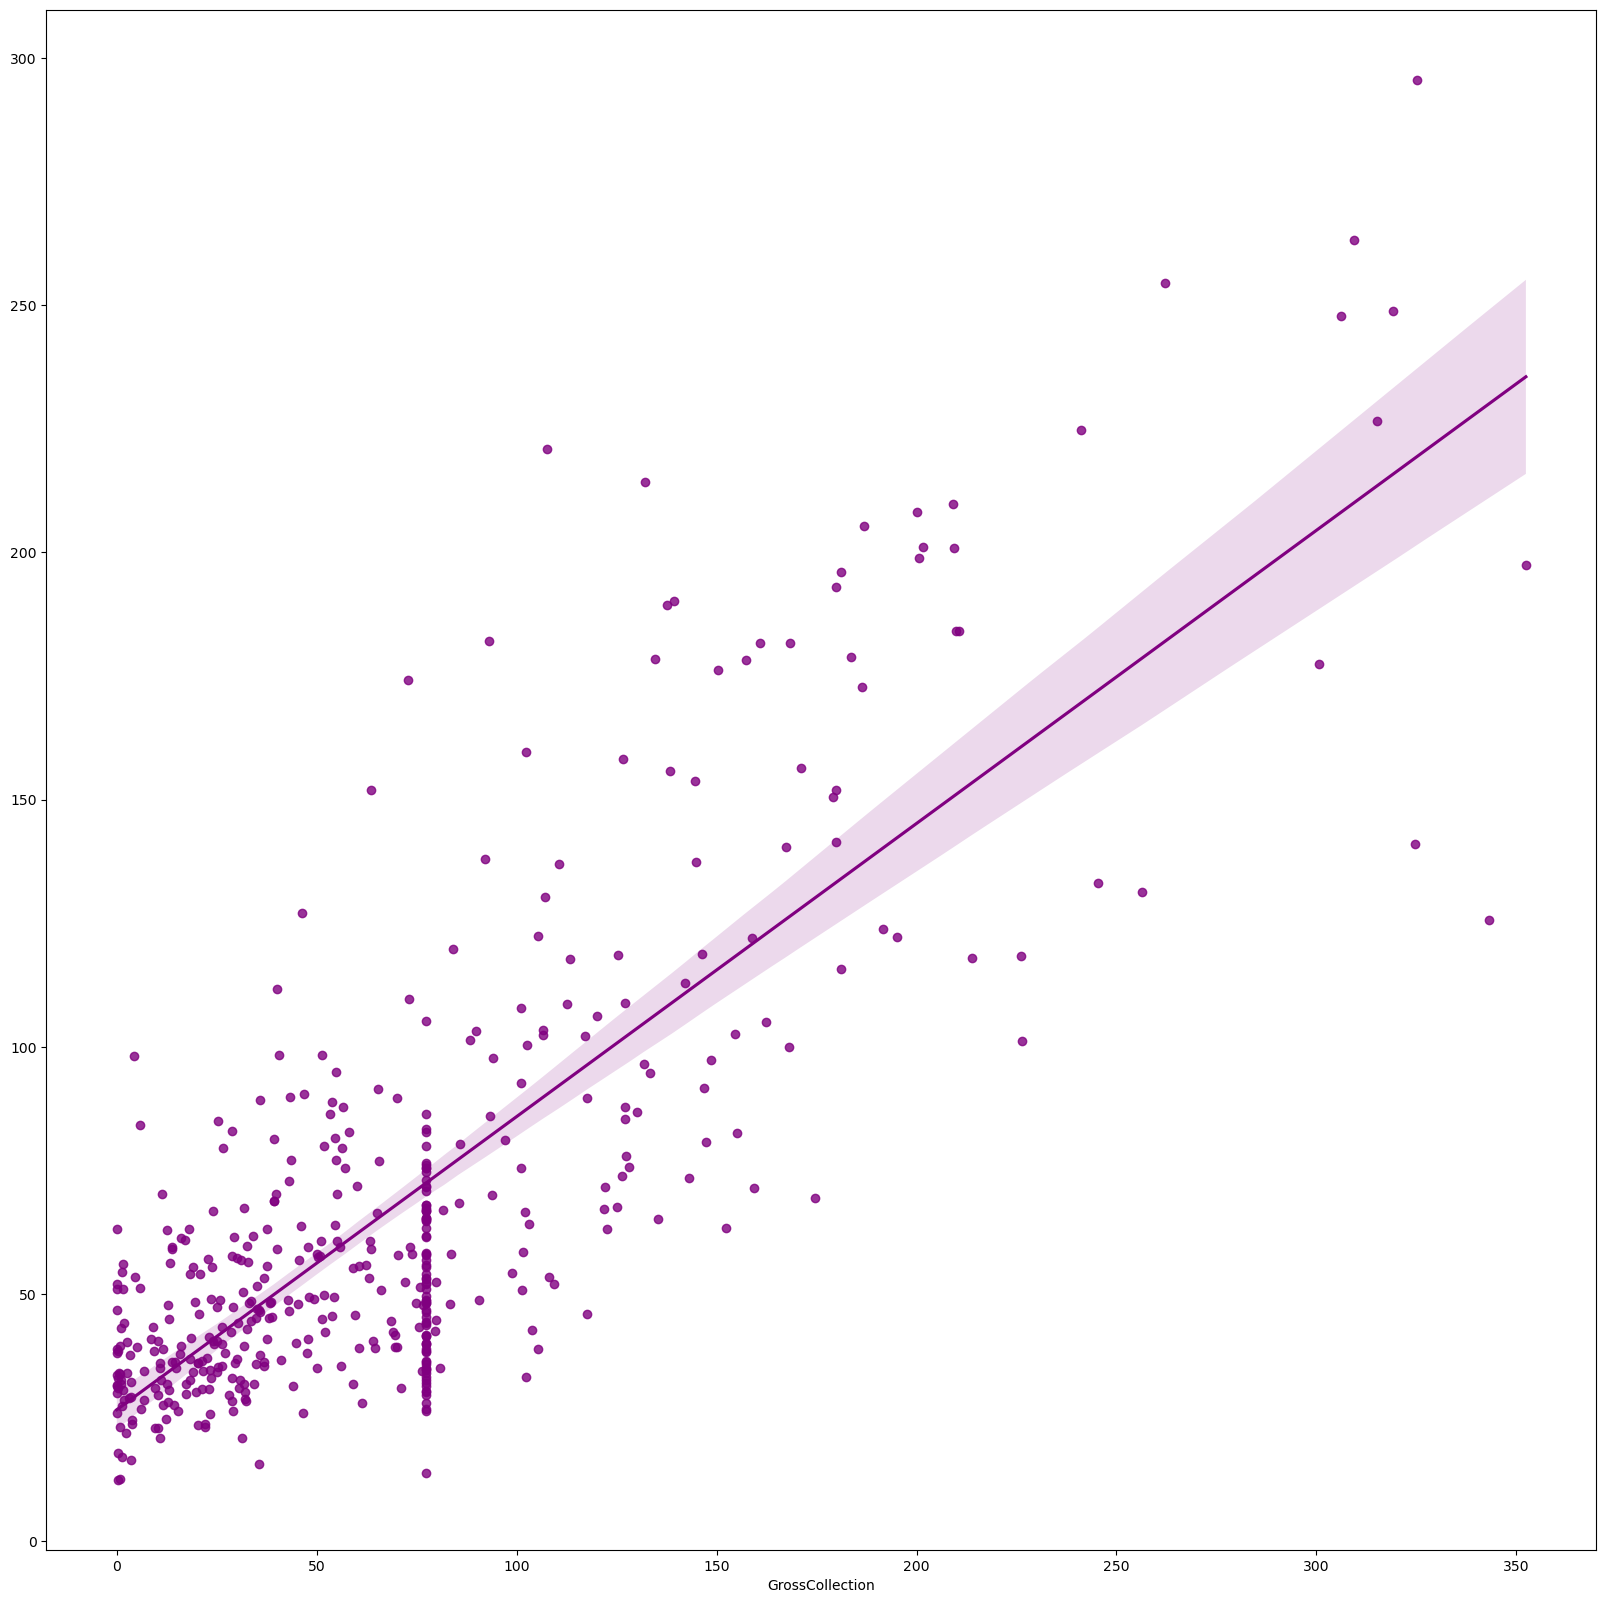

GradientBoostingRegressor()
Mean absolute error 29.134465828947622
Mean squared error 1501.7940339240347
Root Mean squared error 38.75298741934658
R2 Score 0.6250570926639086
At random state GradientBoostingRegressor(),the training accuracy is :- 0.7813451642699025
At random state GradientBoostingRegressor(),the testing accuracy is :- 0.6250570926639086
Cross Validation Score: 0.4531539927937992
Difference Between r2_score and CrossValidation Score: 0.17190309987010943
---------------------------------------------------------------------------------------------------------


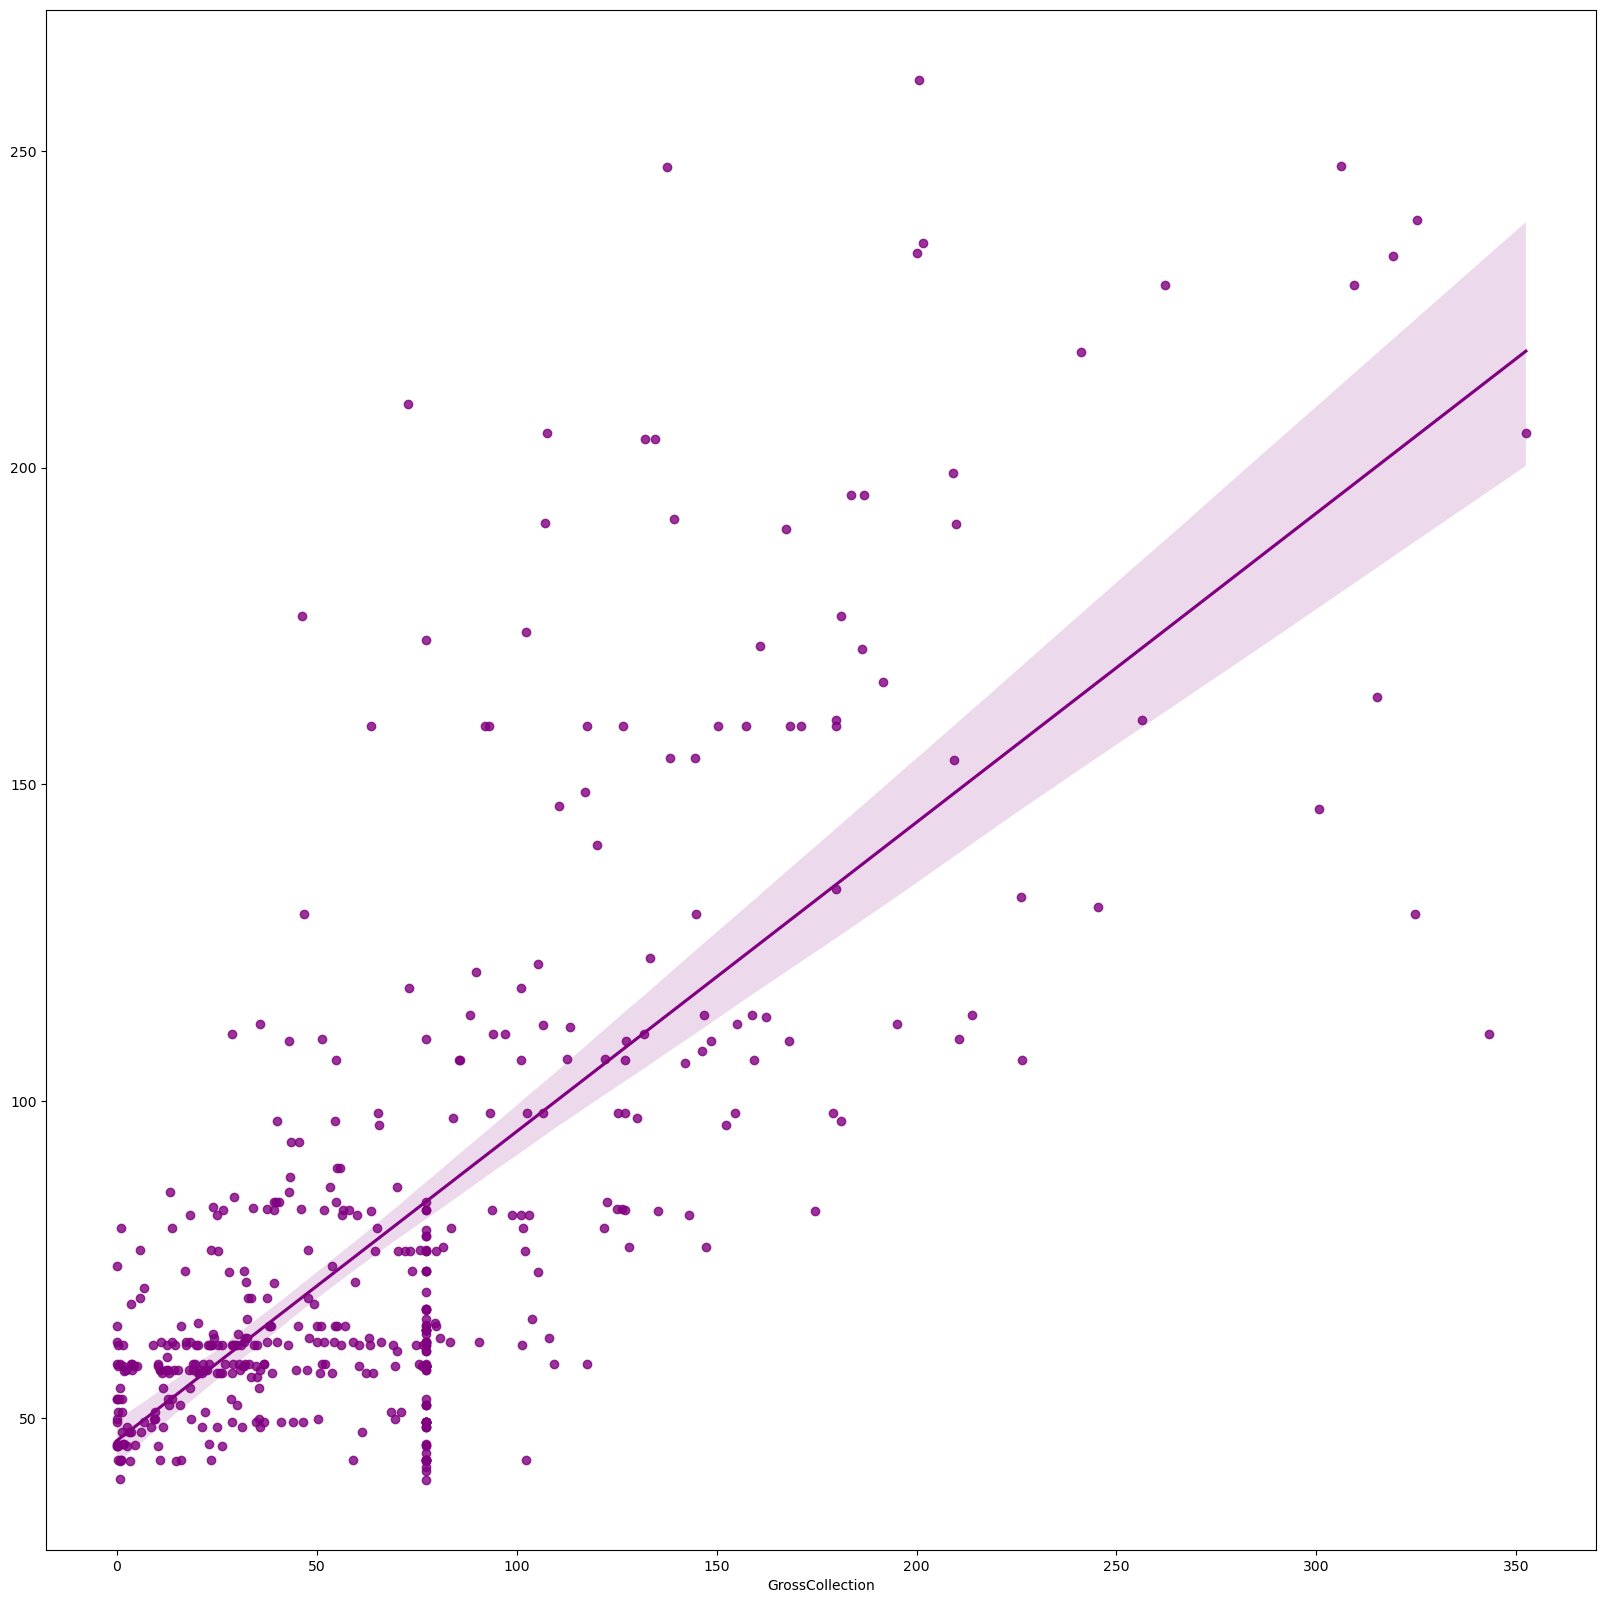

AdaBoostRegressor()
Mean absolute error 35.23374563765667
Mean squared error 1966.6204834059606
Root Mean squared error 44.346594947142904
R2 Score 0.5090069709837195
At random state AdaBoostRegressor(),the training accuracy is :- 0.5432658861252211
At random state AdaBoostRegressor(),the testing accuracy is :- 0.5090069709837195
Cross Validation Score: 0.35092859758992895
Difference Between r2_score and CrossValidation Score: 0.15807837339379055
---------------------------------------------------------------------------------------------------------


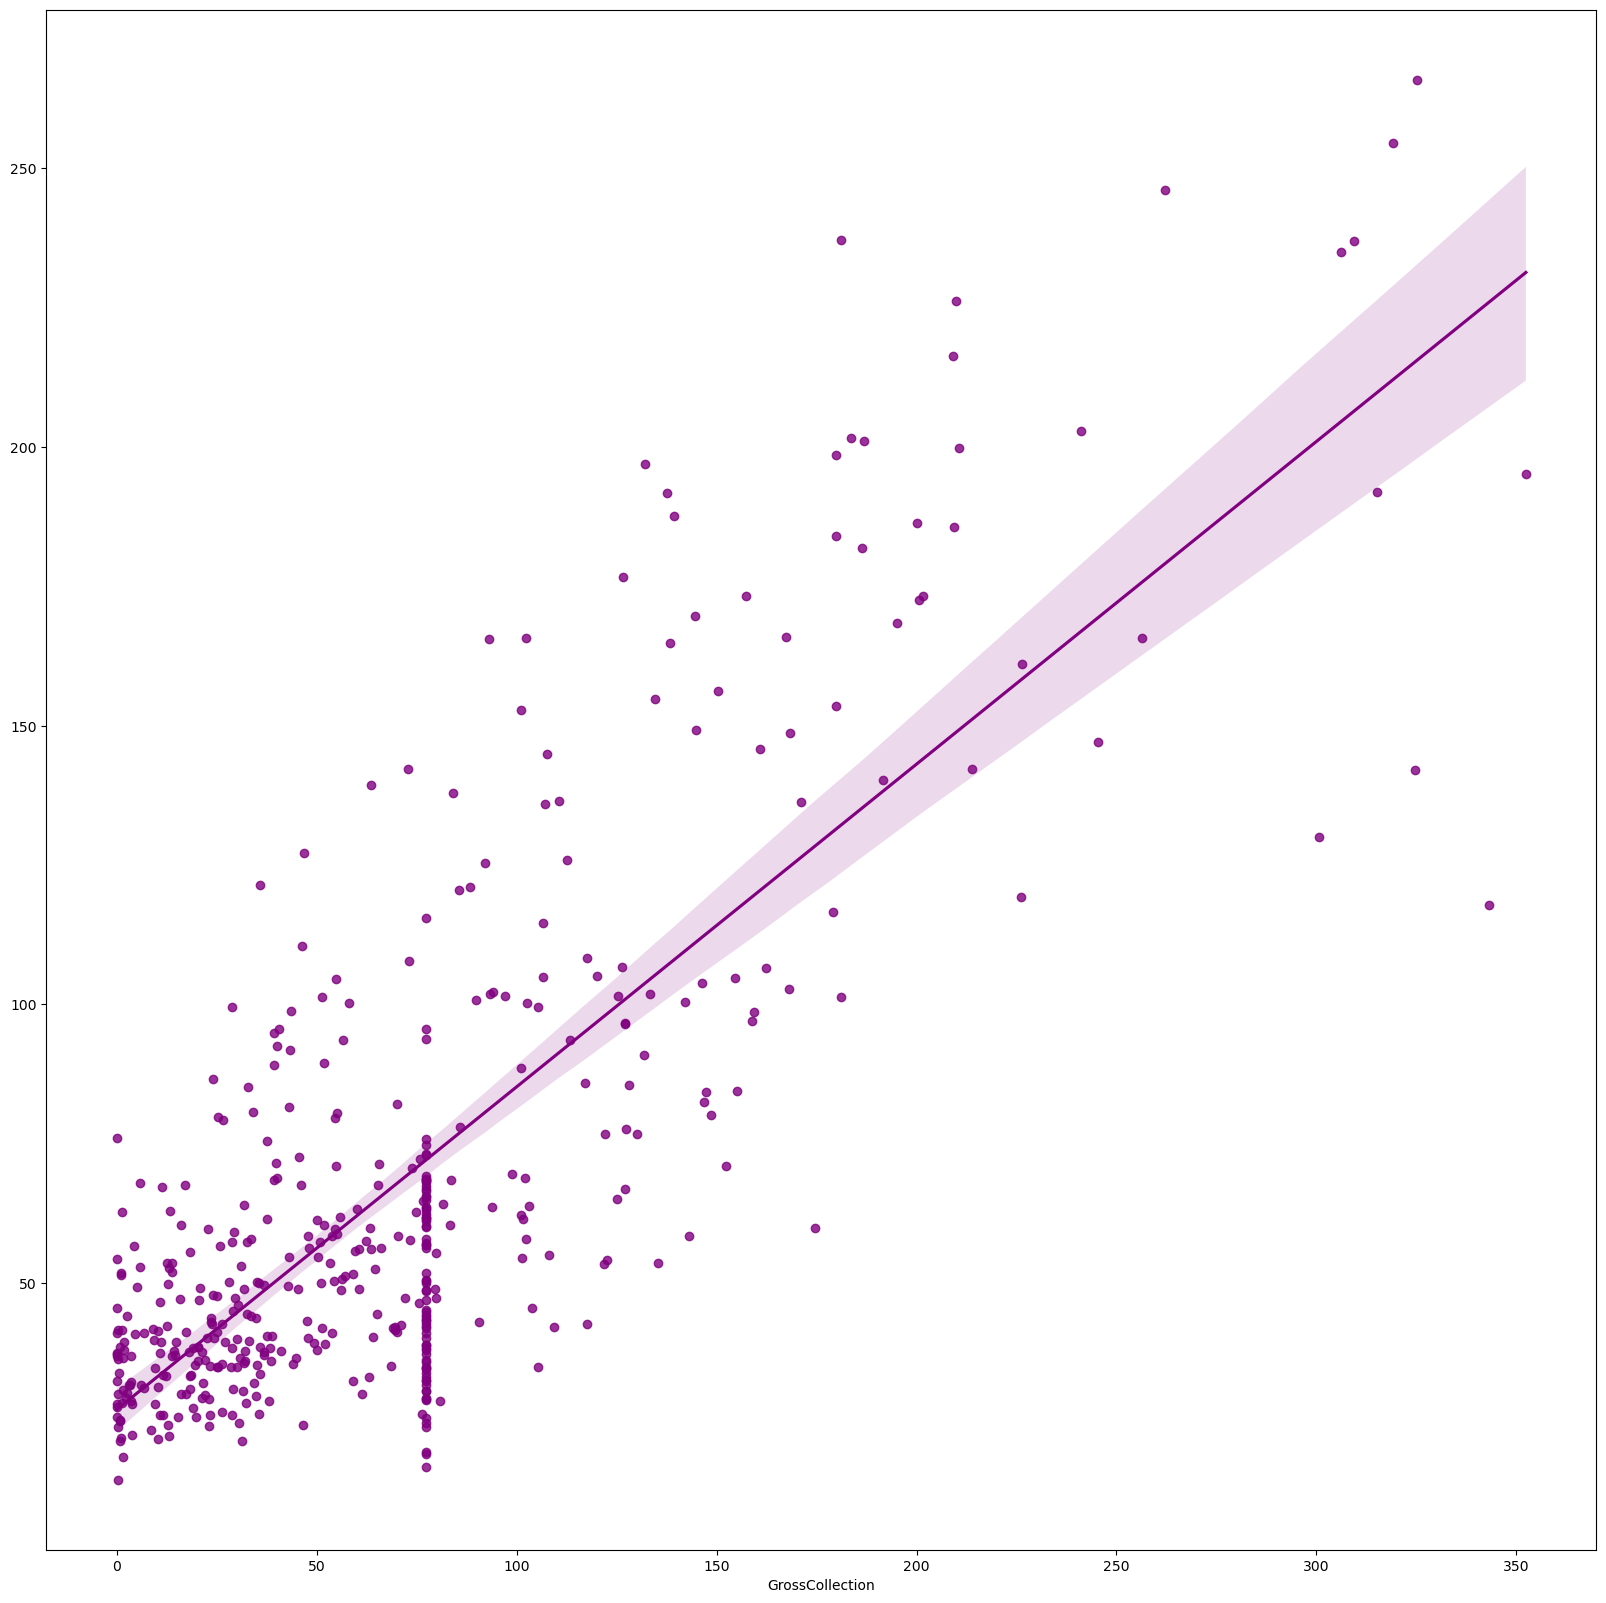

ExtraTreesRegressor()
Mean absolute error 29.859886053616773
Mean squared error 1540.649897556339
Root Mean squared error 39.25111332887692
R2 Score 0.6153562081562746
At random state ExtraTreesRegressor(),the training accuracy is :- 1.0
At random state ExtraTreesRegressor(),the testing accuracy is :- 0.6153562081562746
Cross Validation Score: 0.4469213483660018
Difference Between r2_score and CrossValidation Score: 0.16843485979027278
---------------------------------------------------------------------------------------------------------


In [130]:
for i in models:
    create_model(i)

It is observed that GradientBoostingRegressor() gives the best result.

Hyper parameter tuning

In [131]:
#Gradient boosting regressor
gb_params = {'criterion':['friedman_mse', 'squared_error'],
             'max_features':['auto', 'sqrt', 'log2'],
             'loss':['squared_error','absolute_error','huber','quantile'],
             'warm_start':[True,False]}


In [132]:
gbr=GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
RSCV=GridSearchCV(gbr(),gb_params,cv=10,n_jobs=-1,verbose=True)

In [133]:
RSCV.fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             verbose=True)

In [134]:
RSCV.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_features': 'auto',
 'warm_start': True}

In [135]:
Final_Model = GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error', max_features='auto',warm_start=True)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 62.73981583996431


In [136]:
Final_Model

GradientBoostingRegressor(max_features='auto', warm_start=True)

In [137]:
from sklearn.model_selection import GridSearchCV


In [138]:
gbr=GradientBoostingRegressor
GSCV=GridSearchCV(gbr(),gb_params,cv=10,n_jobs=-1,verbose=True)

In [139]:
GSCV.fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             verbose=True)

In [140]:
GSCV.best_params_

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_features': 'auto',
 'warm_start': True}

In [141]:
Last_Model = GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error', max_features='auto',warm_start=False)
Classifier = Last_Model.fit(x_train, y_train)
lr_pred = Last_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Last_Model is:", lr_r2_score*100)

R2 score for the Last_Model is: 62.42391851046412


In [142]:
Last_Model

GradientBoostingRegressor(max_features='auto')

In [143]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [144]:
lasso= Lasso(alpha=0.0001)

In [145]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [146]:
lasso.score(x_train,y_train)

0.4072041899355333

In [147]:
lasso_pred=lasso.predict(x_test)

In [148]:
r2_score(y_test,lasso_pred)

0.5544028116098256

In [149]:
ridge=Ridge(alpha=0.1)

In [150]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [151]:
ridge.score(x_train,y_train)*100

40.720418366994394

In [152]:
ridge_pred=ridge.predict(x_test)

In [153]:
r2_score(y_test,ridge_pred)

0.5543857286896312

In [154]:
#saving the model
import joblib
joblib.dump(Final_Model,'IMDBGROSS.pkl')

['IMDBGROSS.pkl']

In [155]:
#Loading the saved model
IMDBGROSS=joblib.load('IMDBGROSS.pkl')

In [156]:
prediction =IMDBGROSS.predict(x_test)
prediction

array([ 69.98229106,  48.48140294,  30.56649384,  98.30680001,
       112.80426196,  44.20805212,  94.64061063,  79.90969269,
        57.5359531 ,  57.65090647,  20.84364465,  31.28394145,
        41.17906325,  23.56365928,  28.85374601,  38.7850782 ,
        54.01588792,  45.10910761,  30.72781917,  55.83348197,
        48.95625812,  34.52675415,  31.31889898,  51.39064327,
        75.43683053,  29.61540279, 263.26206641, 226.54050176,
        49.40744535,  28.61698581,  89.80406585,  28.92496312,
        55.42182622,  42.59285412,  25.89961259,  32.95954523,
        35.01623541,  33.17400867,  70.96244345, 105.22107048,
        55.99820077,  65.11978395,  59.07912754,  26.82348951,
        24.70654992,  28.45858856, 102.17266734,  40.4890851 ,
        35.17545299,  31.02323484,  96.42480176,  71.39052518,
        56.83534505,  30.08293617,  58.03378766, 184.15860602,
        42.67852556,  46.67786866,  41.73320662,  58.10993161,
        51.93959004, 136.91280992,  68.84643235,  40.54

In [157]:
pd.DataFrame([IMDBGROSS.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0          1          2        3           4          5    \
Predicted  69.982291  48.481403  30.566494  98.3068  112.804262  44.208052   
Original   93.930000  77.293399   1.490000  40.5600  142.110000  30.310000   

                  6          7          8          9    ...       458  \
Predicted   94.640611  79.909693  57.535953  57.650906  ...  61.80061   
Original   133.380000  77.293399  50.330000  28.710000  ...  34.02000   

                 459        460         461        462        463        464  \
Predicted  63.192906  44.386292  105.080652  44.037788  22.861732  37.796627   
Original    0.070000  77.293399  162.430000  77.293399   9.480000  15.740000   

                 465        466        467  
Predicted  59.596825  36.016513  60.699952  
Original   55.700000  20.240000  51.190000  

[2 rows x 468 columns]

<Axes: xlabel='GrossCollection', ylabel='Density'>

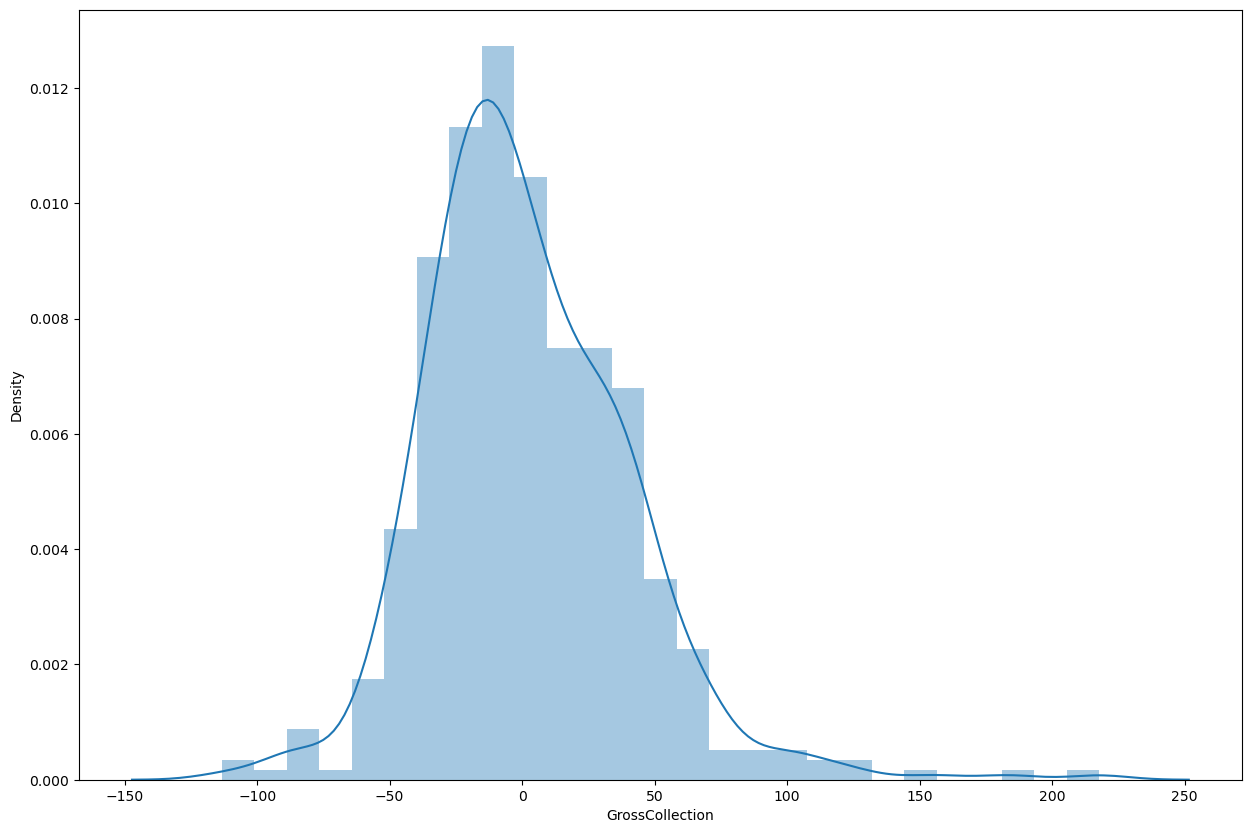

In [158]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [159]:
import pickle
filename = 'IMDBGROSS'
pickle.dump(Final_Model,open(filename, 'wb'))

In [160]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

62.73981583996431


<Axes: xlabel='GrossCollection', ylabel='Density'>

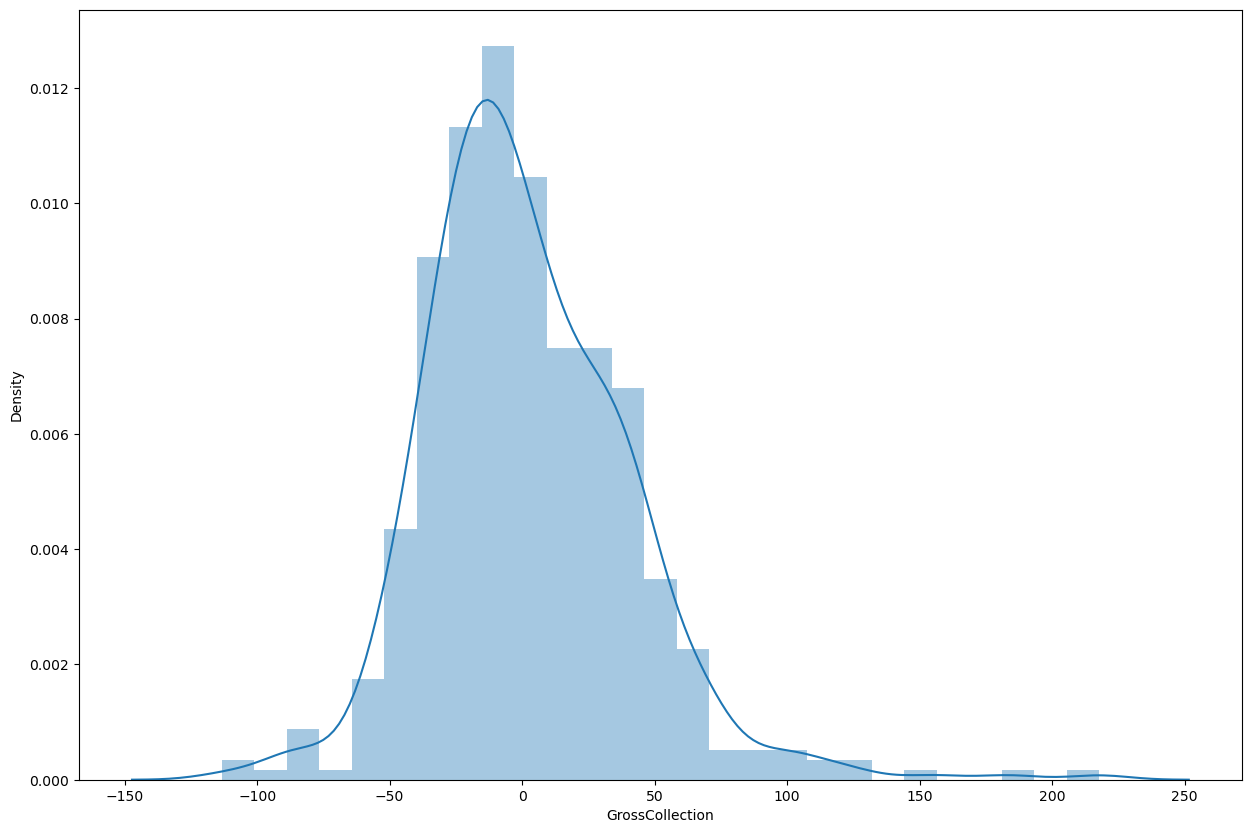

In [161]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [162]:
IMDB_new

MovieName  Duration  Year  Rating  Metascore  Director1  Star1   Star2  \
7        1113.0       153  2020     8.7         48      859.0  634.0   861.0   
12       1088.0       163  2022     8.6         48      332.0  170.0   800.0   
19        874.0       101  2003     8.4         77      655.0  109.0  1139.0   
21         67.0       137  1986     8.4         84      364.0  611.0   756.0   
22        670.0       145  2019     8.4         48      534.0  358.0   811.0   
...         ...       ...   ...     ...        ...        ...    ...     ...   
1721      379.0       107  2000     3.6         14      163.0  351.0   499.0   
1722      826.0        95  1997     3.6         11      445.0  558.0  1041.0   
1723      289.0        99  2017     3.6         48       26.0  562.0   336.0   
1724      141.0        98  1996     3.5         40      192.0  504.0    44.0   
1725     1145.0        89  2011     3.5         37      755.0  304.0   501.0   

       Star3   Star4  Genre1  Genre3  GrossCollection   votes  
7       94.0  1358.0     0.0     4.0        77.293399  119418  
12    1007.0  1280.0     0.0    11.0        77.293399   59650  
19     638.0   735.0     0.0    11.0         0.710000  595685  
21     176.0  1040.0     0.0    13.0        85.160000  731975  
22      97.0   424.0     0.0     3.0        77.293399   36003  
...      ...     ...     ...     ...              ...     ...  
1721  1315.0   148.0     0.0     6.0        15.220000   35087  
1722   499.0  1202.0     0.0     6.0        35.930000   56319  
1723   958.0  1045.0     0.0     4.0        77.293399   33481  
1724    14.0   276.0     0.0     4.0         3.790000   30245  
1725   576.0  1169.0     0.0     2.0        38.540000   26888  

[1559 rows x 14 columns]

In [163]:
IMDB.corr()

MovieName  Duration      Year    Rating  Metascore  \
MovieName         1.000000 -0.003983 -0.036918  0.018557   0.003043   
Duration         -0.003983  1.000000  0.137324  0.346547   0.242393   
Year             -0.036918  0.137324  1.000000 -0.142185  -0.139332   
Rating            0.018557  0.346547 -0.142185  1.000000   0.647505   
Metascore         0.003043  0.242393 -0.139332  0.647505   1.000000   
Director1        -0.016358  0.016598 -0.073060 -0.023060  -0.040086   
Star1            -0.001741  0.030354 -0.025146  0.038127   0.000725   
Star2            -0.016227  0.057772  0.009831  0.011656  -0.012908   
Star3             0.007826  0.006588 -0.006971 -0.017050  -0.020814   
Star4             0.009894  0.056853  0.012996  0.041164   0.018964   
Genre1           -0.015813 -0.155345  0.045271  0.123077   0.126791   
Genre3            0.057789  0.055885 -0.094564 -0.033125  -0.027816   
GrossCollection   0.021940  0.292306  0.139925  0.248505   0.270334   
votes             0.024187  0.280113  0.058036  0.424411   0.380433   

                 Director1     Star1     Star2     Star3     Star4    Genre1  \
MovieName        -0.016358 -0.001741 -0.016227  0.007826  0.009894 -0.015813   
Duration          0.016598  0.030354  0.057772  0.006588  0.056853 -0.155345   
Year             -0.073060 -0.025146  0.009831 -0.006971  0.012996  0.045271   
Rating           -0.023060  0.038127  0.011656 -0.017050  0.041164  0.123077   
Metascore        -0.040086  0.000725 -0.012908 -0.020814  0.018964  0.126791   
Director1         1.000000 -0.006526  0.039387  0.006337  0.034672 -0.035647   
Star1            -0.006526  1.000000 -0.012965  0.020941  0.016399  0.001940   
Star2             0.039387 -0.012965  1.000000  0.023401  0.045631 -0.045808   
Star3             0.006337  0.020941  0.023401  1.000000  0.033745  0.001282   
Star4             0.034672  0.016399  0.045631  0.033745  1.000000  0.029145   
Genre1           -0.035647  0.001940 -0.045808  0.001282  0.029145  1.000000   
Genre3            0.036924  0.038467 -0.022105  0.016648  0.016442 -0.283426   
GrossCollection  -0.050535 -0.003551  0.005498  0.009443 -0.004827  0.027207   
votes            -0.040813 -0.020767 -0.009577 -0.038155 -0.011789 -0.029313   

                   Genre3  GrossCollection     votes  
MovieName        0.057789         0.021940  0.024187  
Duration         0.055885         0.292306  0.280113  
Year            -0.094564         0.139925  0.058036  
Rating          -0.033125         0.248505  0.424411  
Metascore       -0.027816         0.270334  0.380433  
Director1        0.036924        -0.050535 -0.040813  
Star1            0.038467        -0.003551 -0.020767  
Star2           -0.022105         0.005498 -0.009577  
Star3            0.016648         0.009443 -0.038155  
Star4            0.016442        -0.004827 -0.011789  
Genre1          -0.283426         0.027207 -0.029313  
Genre3           1.000000         0.021334  0.071370  
GrossCollection  0.021334         1.000000  0.670317  
votes            0.071370         0.670317  1.000000

In [164]:
#Normalizing the frequency table of 'primary_fuel' variable
IMDB['votes'].value_counts(normalize=True)

33891     0.001149
28224     0.001149
25542     0.001149
39408     0.001149
32152     0.001149
            ...   
283398    0.000575
126059    0.000575
95292     0.000575
98495     0.000575
96244     0.000575
Name: votes, Length: 1733, dtype: float64

In [165]:
#Frequency table
IMDB['votes'].value_counts()

33891     2
28224     2
25542     2
39408     2
32152     2
         ..
283398    1
126059    1
95292     1
98495     1
96244     1
Name: votes, Length: 1733, dtype: int64

In [166]:
IMDB.corr()['votes'].sort_values()

Director1         -0.040813
Star3             -0.038155
Genre1            -0.029313
Star1             -0.020767
Star4             -0.011789
Star2             -0.009577
MovieName          0.024187
Year               0.058036
Genre3             0.071370
Duration           0.280113
Metascore          0.380433
Rating             0.424411
GrossCollection    0.670317
votes              1.000000
Name: votes, dtype: float64

In [167]:
#seperate feature variable and target variable
x = IMDB_new.drop (['votes'], axis = 1)
y = IMDB_new['votes']

In [168]:
x

MovieName  Duration  Year  Rating  Metascore  Director1  Star1   Star2  \
7        1113.0       153  2020     8.7         48      859.0  634.0   861.0   
12       1088.0       163  2022     8.6         48      332.0  170.0   800.0   
19        874.0       101  2003     8.4         77      655.0  109.0  1139.0   
21         67.0       137  1986     8.4         84      364.0  611.0   756.0   
22        670.0       145  2019     8.4         48      534.0  358.0   811.0   
...         ...       ...   ...     ...        ...        ...    ...     ...   
1721      379.0       107  2000     3.6         14      163.0  351.0   499.0   
1722      826.0        95  1997     3.6         11      445.0  558.0  1041.0   
1723      289.0        99  2017     3.6         48       26.0  562.0   336.0   
1724      141.0        98  1996     3.5         40      192.0  504.0    44.0   
1725     1145.0        89  2011     3.5         37      755.0  304.0   501.0   

       Star3   Star4  Genre1  Genre3  GrossCollection  
7       94.0  1358.0     0.0     4.0        77.293399  
12    1007.0  1280.0     0.0    11.0        77.293399  
19     638.0   735.0     0.0    11.0         0.710000  
21     176.0  1040.0     0.0    13.0        85.160000  
22      97.0   424.0     0.0     3.0        77.293399  
...      ...     ...     ...     ...              ...  
1721  1315.0   148.0     0.0     6.0        15.220000  
1722   499.0  1202.0     0.0     6.0        35.930000  
1723   958.0  1045.0     0.0     4.0        77.293399  
1724    14.0   276.0     0.0     4.0         3.790000  
1725   576.0  1169.0     0.0     2.0        38.540000  

[1559 rows x 13 columns]

In [169]:
y

7       119418
12       59650
19      595685
21      731975
22       36003
         ...  
1721     35087
1722     56319
1723     33481
1724     30245
1725     26888
Name: votes, Length: 1559, dtype: int32

In [170]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

MovieName  Duration      Year    Rating  Metascore  Director1     Star1  \
0      0.533007  1.998290  1.137439  2.634683  -0.237569   1.361764  1.333784   
1      0.482227  2.516666  1.305993  2.518741  -0.237569  -0.615690 -0.900766   
2      0.047556 -0.697264 -0.295266  2.286858   1.741922   0.596298 -1.194533   
3     -1.591601  1.168889 -1.727972  2.286858   2.219730  -0.495617  1.223020   
4     -0.366803  1.583590  1.053163  2.286858  -0.237569   0.142272  0.004612   
...         ...       ...       ...       ...        ...        ...       ...   
1554  -0.957875 -0.386238 -0.548097 -3.278350  -2.558351  -1.249826 -0.029099   
1555  -0.049940 -1.008289 -0.800927 -3.278350  -2.763126  -0.191682  0.967780   
1556  -1.140681 -0.800939  0.884609 -3.278350  -0.237569  -1.763889  0.987044   
1557  -1.441294 -0.852776 -0.885204 -3.394292  -0.783635  -1.141010  0.707725   
1558   0.598004 -1.319314  0.378948 -3.394292  -0.988410   0.971527 -0.255444   

         Star2     Star3     Star4  Genre1    Genre3  GrossCollection  
0     0.842938 -1.475912  1.548682     0.0 -0.779465         0.194338  
1     0.656720  0.921885  1.362147     0.0  0.611363         0.194338  
2     1.691601 -0.047214  0.058791     0.0  0.611363        -1.056684  
3     0.522399 -1.260557  0.788192     0.0  1.008742         0.322843  
4     0.690301 -1.468034 -0.684958     0.0 -0.978155         0.194338  
...        ...       ...       ...     ...       ...              ...  
1554 -0.262156  1.730780 -1.345006     0.0 -0.382086        -0.819657  
1555  1.392432 -0.412268  1.175611     0.0 -0.382086        -0.481351  
1556 -0.759754  0.793197  0.800149     0.0 -0.779465         0.194338  
1557 -1.651156 -1.686015 -1.038897     0.0 -0.779465        -1.006371  
1558 -0.256051 -0.210044  1.096693     0.0 -1.176844        -0.438715  

[1559 rows x 13 columns]

In [171]:
x.mean()

MovieName          6.765310e-17
Duration           4.949359e-16
Year              -5.581488e-15
Rating             1.568413e-15
Metascore          2.352761e-15
Director1          9.578255e-17
Star1              9.015666e-17
Star2             -4.219417e-17
Star3              9.795457e-17
Star4              1.118057e-16
Genre1             0.000000e+00
Genre3             6.779553e-17
GrossCollection   -2.981365e-16
dtype: float64

In [172]:
x.std()

MovieName          1.000321
Duration           1.000321
Year               1.000321
Rating             1.000321
Metascore          1.000321
Director1          1.000321
Star1              1.000321
Star2              1.000321
Star3              1.000321
Star4              1.000321
Genre1             0.000000
Genre3             1.000321
GrossCollection    1.000321
dtype: float64

In [173]:
x.shape

(1559, 13)

In [174]:
y.shape

(1559,)

In [175]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [176]:
vif_cal()

    VIF FACTOR         FEATURES
0     1.008347        MovieName
1     1.297314         Duration
2     1.090969             Year
3     1.937025           Rating
4     1.744477        Metascore
5     1.017913        Director1
6     1.006540            Star1
7     1.009603            Star2
8     1.004154            Star3
9     1.008582            Star4
10         NaN           Genre1
11    1.024252           Genre3
12    1.108645  GrossCollection


In [177]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,1559):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.6417387300090984 on Random_State 144


In [178]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=144)

In [179]:
x_train

MovieName  Duration      Year    Rating  Metascore  Director1     Star1  \
1026  -0.996467 -0.645426  1.053163 -0.379804   0.786306  -0.499369 -0.496236   
1297  -0.545547  1.220727 -0.295266 -0.959513   0.171981  -1.658825 -0.785186   
1200   0.744249 -0.697264  0.631779 -0.727630  -1.397960  -0.127893  0.457301   
830   -0.378990 -0.645426 -0.969481 -0.031979  -0.237569  -1.591284  1.141151   
1262  -1.286925 -1.474827 -1.222311 -0.843572  -0.237569  -0.814561  0.168351   
...         ...       ...       ...       ...        ...        ...       ...   
1314  -0.419614 -0.956451 -0.969481 -0.959513  -1.056668   0.956517  0.043139   
1446   0.770654 -0.127050  0.800332 -1.423281  -1.261443  -0.536892 -1.199349   
1240   0.396918  1.065214  1.305993 -0.727630  -0.237569  -1.358643 -1.652038   
1468  -1.632225 -0.438076  0.378948 -1.539223  -1.807509  -0.187930  1.381943   
1383  -0.492736 -0.438076  1.221716 -1.191397  -1.602735  -1.621302  0.375432   

         Star2     Star3     Star4  Genre1    Genre3  GrossCollection  
1026 -0.781123  0.512184 -0.785400     0.0 -1.176844        -0.080316  
1297 -0.280473  1.134614 -0.115786     0.0 -0.779465         1.090935  
1200  1.612230  1.651991  0.682967     0.0 -1.176844         2.055052  
830   0.214072 -0.026204 -1.402401     0.0 -0.779465        -0.466322  
1262 -0.921549  0.785318  1.125390     0.0 -0.382086        -0.796788  
...        ...       ...       ...     ...       ...              ...  
1314 -0.945971 -0.903383 -0.536686     0.0  1.008742        -0.756603  
1446  0.470503 -0.672270 -1.478929     0.0  1.008742        -0.497849  
1240  1.187898  0.294203 -1.495669     0.0 -0.183396         0.194338  
1468  0.265969 -1.615105 -0.443419     0.0  1.406121        -0.609420  
1383 -1.235982  1.323706 -0.904974     0.0  1.406121         0.194338  

[1091 rows x 13 columns]

In [180]:
x_test

MovieName  Duration      Year    Rating  Metascore  Director1     Star1  \
1080   0.535038  1.583590  1.221716 -0.379804  -0.237569   1.012802 -1.652038   
773    1.182982  0.806026 -0.463820 -0.031979  -0.237569   1.290471 -1.324561   
959    1.603435 -0.593588  0.041841 -0.263862  -1.056668   0.738885 -0.245812   
1424   1.055018 -0.127050 -1.475141 -1.307339  -1.056668  -0.259223  0.842569   
1199   1.142359 -0.230725  1.305993 -0.727630  -1.193185   0.607555  0.091297   
...         ...       ...       ...       ...        ...        ...       ...   
990   -0.271338  0.028462  0.716055 -0.263862  -1.670993  -0.015324 -1.112663   
1074  -1.713472  0.287650 -0.463820 -0.379804  -1.193185  -0.244214  0.934070   
953    1.599373 -1.474827 -0.210989 -0.263862  -0.510602   0.010942 -0.891135   
544    1.280479 -0.697264 -1.643695  0.315847  -0.442344   0.648830 -1.464220   
210    0.181614 -0.904614  0.631779  1.127439   1.195856   0.423693 -0.775555   

         Star2     Star3     Star4  Genre1    Genre3  GrossCollection  
1080  0.055329 -1.667631  0.929289     0.0  1.406121         0.194338  
773   0.934520 -0.173276 -1.510018     0.0 -0.382086         2.231801  
959  -0.335422  0.614609 -0.182748     0.0  1.406121        -0.700899  
1424  0.855149  1.050572  1.455414     0.0 -0.580775        -0.431854  
1199  1.661074 -0.378126 -0.060782     0.0 -1.176844         0.194338  
...        ...       ...       ...     ...       ...              ...  
990   0.650615 -1.659752  0.802541     0.0 -0.183396         0.194338  
1074 -0.881864  0.028948 -1.490886     0.0 -0.779465        -0.669698  
953  -1.507677 -0.147013  0.441428     0.0 -0.779465        -0.309665  
544   0.381973  1.686133 -0.256884     0.0  1.406121        -0.445576  
210   1.200109  0.698650  0.283590     0.0  1.008742        -1.067139  

[468 rows x 13 columns]

In [181]:
y_train

1185     32268
1462    272600
1363    214467
974      28224
1425     46917
         ...  
1479     73906
1612    113229
1403     53136
1635     81840
1548     55296
Name: votes, Length: 1091, dtype: int32

In [182]:
y_test

1239     77892
914     334785
1110     94020
1590     66227
1362     53486
         ...  
1146     44270
1233     51139
1104     81751
676     158838
299     290970
Name: votes, Length: 468, dtype: int32

In [183]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),ExtraTreesRegressor()]

In [184]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    #plt.figure(figsize=(8,8))
    sns.regplot(x=y_test,y= predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2-crossval))
    print('---------------------------------------------------------------------------------------------------------')

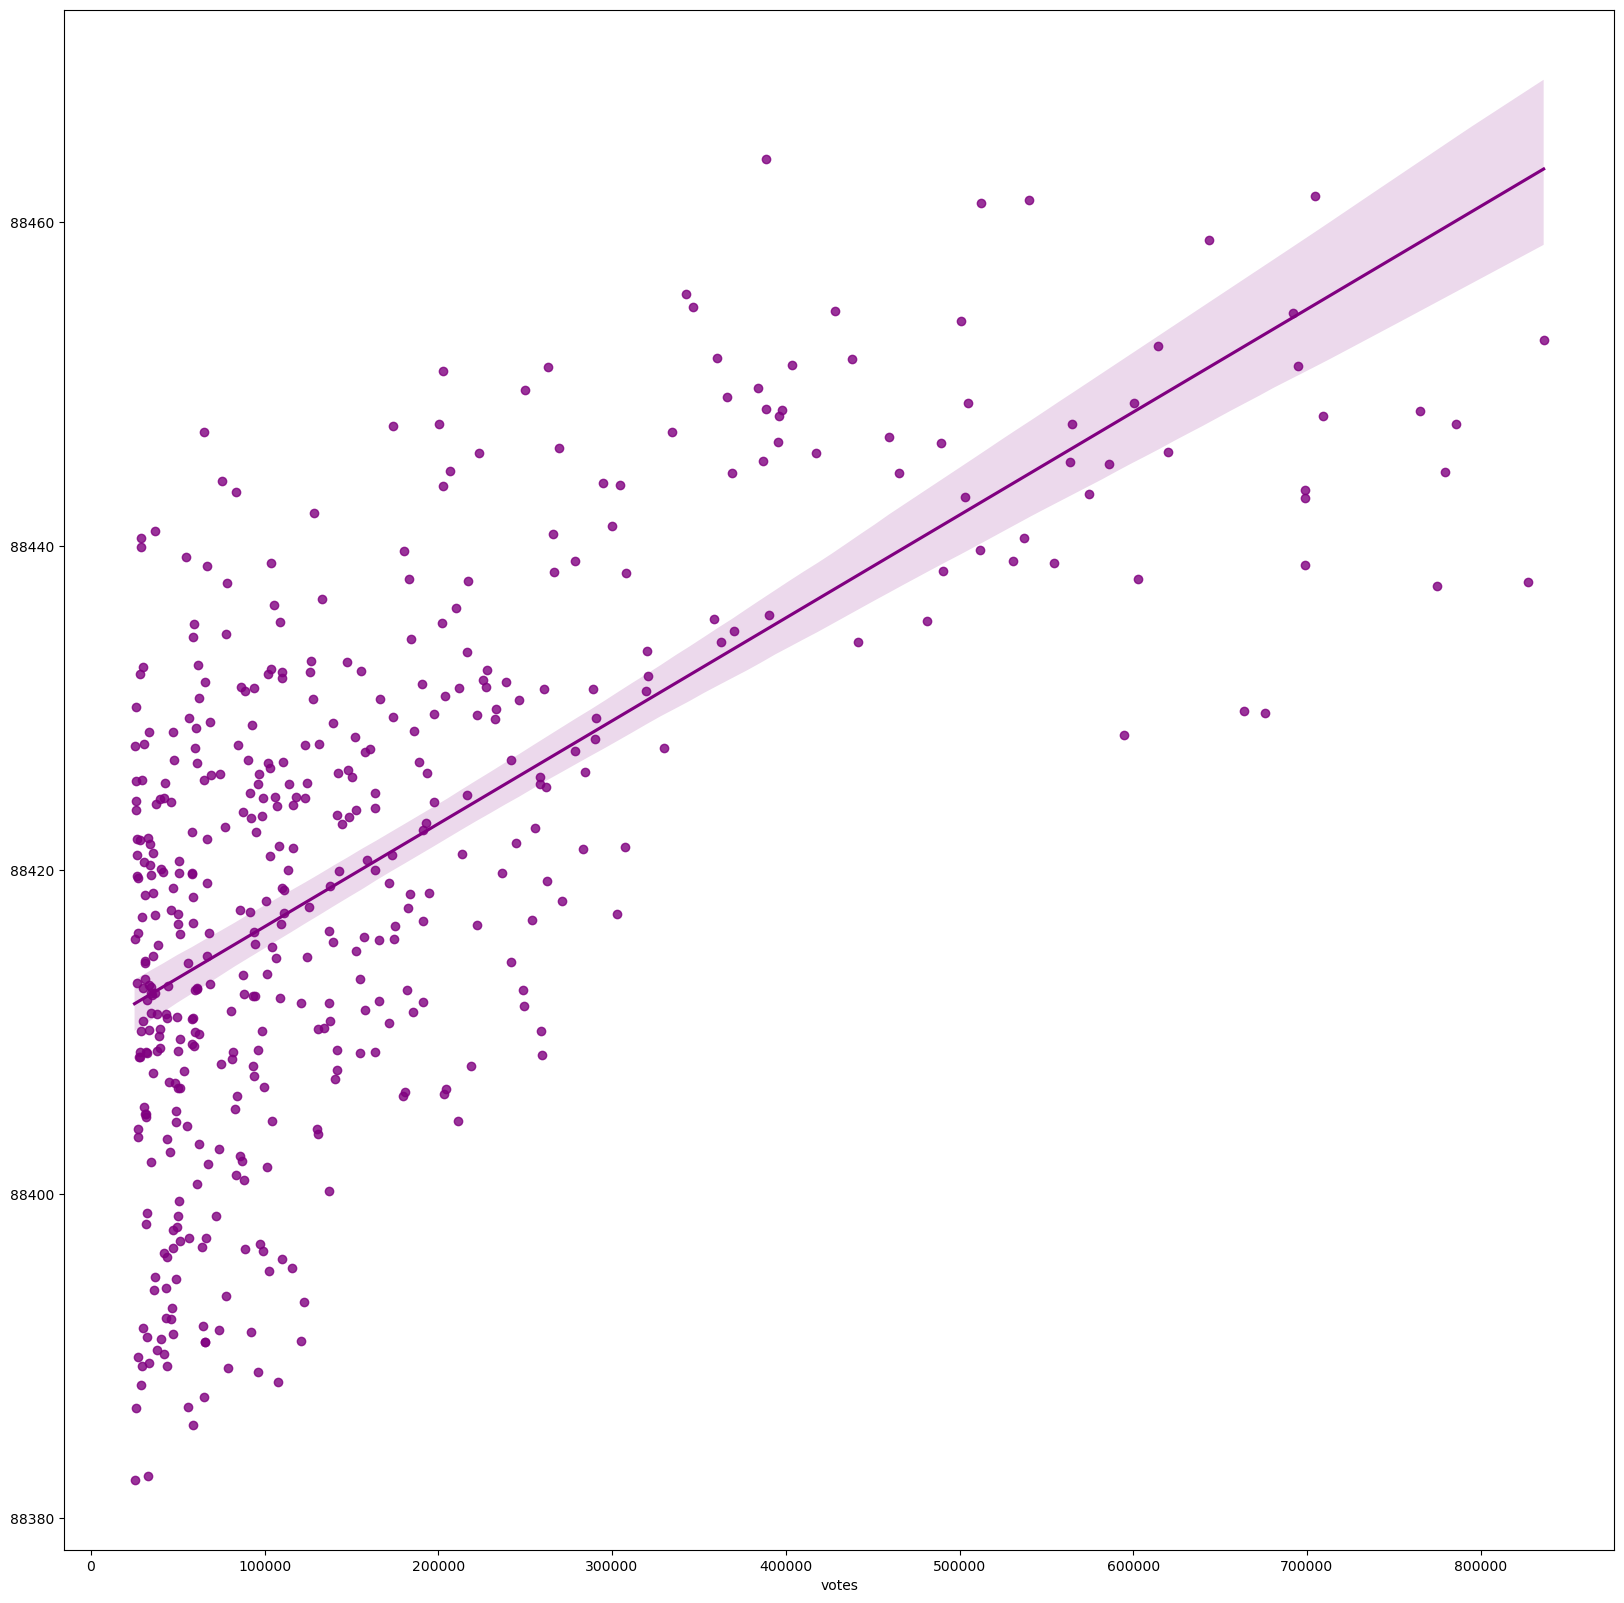

SVR()
Mean absolute error 110902.30925935965
Mean squared error 33934102868.637337
Root Mean squared error 184212.1137944987
R2 Score -0.21039993309854288
At random state SVR(),the training accuracy is :- -0.16270001492171815
At random state SVR(),the testing accuracy is :- -0.21039993309854288
Cross Validation Score: -0.29984631574988796
Difference Between r2_score and CrossValidation Score: 0.08944638265134508
---------------------------------------------------------------------------------------------------------


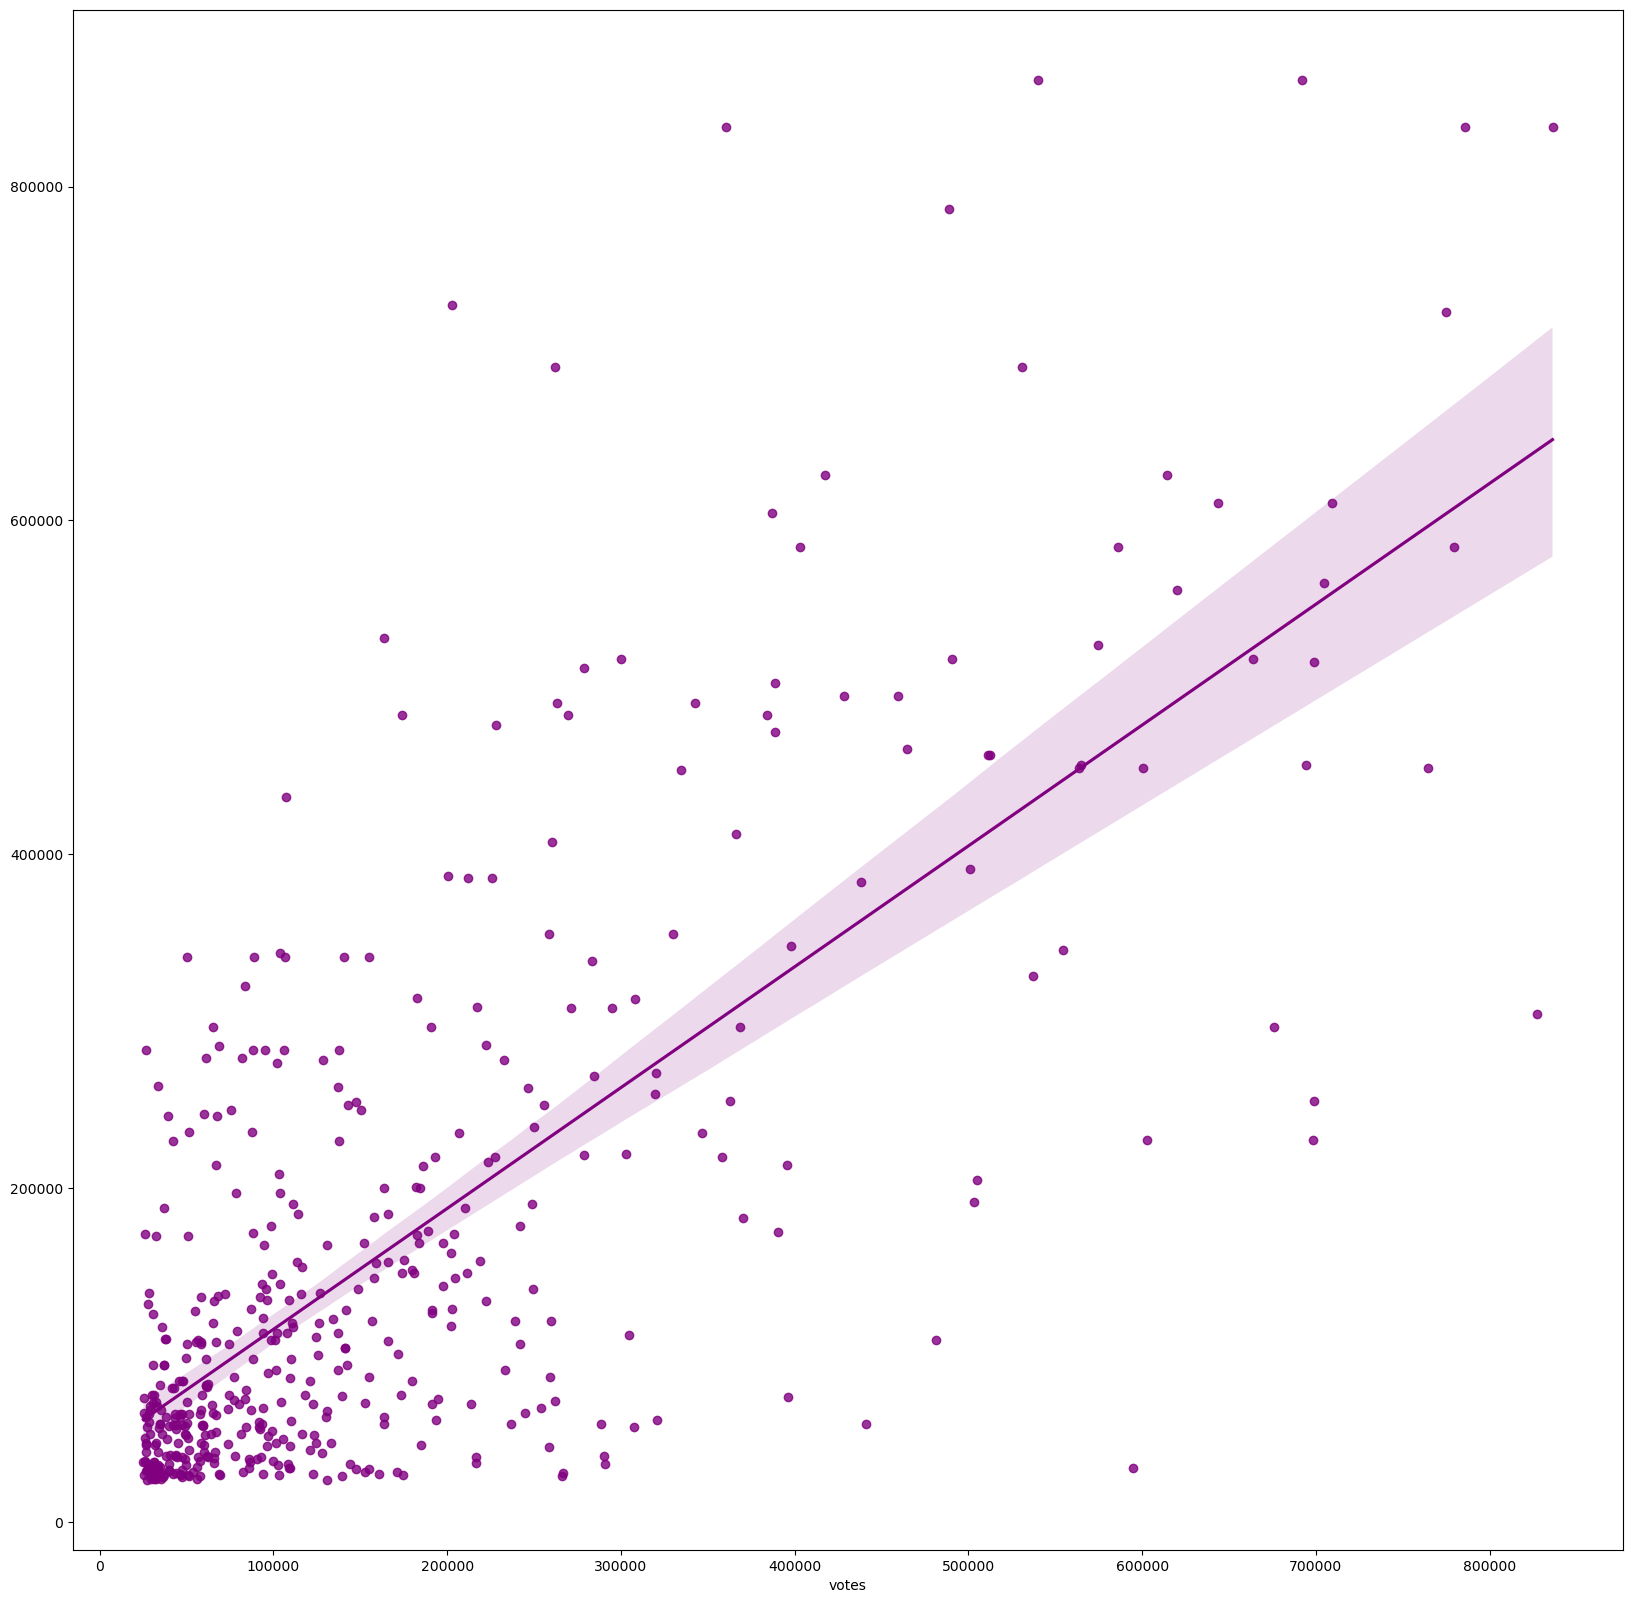

DecisionTreeRegressor()
Mean absolute error 80635.11324786325
Mean squared error 15438034733.151709
Root Mean squared error 124249.88826212967
R2 Score 0.4493387292271689
At random state DecisionTreeRegressor(),the training accuracy is :- 1.0
At random state DecisionTreeRegressor(),the testing accuracy is :- 0.4493387292271689
Cross Validation Score: -0.17376126518670926
Difference Between r2_score and CrossValidation Score: 0.6230999944138782
---------------------------------------------------------------------------------------------------------


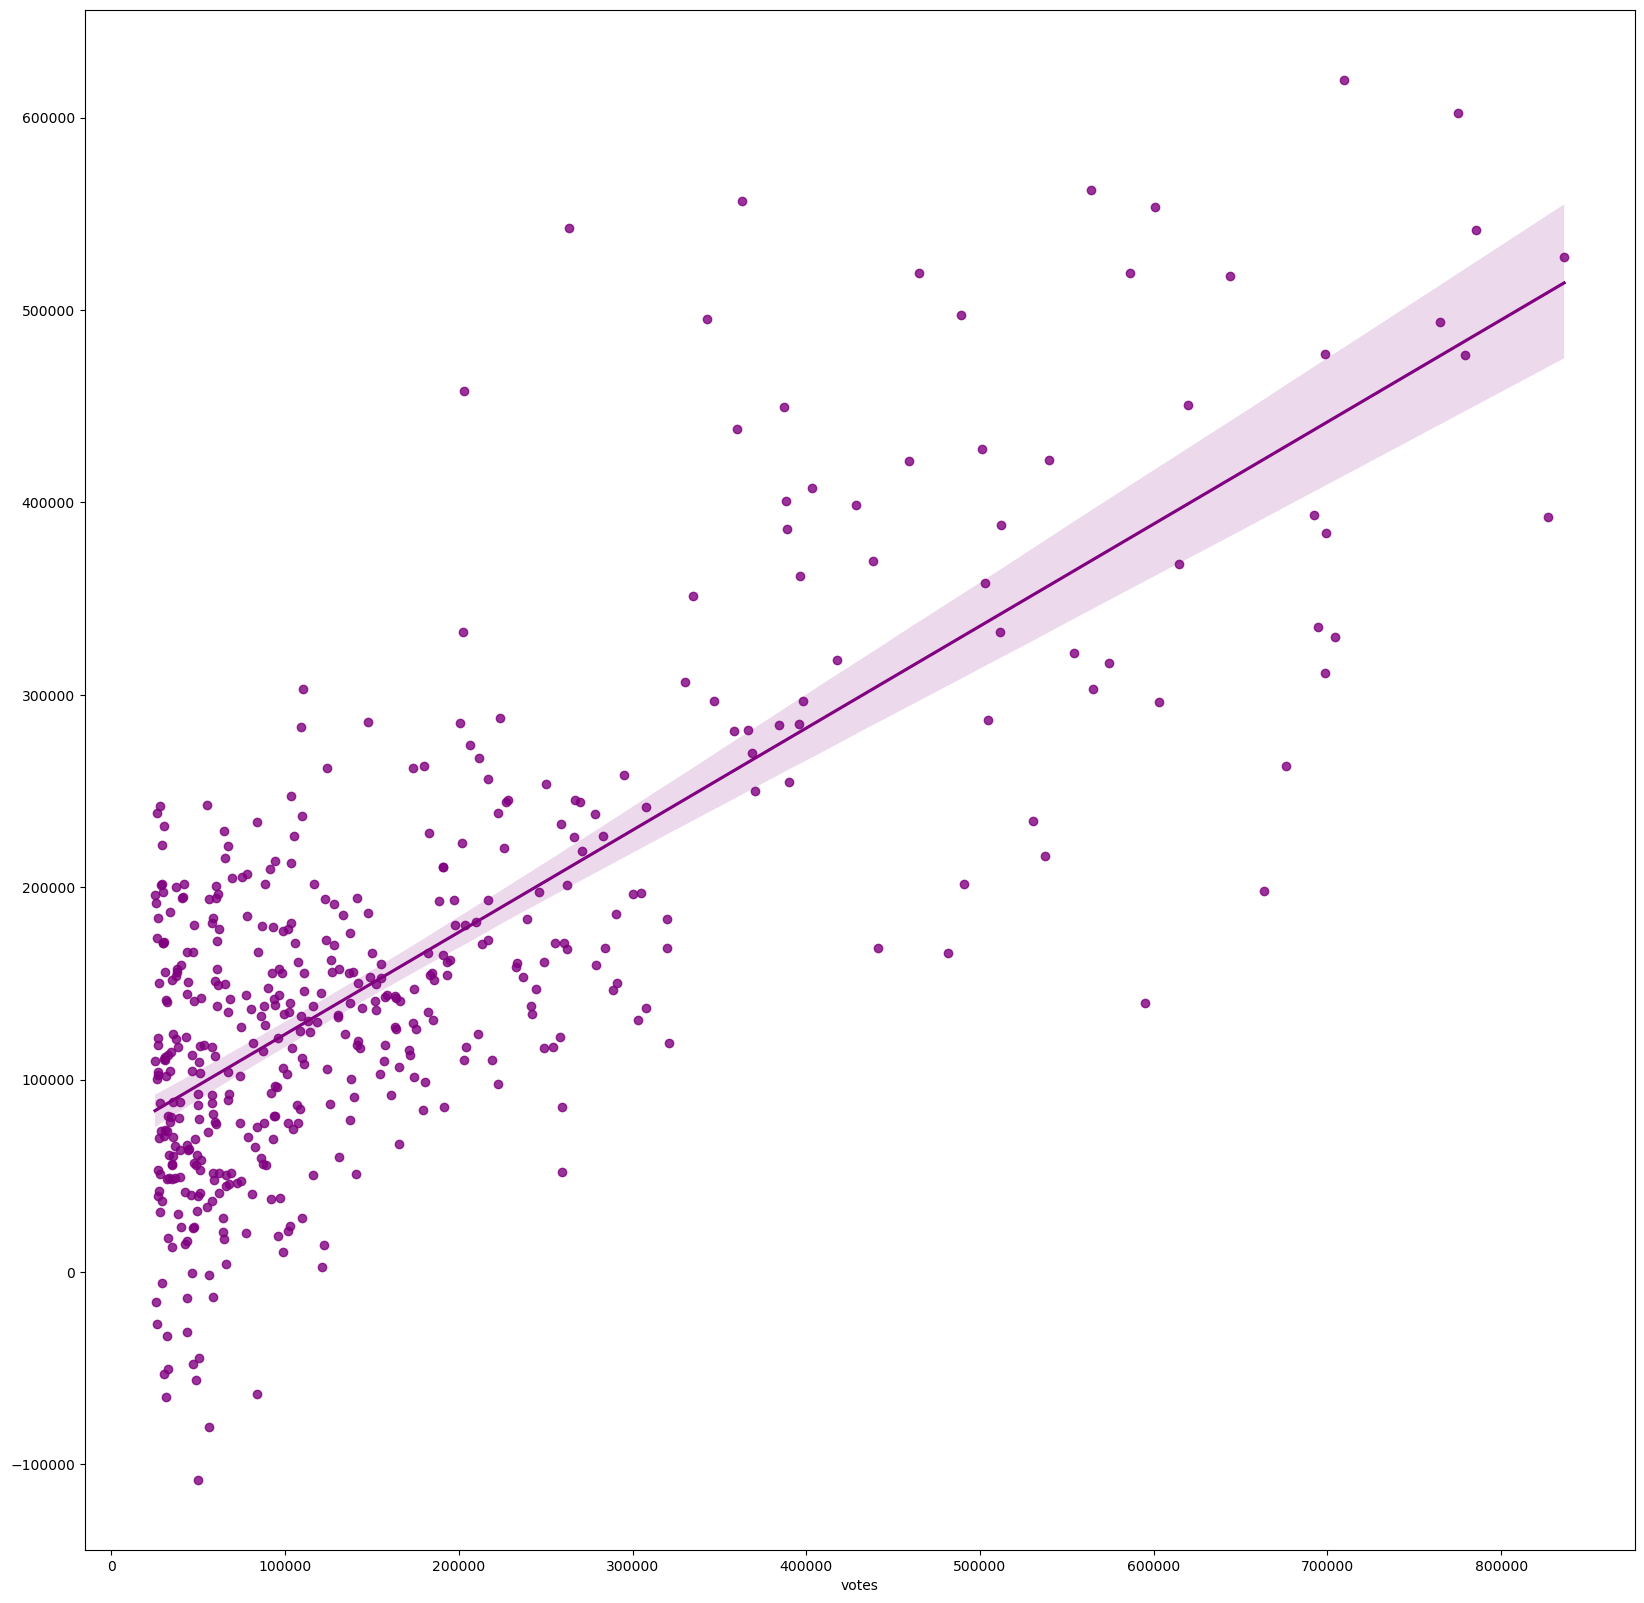

LinearRegression()
Mean absolute error 79361.35332934276
Mean squared error 12190891831.253265
Root Mean squared error 110412.371730949
R2 Score 0.5651614921401615
At random state LinearRegression(),the training accuracy is :- 0.5004657317654799
At random state LinearRegression(),the testing accuracy is :- 0.5651614921401615
Cross Validation Score: -0.059821660250643616
Difference Between r2_score and CrossValidation Score: 0.6249831523908052
---------------------------------------------------------------------------------------------------------


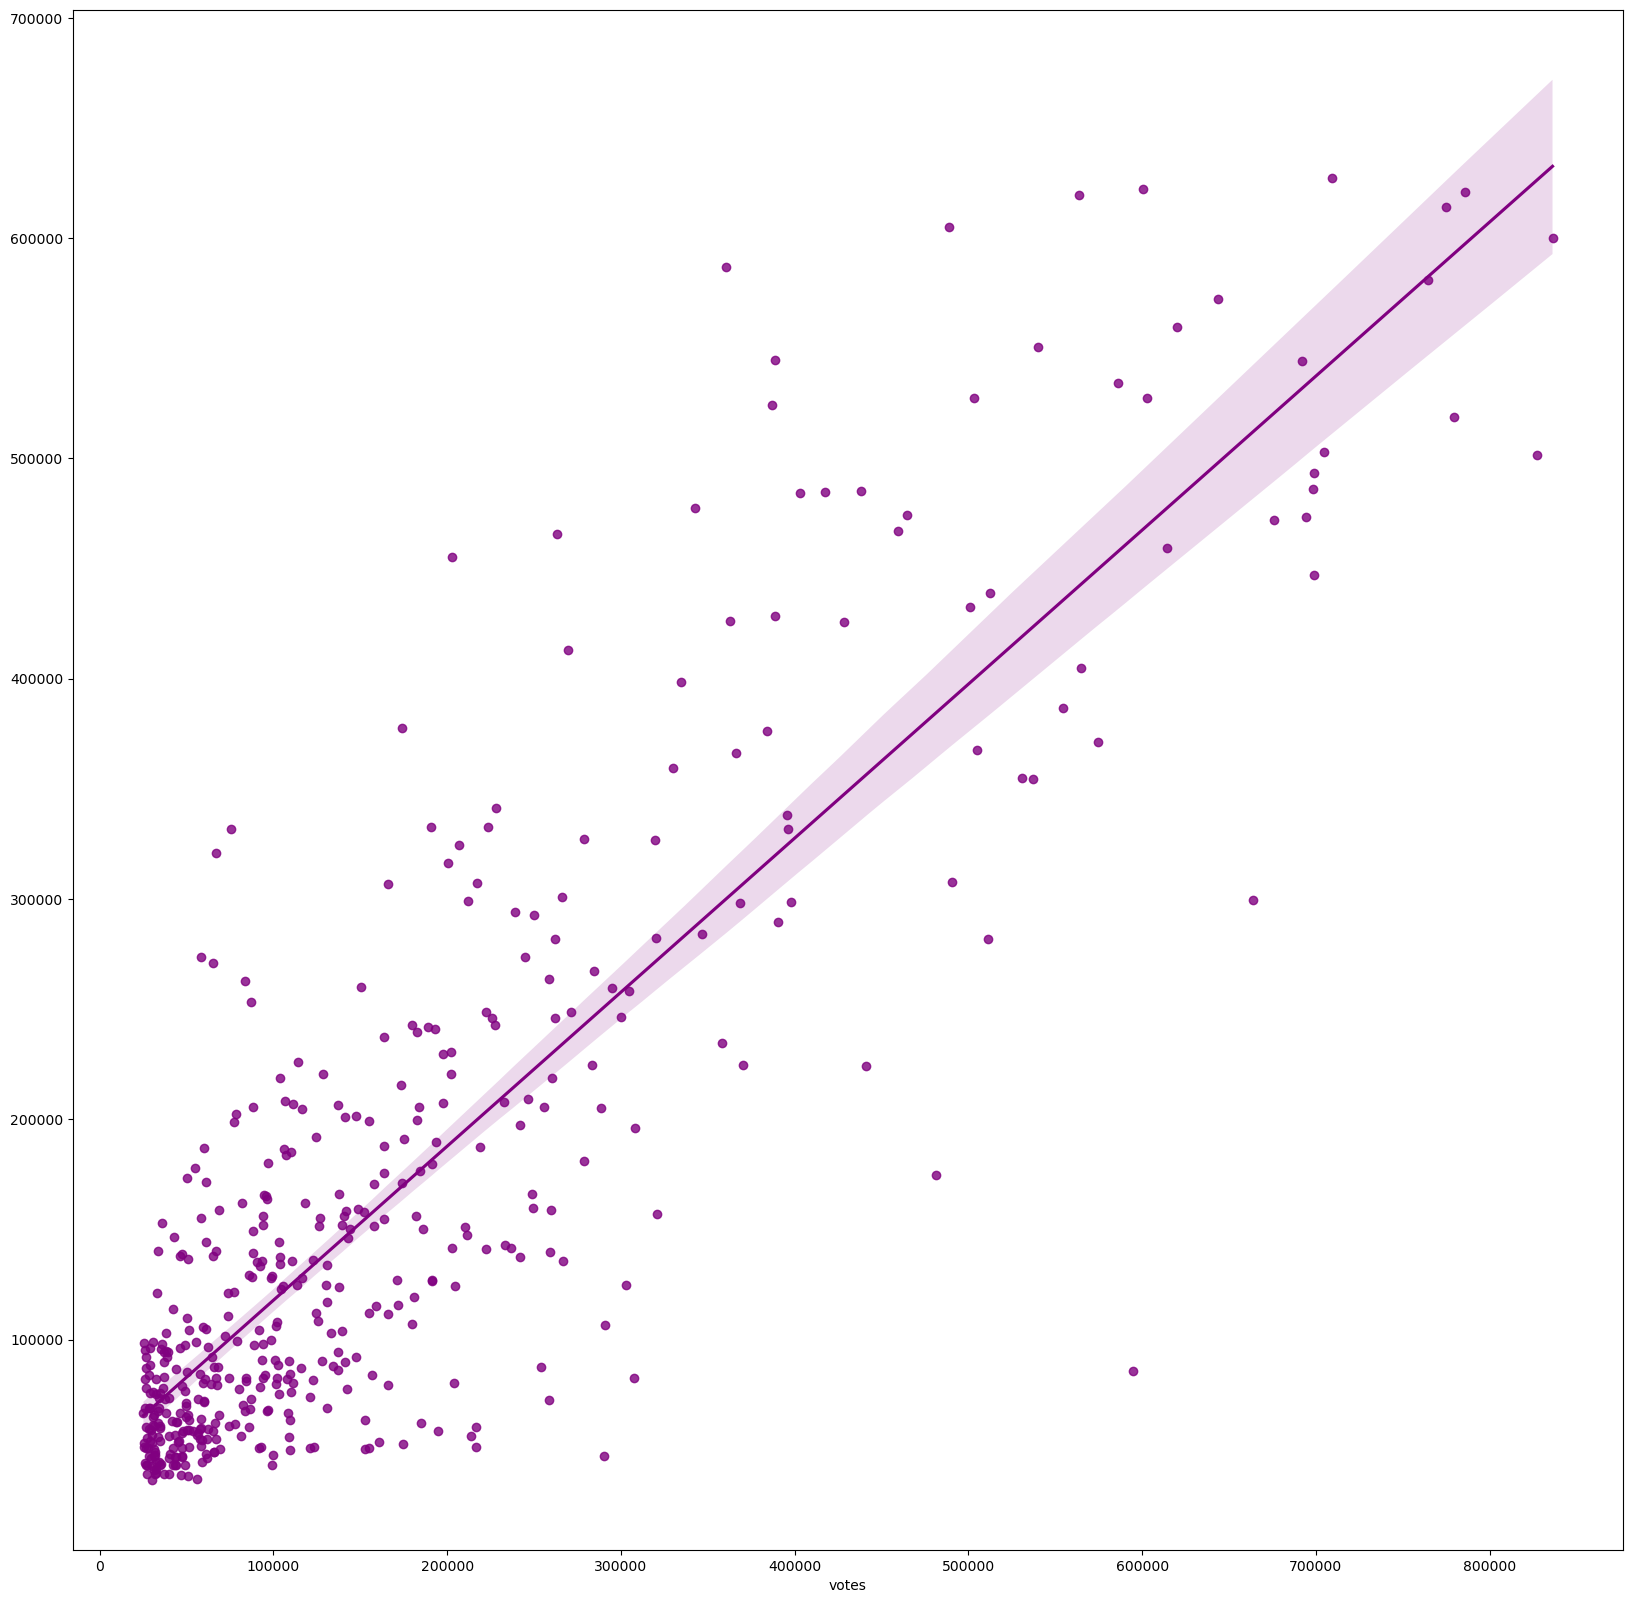

RandomForestRegressor()
Mean absolute error 59422.87344017094
Mean squared error 7580638067.429919
Root Mean squared error 87066.85975404143
R2 Score 0.7296052338504065
At random state RandomForestRegressor(),the training accuracy is :- 0.9541497362285175
At random state RandomForestRegressor(),the testing accuracy is :- 0.7296052338504065
Cross Validation Score: 0.4620197573718798
Difference Between r2_score and CrossValidation Score: 0.26758547647852676
---------------------------------------------------------------------------------------------------------


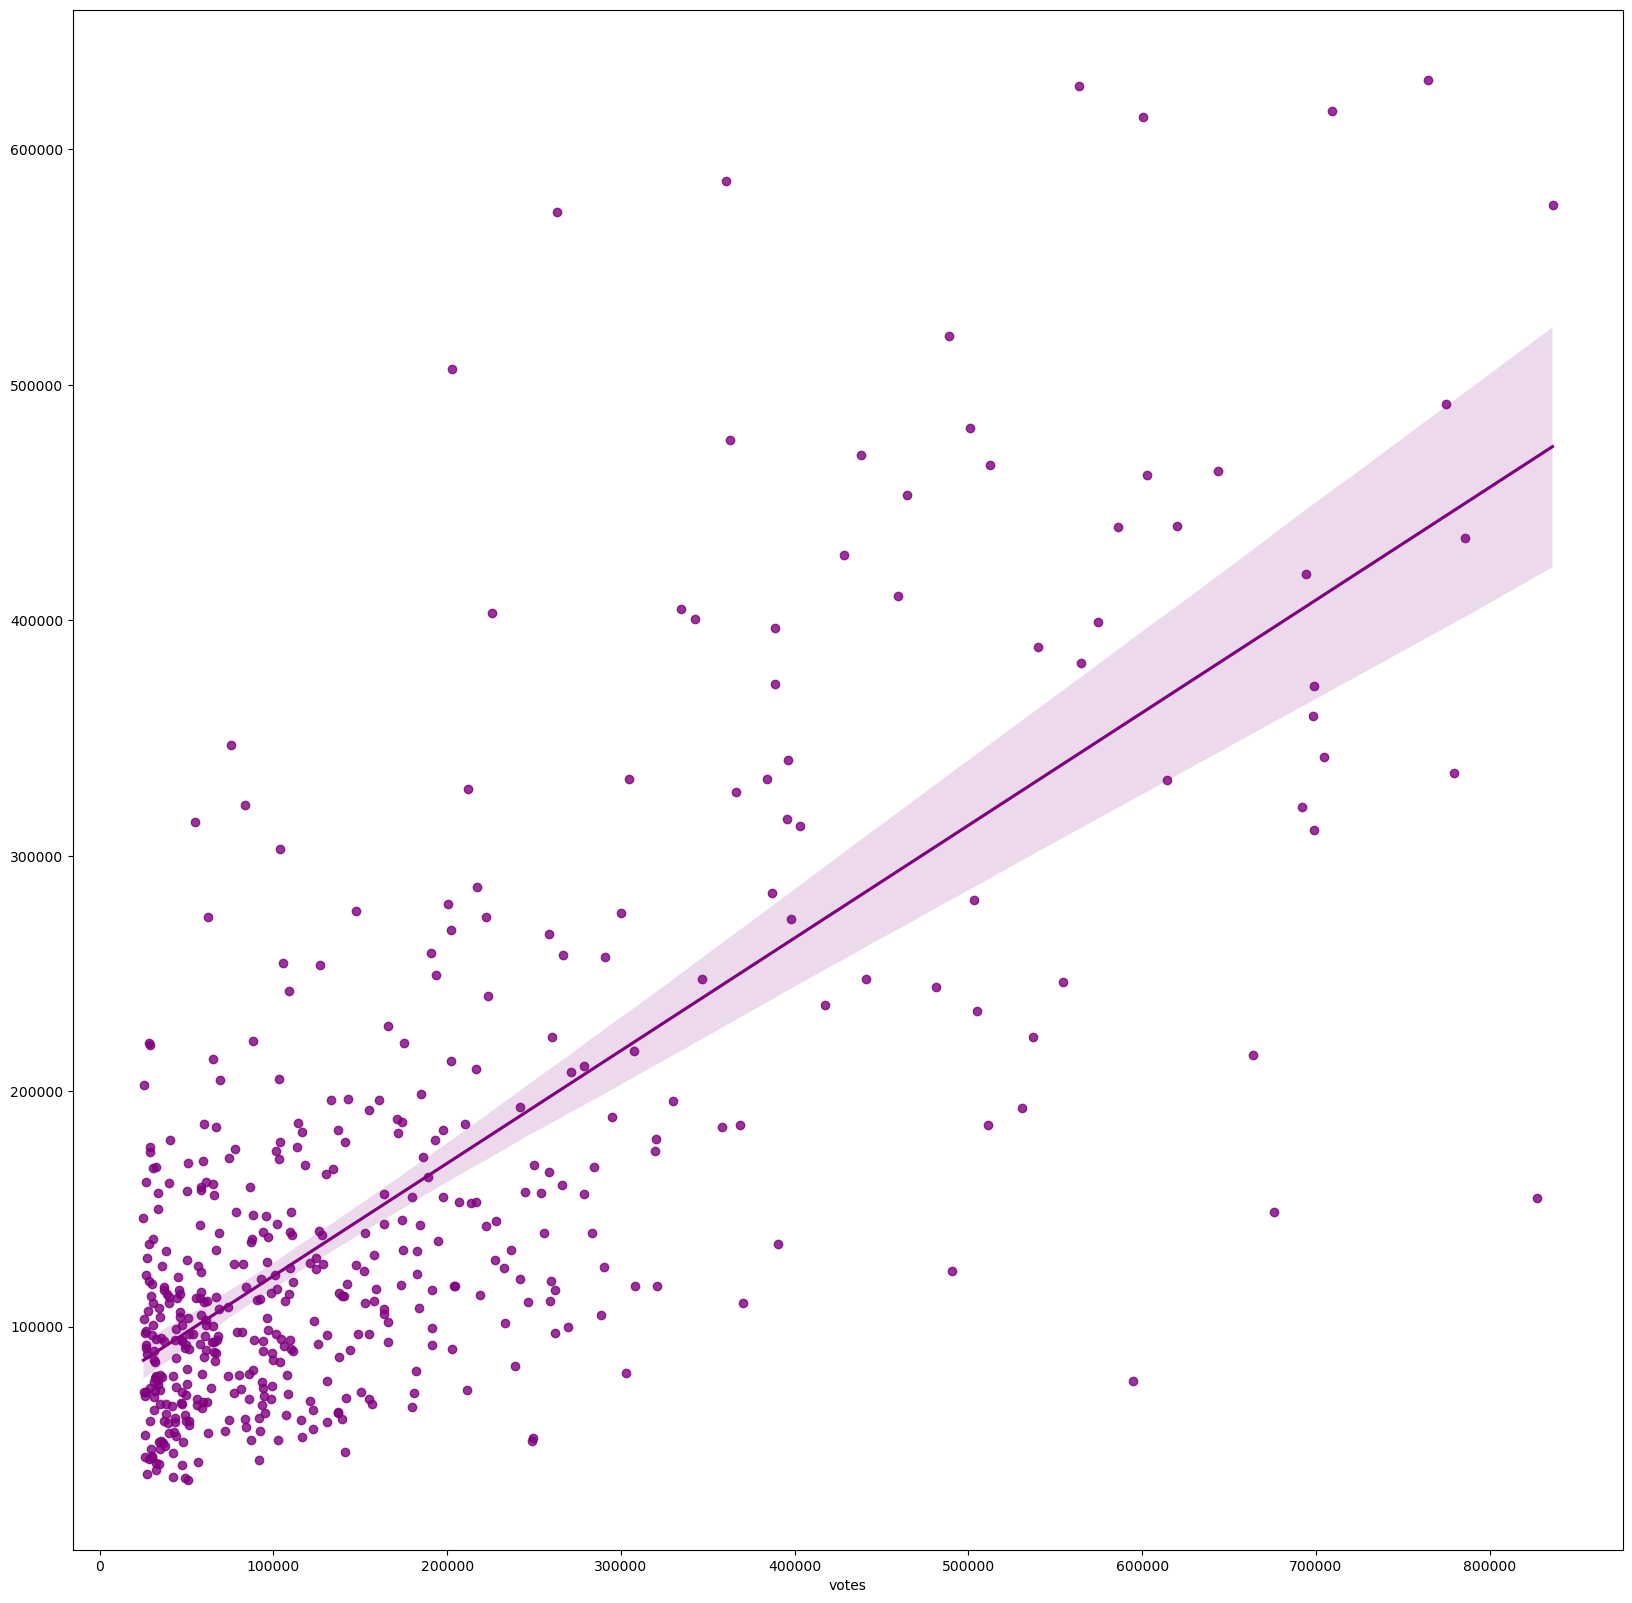

KNeighborsRegressor()
Mean absolute error 78612.944017094
Mean squared error 13614737283.669487
Root Mean squared error 116682.2063712779
R2 Score 0.5143741633276445
At random state KNeighborsRegressor(),the training accuracy is :- 0.621744088906351
At random state KNeighborsRegressor(),the testing accuracy is :- 0.5143741633276445
Cross Validation Score: 0.17974278785000672
Difference Between r2_score and CrossValidation Score: 0.33463137547763777
---------------------------------------------------------------------------------------------------------


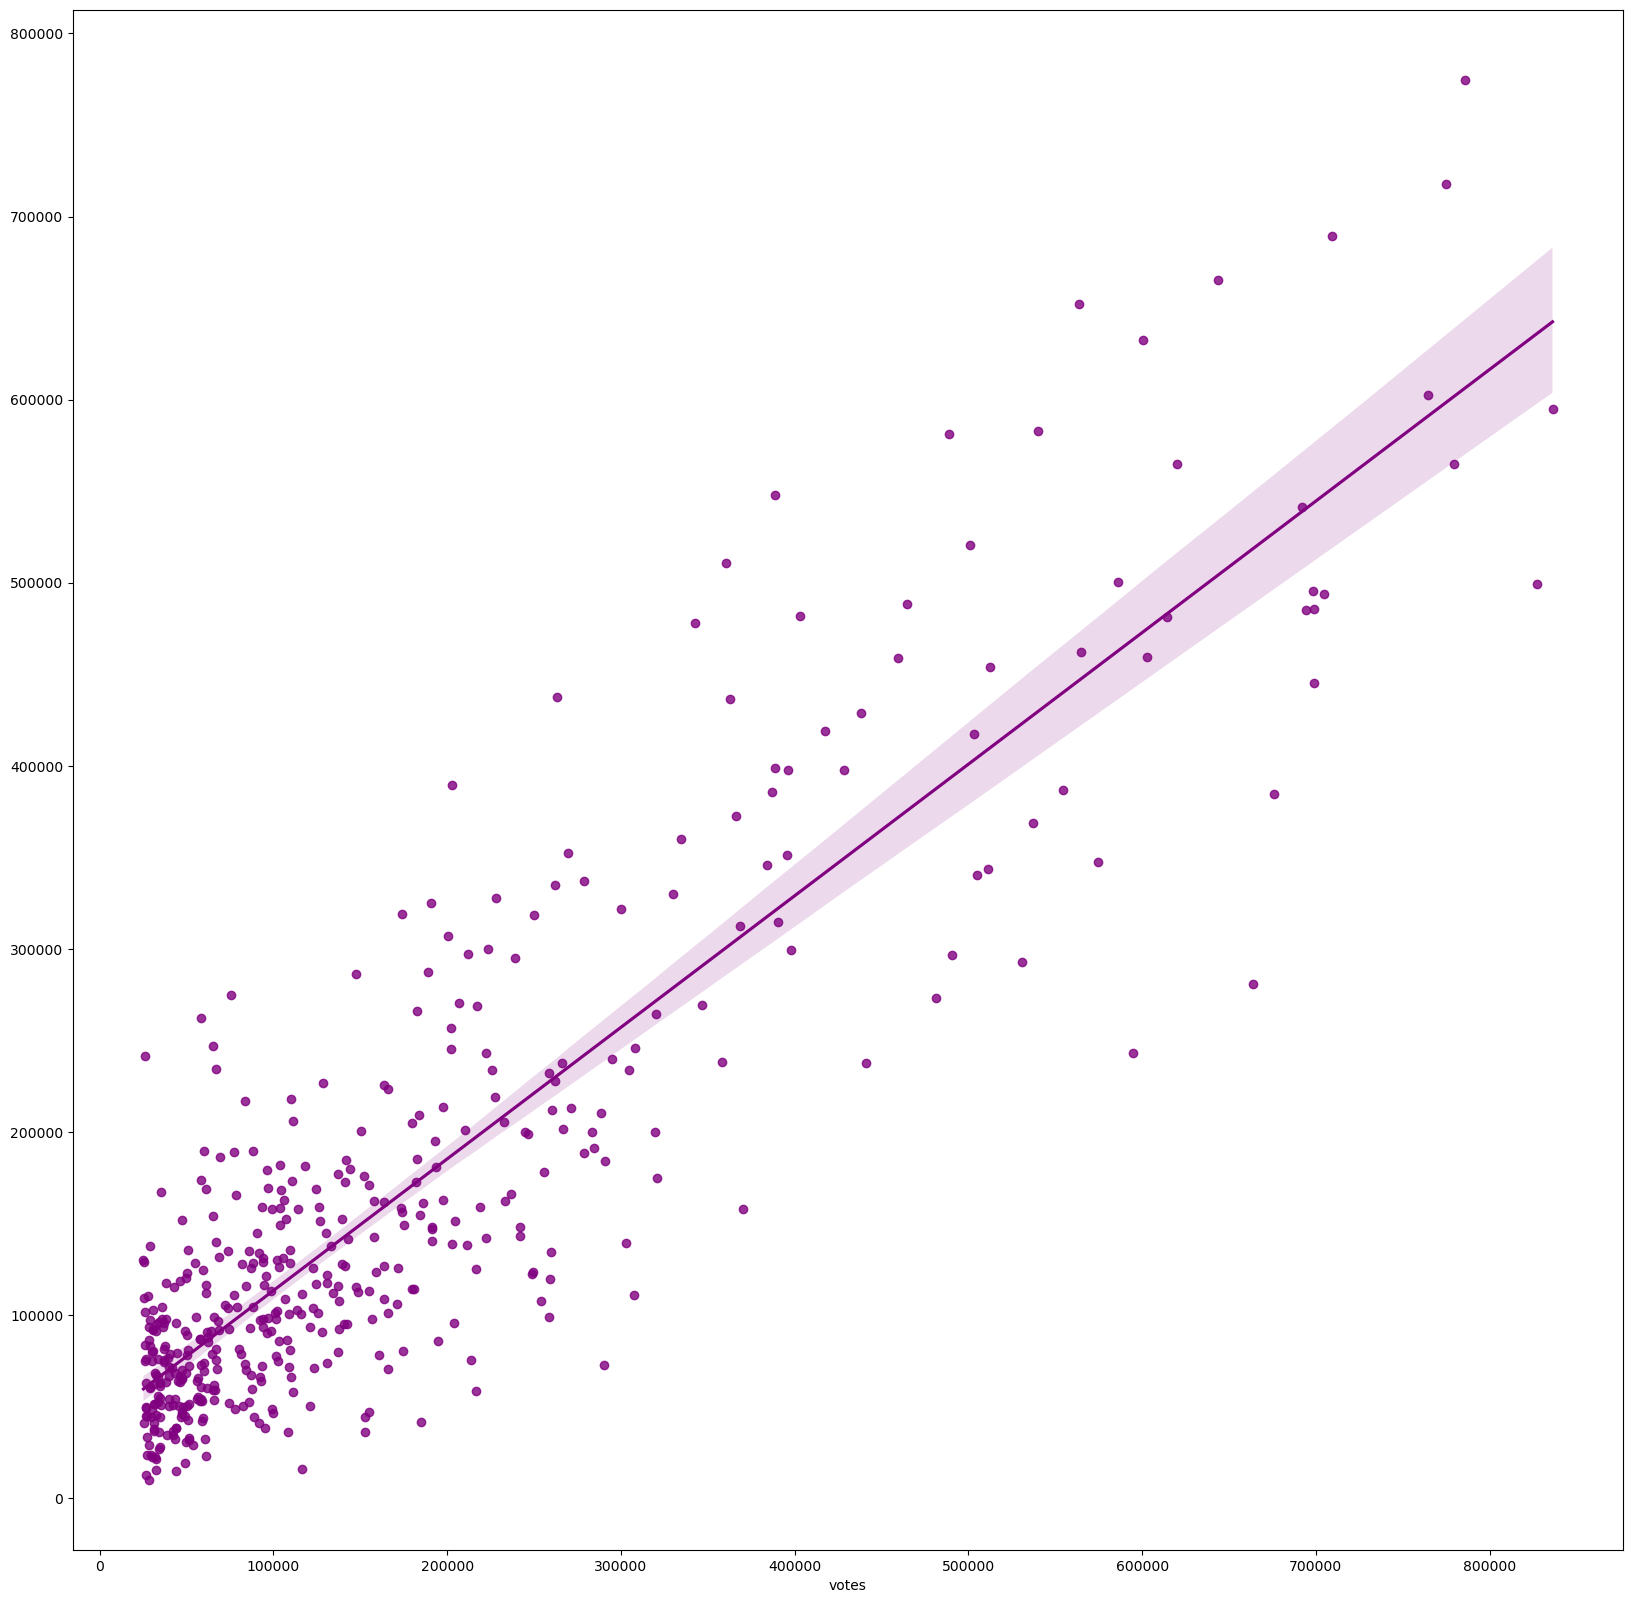

GradientBoostingRegressor()
Mean absolute error 56250.639708197945
Mean squared error 6498633913.571142
Root Mean squared error 80614.10492941755
R2 Score 0.768199380880397
At random state GradientBoostingRegressor(),the training accuracy is :- 0.8756892188031038
At random state GradientBoostingRegressor(),the testing accuracy is :- 0.768199380880397
Cross Validation Score: 0.5313318259670439
Difference Between r2_score and CrossValidation Score: 0.2368675549133531
---------------------------------------------------------------------------------------------------------


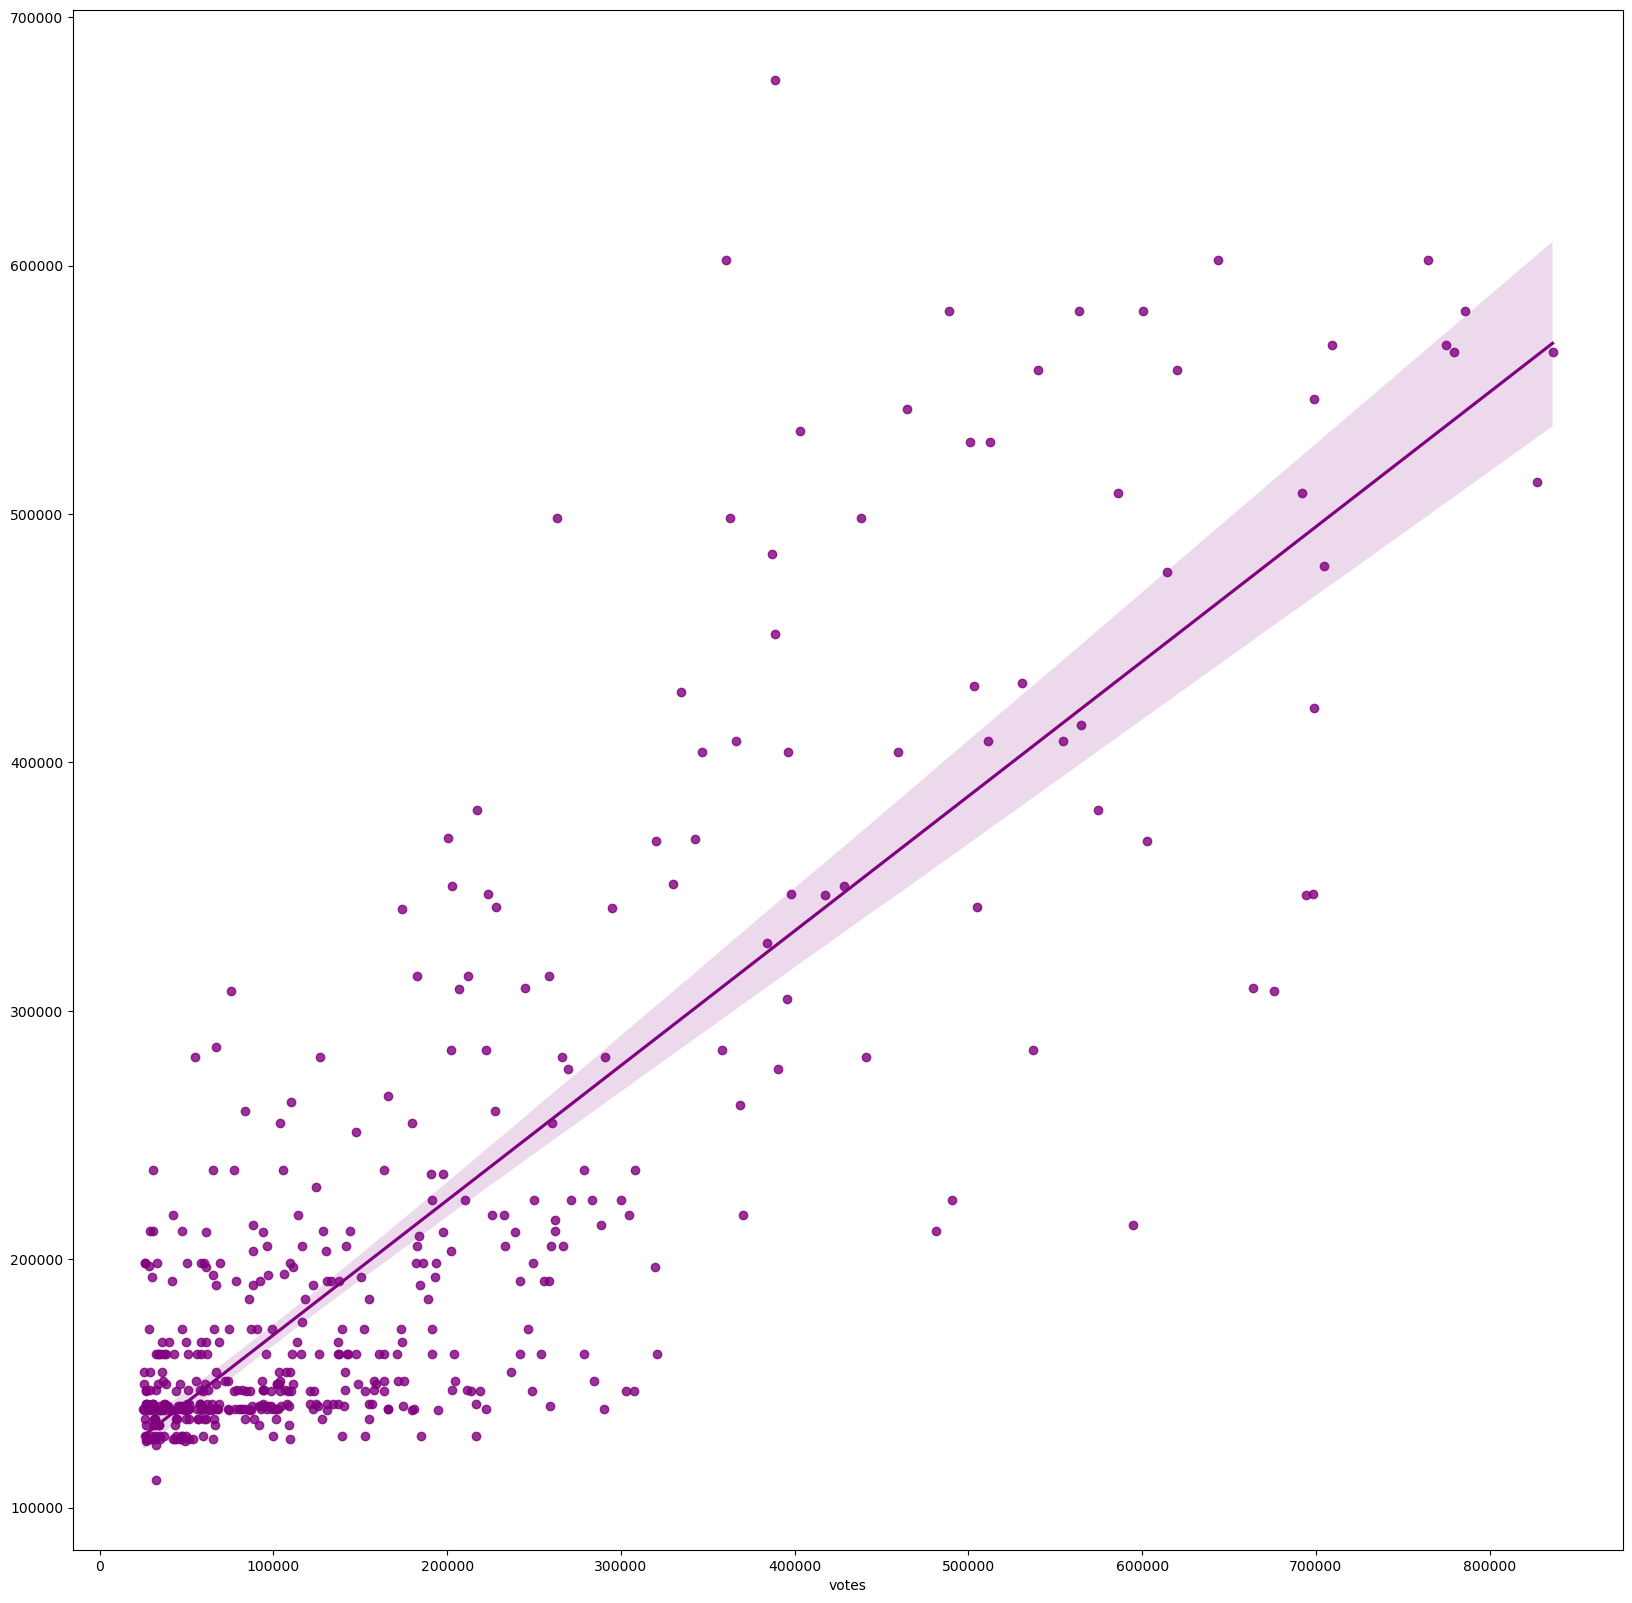

AdaBoostRegressor()
Mean absolute error 87370.7546989659
Mean squared error 11234770879.027956
Root Mean squared error 105994.20210100153
R2 Score 0.5992654948623677
At random state AdaBoostRegressor(),the training accuracy is :- 0.6194648407052005
At random state AdaBoostRegressor(),the testing accuracy is :- 0.5992654948623677
Cross Validation Score: -0.010293423864642381
Difference Between r2_score and CrossValidation Score: 0.6095589187270101
---------------------------------------------------------------------------------------------------------


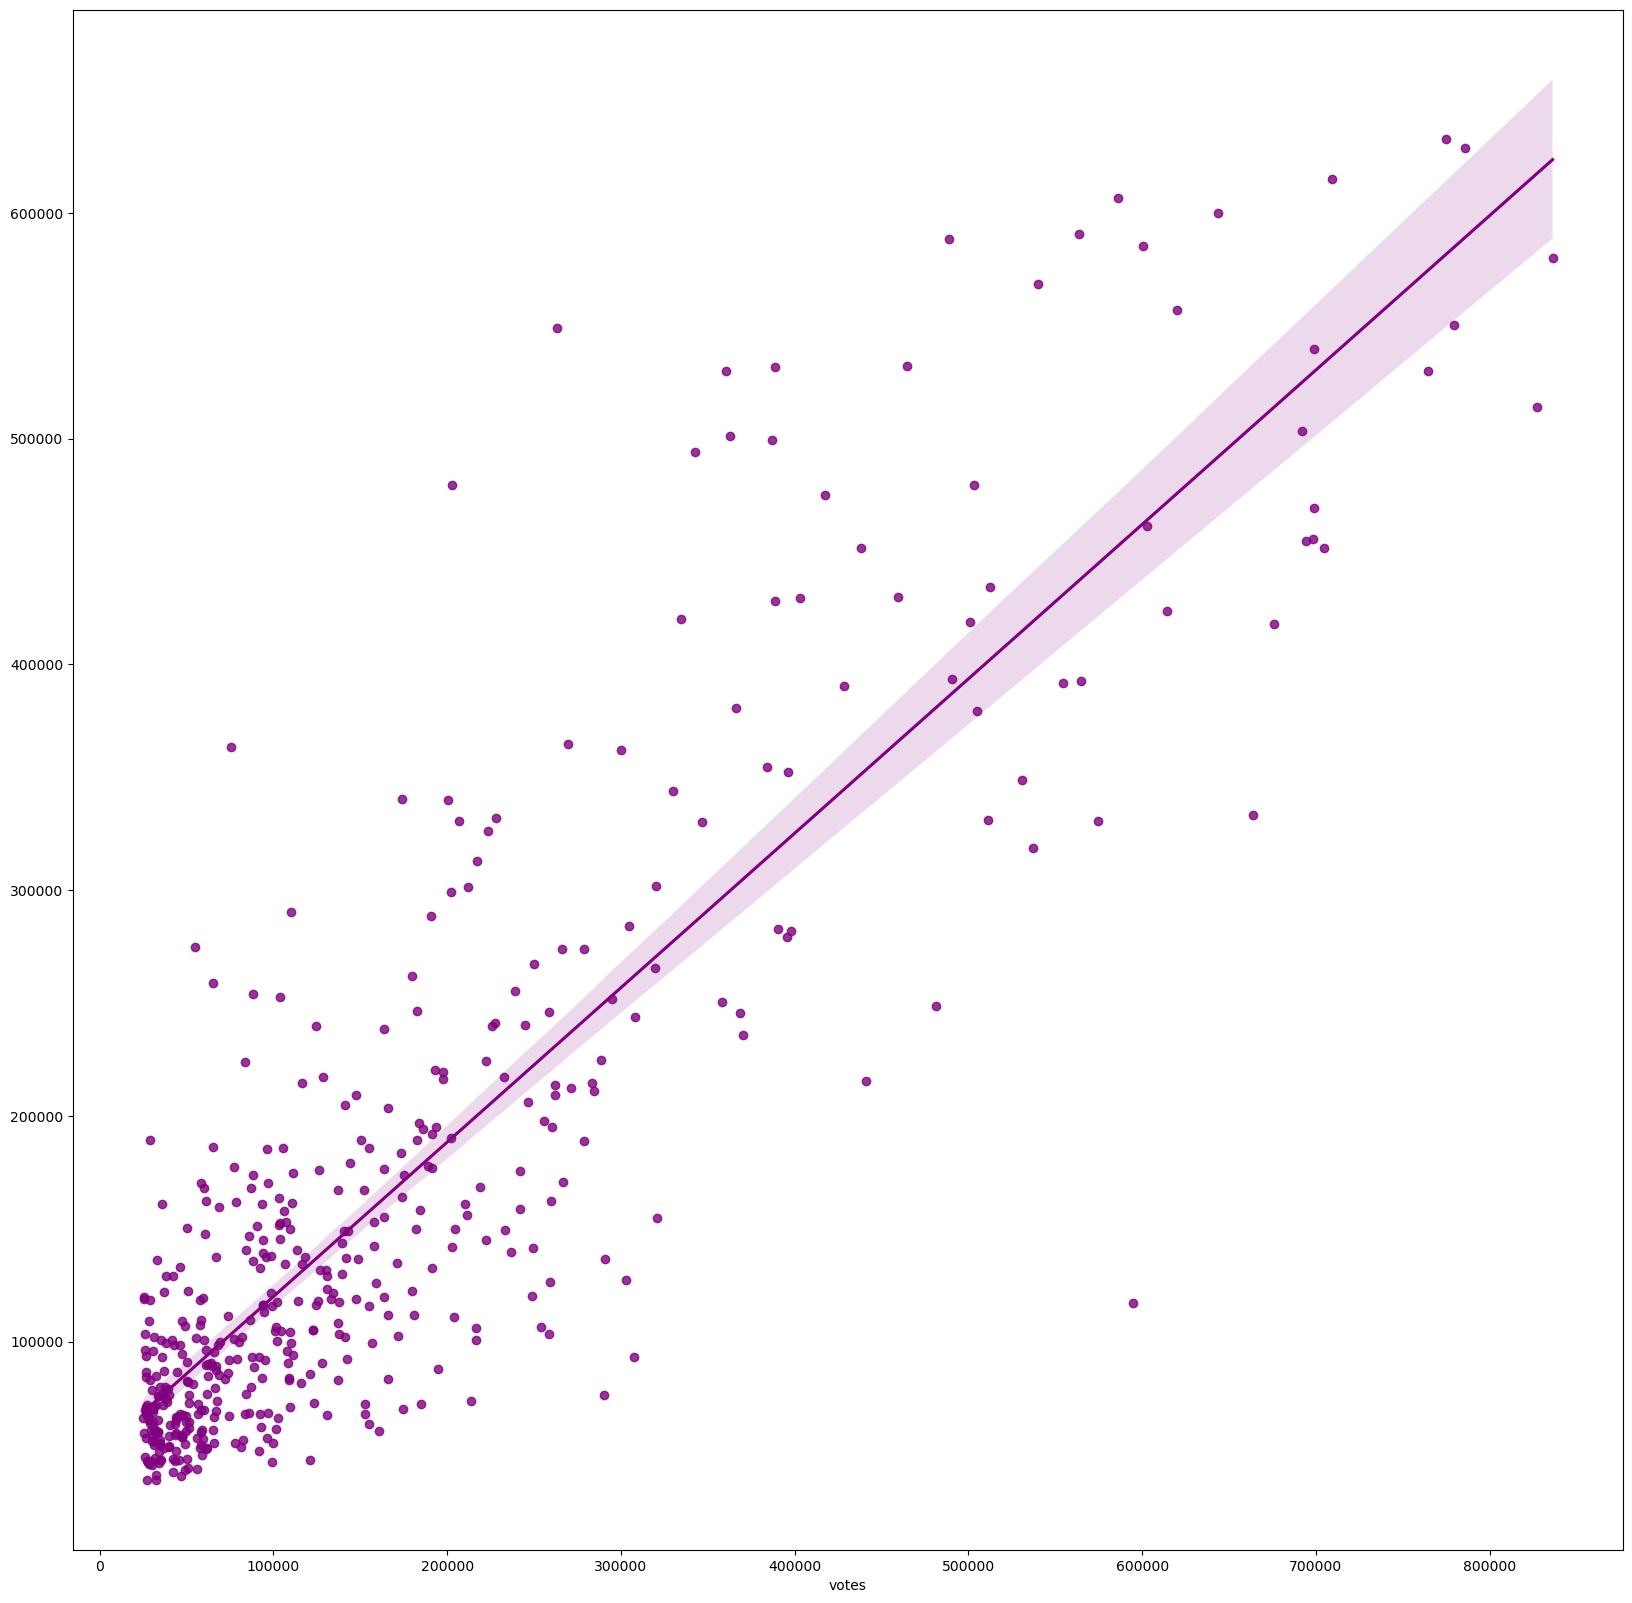

ExtraTreesRegressor()
Mean absolute error 58052.405384615384
Mean squared error 7211107931.413273
Root Mean squared error 84918.24263026922
R2 Score 0.7427860523810721
At random state ExtraTreesRegressor(),the training accuracy is :- 1.0
At random state ExtraTreesRegressor(),the testing accuracy is :- 0.7427860523810721
Cross Validation Score: 0.52160646735788
Difference Between r2_score and CrossValidation Score: 0.22117958502319213
---------------------------------------------------------------------------------------------------------


In [185]:
for i in models:
    create_model(i)

It is observed that GradientBoostingRegressor() gives the best result.

Hyper parameter tuning

In [186]:
#Gradient boosting regressor
gb_params = {'criterion':['friedman_mse', 'squared_error'],
             'max_features':['auto', 'sqrt', 'log2'],
             'loss':['squared_error','absolute_error','huber','quantile'],
             'warm_start':[True,False]}


In [187]:
gbr=GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
RSCV=GridSearchCV(gbr(),gb_params,cv=10,n_jobs=-1,verbose=True)

In [188]:
RSCV.fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             verbose=True)

In [189]:
RSCV.best_params_

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_features': 'auto',
 'warm_start': True}

In [190]:
Final_Model = GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error', max_features='auto',warm_start=True)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 76.78856510620201


In [191]:
Final_Model


GradientBoostingRegressor(max_features='auto', warm_start=True)

In [192]:
from sklearn.model_selection import GridSearchCV


In [193]:
gbr=GradientBoostingRegressor
GSCV=GridSearchCV(gbr(),gb_params,cv=10,n_jobs=-1,verbose=True)


In [194]:
GSCV.fit(x_train,y_train)



Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             verbose=True)

In [195]:
GSCV.best_params_


{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_features': 'auto',
 'warm_start': False}

In [196]:
Last_Model = GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error', max_features='auto',warm_start=False)
Classifier = Last_Model.fit(x_train, y_train)
lr_pred = Last_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Last_Model is:", lr_r2_score*100)

R2 score for the Last_Model is: 76.57599402494024


In [197]:
Last_Model

GradientBoostingRegressor(max_features='auto')

In [198]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet


In [199]:
lasso= Lasso(alpha=0.0001)


In [200]:
lasso.fit(x_train,y_train)


Lasso(alpha=0.0001)

In [201]:
lasso.score(x_train,y_train)


0.5004657317654799

In [202]:
lasso_pred=lasso.predict(x_test)


In [203]:
r2_score(y_test,lasso_pred)


0.5651614921792648

In [204]:
ridge=Ridge(alpha=0.1)


In [205]:
ridge.fit(x_train,y_train)


Ridge(alpha=0.1)

In [206]:
ridge.score(x_train,y_train)*100


50.0465727188248

In [207]:
ridge_pred=ridge.predict(x_test)


In [208]:
r2_score(y_test,ridge_pred)

0.5651549604800772

In [209]:
#saving the model
import joblib
joblib.dump(Final_Model,'IMDBVOTES.pkl')



['IMDBVOTES.pkl']

In [210]:
#Loading the saved model
IMDBVOTES=joblib.load('IMDBVOTES.pkl')


In [211]:
prediction =IMDBVOTES.predict(x_test)
prediction


array([ 48431.2026361 , 359852.33468173,  97775.48345978,  58993.98644644,
        29015.12826469, 127790.63587476,  47870.07781781, 114122.1012535 ,
       115343.46284874,  44113.38621628, 104293.24732976, 199791.68963226,
        87088.58875699,  75055.11974791, 218066.87038561, 125518.91439054,
       158714.87458687,  21803.15676022,  23703.38945392, 104409.60444956,
        27826.77779783,  65760.6132649 , 210309.9104382 , 340247.94981638,
       256832.64392904,  93327.33617951, 325156.25000516,  62753.64493676,
        91654.47082236, 126274.48516855, 262212.38095962,  63753.35557449,
       181115.40624454,  49399.66699324,  81517.77437057, 105201.79716279,
        30841.6040772 ,  32221.51430863,  86536.61877241, 161528.39256665,
       116517.63962832,  46854.4202321 , 101331.26470965,  95899.86875975,
       156269.73556149, 205165.18679185, 462352.46140856,  54263.38374599,
        37795.06816504,  34221.2995224 ,  99141.03980524, 100862.6238306 ,
       189520.39464628,  

In [212]:
pd.DataFrame([IMDBVOTES.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


0              1            2             3    \
Predicted  48431.202636  359852.334682  97775.48346  58993.986446   
Original   77892.000000  334785.000000  94020.00000  66227.000000   

                    4              5             6              7    \
Predicted  29015.128265  127790.635875  47870.077818  114122.101253   
Original   53486.000000  139456.000000  30036.000000  180721.000000   

                     8              9    ...           458            459  \
Predicted  115343.462849   44113.386216  ...  87018.470914  172519.124906   
Original   142252.000000  152516.000000  ...  57987.000000  182256.000000   

                    460            461            462          463  \
Predicted  61294.881527  124556.613809  118732.314572  79022.23489   
Original   34833.000000   59581.000000   46279.000000  44270.00000   

                    464           465           466            467  
Predicted  51387.077291  128133.21854  123317.20423  184066.794879  
Original   51139.000000   81751.00000  158838.00000  290970.000000  

[2 rows x 468 columns]

<Axes: xlabel='votes', ylabel='Density'>

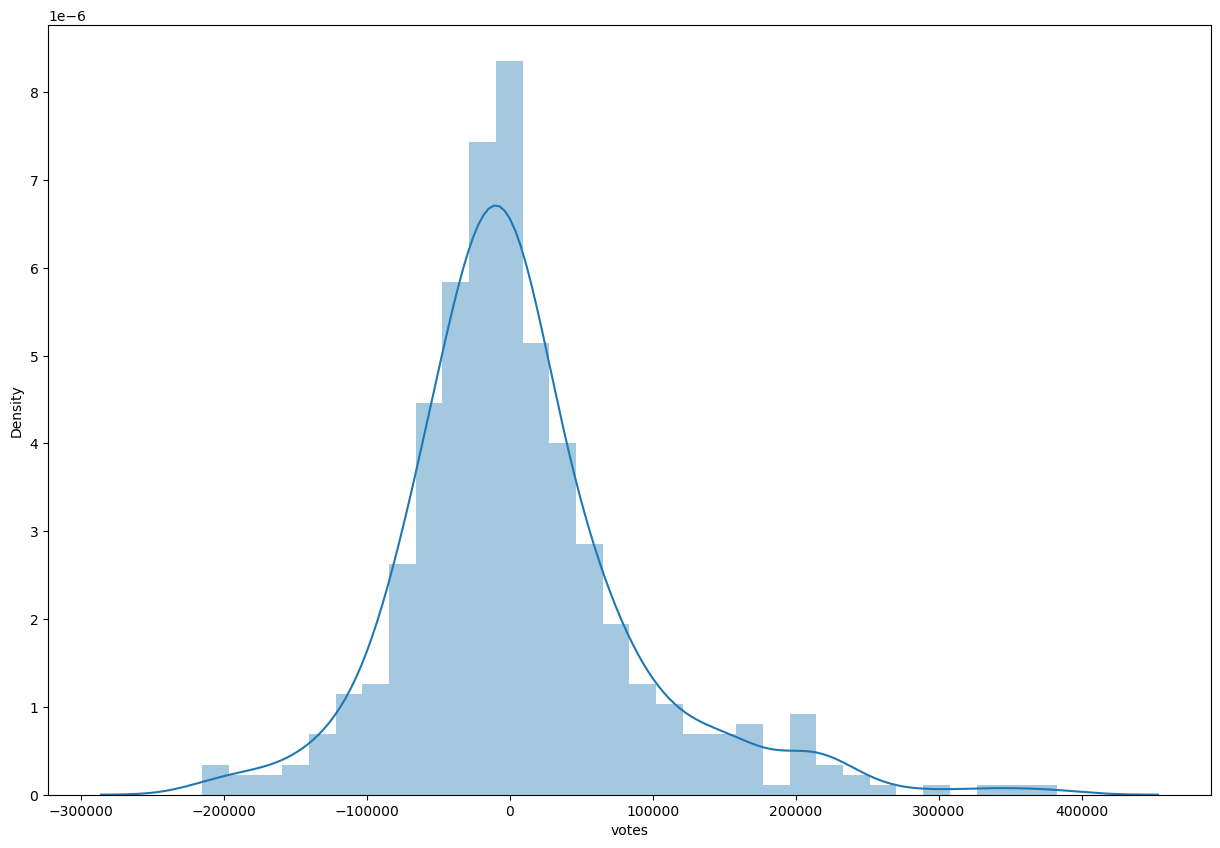

In [213]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)


In [214]:
import pickle
filename = 'IMDBVOTES'
pickle.dump(Final_Model,open(filename, 'wb'))


In [215]:
loaded_model = pickle.load(open(filename, 'rb'))


In [216]:
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)


76.788565106202


<Axes: xlabel='votes', ylabel='Density'>

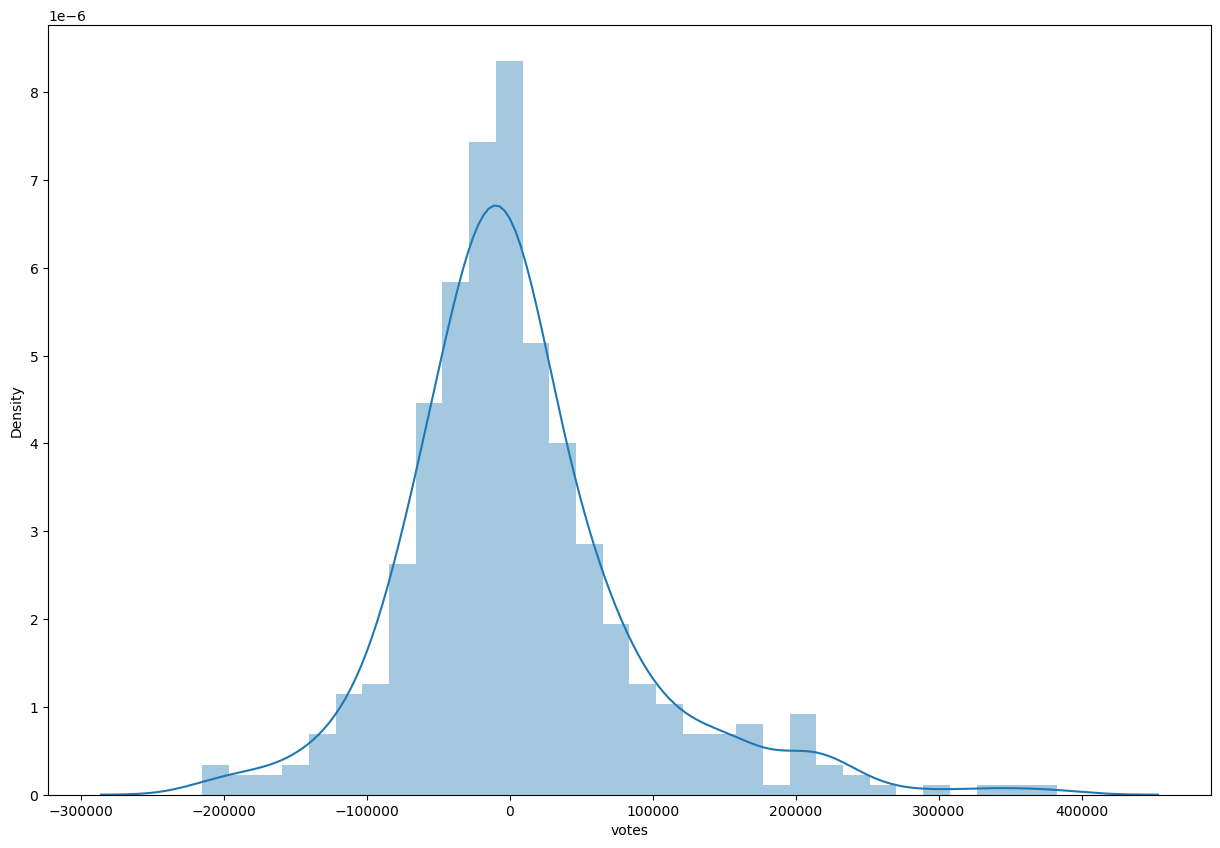

In [217]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)